# Finding a New Home

Buying or selling of a house can be a very stressful event in one's life. The process could be frustrating as it is lengthy, uncertain and needs a lot of examination. Through this workflow we will guide a couple (Mark and Lisa) who is interested in selling their home and relocating to a place nearest to both of their work places. In this case study, we will explore the current housing market, estimate average house prices in their area and hunt for a new one. We will download the <a href="https://www.zillow.com/research/data/">Zillow data</a> for their current home for our analysis.
You can use your own data and follow along with this workflow which aims to help Mark and Lisa in finding their new home. 

![](https://desktop.arcgis.com/en/analytics/case-studies/GUID-F5565467-6211-45D9-A099-669701C5D8E1-web.png)


The notebook is divided into two parts. In the first part, we will calculate the following:
- Percentage of decrease/increase in house price since Mark and Lisa bought their home.
- Suggested selling price for their home.
- Whether their zip code is a buyerÃ¢â‚¬â„¢s market or sellerÃ¢â‚¬â„¢s market.
- Average number of days it takes for homes to sell in their neighbourhood.

In the second part of the notebook, we will explore the investment potential of homes close to their work places. Based on how much a person is willing to spend commuting to work, we will create a drive-time buffer. This will narrow down the search areas. Zillow also provides data for market health and projected home value appreciation. Visualizing the zip codes by their market health will help them focus only on areas with good market health. Hence they will get a list of areas to choose from, for buying their new home.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc">
    <ul class="toc-item">
        <li><span><a href="#Selling-your-home" data-toc-modified-id="Selling-your-home-1">Selling your home</a></span>
          <ul class="toc-item">
            <li><span><a href="#Determine-an-appropriate-selling-price" data-toc-modified-id="Determine-an-appropriate-selling-price-1.1">Determine an appropriate selling price</a></span></li>
            <li><span><a href="#Get-additional-information-about-the-local-real-estate-market" data-toc-modified-id="Get-additional-information-about-the-local-real-estate-market-1.2">Get additional information about the local real estate market</a></span></li>
            <li><span><a href="#Visualize-Results" data-toc-modified-id="Visualize-Results-1.3">Visualize Results</a></span></li>
          </ul>
        </li>
        <li><span><a href="#House-Hunting" data-toc-modified-id="House-Hunting-2">House Hunting</a></span>
          <ul class="toc-item">
            <li><span><a href="#Find-all-ZIP-Codes-within-a-specified-drive-time-of-important-places" data-toc-modified-id="Find-all-ZIP-Codes-within-a-specified-drive-time-of-important-places-2.1">Find all ZIP Codes within a specified drive time to work</a></span></li>
            <li><span><a href="#Map-market-health,-home-values,-and-projected-appreciation" data-toc-modified-id="Map-market-health,-home-values,-and-projected-appreciation-2.2">Map market health, home values, and projected appreciation</a></span></li>
            <li><span><a href="#Find-the-best-cities-to-begin-house-hunting" data-toc-modified-id="Find-the-best-cities-to-begin-house-hunting-2.3">Find the best cities to begin house hunting</a></span></li>
             <li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-2.4">Conclusion</a></span></li>  
          </ul>
        </li>
    </ul>
</div>

## Selling your home

### Determine an appropriate selling price

1) Download home sales time series data from Zillow at <a href="https://www.zillow.com/research/data/">www.zillow.com/research/data</a>.
> Mark and Lisa have a 3-bedroom home, so we will select the **ZHVI 3-Bedroom time-series ($) ** data set at the ZIP Code level.

2) Prepare the Excel data as follows:

> a) Using Excel, open the **.csv** file.

> Notice that the **RegionName** field has ZIP Codes as numbers (if we sort the **RegionName** field we will notice the ZIP Codes for Massachusetts, for example, don't have leading zeros; 01001 is 1001). Also, notice the median home value columns are named using the year and month. The first data available is for April 1996 (**1996-04**).
> b) Copy all the column headings and the one record with data for their ZIP Code to a new Excel sheet.

> Apply a filter to the **RegionName** field. Mark and Lisa live in Crestline, California, so we will apply a filter for the 92325 ZIP Code.

<img src="data:image/PNG; base64, iVBORw0KGgoAAAANSUhEUgAAA5gAAABwCAYAAAB7N9/PAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAAEnQAABJ0Ad5mH3gAAMJ+SURBVHhe7J0FfBXH2oe/K73a3sqty6270lKoA8XdHQIESIJLgru7u7t7iJBAEuLu7u7uCs83cyREDoGWBBJ63t/9X9Kzc/bsvjsz7/vMzO7+3+3bt9FKK6200korrbTSSiuttNJKqweVFjC10korrbTSSiuttNJKK620qhdpAVMrrbTSSiuttNJKK6200kqretH/JSUl0dCKi4sjMDCQmJgYjdsfJyUkJBAcHExUVJTG7Vo1XYWFhREeHq5xm1b3r9jYWAICAhT/atremCXbtWzfsp1r2v64KjIykpCQEBITEzVu/6OoqfshOjqaoKAg4uPjNW7X6sGk9W/DSuaQWv82nKR/Za4uc3ZN2x+GkpOTSUlJUUj+LZWamqpRaWlpCqWnp9dSRkaGUtnZZGRlkZmZWaks8d/Z4nNNysnJUSg3N7dSeXl5dSo/P79SBQUFlSosLKwm+VnN7xUXF1VRMSUlJXdVaWmpQuXl5dy6dauWNEHeo9RDAUyZSPr4+Cg6X03bHyfJjs/f35+IiAiN27VqupJgIZNLTdu0un/JICb7g6Y44CTbtWzff7QERw6uyMTjjw6YcoBJDo40VT9IQPbz89Mm6A0ktX8fZYL+OEsO8Pn6+mr920BS+/dRDv7eL2Cq4bKpAmZRUZECFqsDZpEAybtDphowy8rKFJApVVFR8ccGTJlIenp6/iFm9WTglsmzdqbr8ZNMsOXoqaZtWt2/5ECTh4dHkxxwku1atu8/WoIeGhqqSJz/6IDZ1P0gB0i8vb21CXoDSevfhpUEeC8vrya5+qUpqDH4t6kBZlW4/K2AKUHx9wKmGjIlYFaFzMYEmlrArGdpAfPxlRYw60dawGx60gKmUlrA1Kouaf3bsNICZsOqKQGmVFMGTHXZ6oD525fIqmcy1X9L2NQEe49CWsCsZ2kB8/GVFjDrR1rAbHrSAqZSWsDUqi5p/duw0gJmw6qpAGbV2cumCpgSJsvLa89g1gWZNQFTDZRq2JTSBHqPSvUOmLJi1ry3SiaSrq6uyM636uePo2RgkcmzTEQ0bdeq6UomlvL+O03btLp/yYEmFxcXRTDTtL0xS7Zr2b7/aIApB1Zk4vxHB0x5H7ZMwJrqQ57kvbTu7u7aBL2BpPVvw0oO8Lm5uTXJ+/ebgmSO/qj9ez+AWRMyHyVgSv0ewJT/LaGxJmDezxJZNWCql8eqIVP9rybYexSqN8CUiYdMumQiImd6qm6TCaWjo+NDndWLjQwiyNmE687eeAQ9vJlTCZgyeZaJiKbtTVsyqQoj0NUe26tXuVopC65dd8YzPJ6oeE3fezwkZ66kNG1rHIolMtAdT6urmJmor811zMw98ImIJVrjdx6+JFja29vz4ANOsSTEBYrzteRGtfoodQ1zSyc8wuKIrMc6Kdu1HCx7ODMUEubCCPJwwK7W+ZkKWePgGUxwrKbv1q/kg21k4vzwAVNc4/hAvKyvY1XDB9dsHHHwjyY2/uEdk4xt0g8NAZjx0eGEuJphY1n9PK9a2nPTPUjRfhNqfOe3Sj6kzNnZuZECUDjBnu643nDGO0JTLIkiMtgHZxMbPAMiCIuruf3RSw5ASf82DQCKJDzAF1cLNwIiG098qEvSv05OTk1o9Ys6Rtnj4eZP4EPoqx9EcoBE5uqP0r91A2Y8iXGh+Nu7ESjy+ujkjDuAmRhFXIivyC08CIxMICEtq1EDprpsbcDUDJdSNQGzKmTKv9Wfa4K9R6F6A0z16zlk4igraNVtjwIw/ayPcXj0s3w1eikzjzlpLNMQerwBU3Y6xuyf0IsuTz7Jk5V6n/e+0mXBtVAcwzV97/FQ4wdMb2wPGDL/+yd55Vn1tfmCV/43kzVW3rhq/M7DV/0Bpg8RQftZ0PJTvq1WH6Xe5a1PhjPHOADbME3f/X16uIApf8OUozMG0kOc03+qnd/zQj8yYMEJTvpq+m796tEBph/R4YdY/NMXtKx2/k/yVquB9N/pgk/Yw4OlhgRMCZdnxr/MLx9VP88nP+5N++lHcBFlHhQCGi9gynplzqkFRoz/eiTLLcM1xBJ7bE6sZswzbViw+wYmQTW3P3o1LcC0xmzXJsa/N419NxtPfKhLTQ8wRYwKPMSCFn2YOWUXh7yTSNRYrnGo8QOmH6GeJ1nXWZ9tuy2wjMmtBMxMPxMc9s+jTSt9NlzywC0pv1EDpvy7qKiwFmAqIVPzLKYmwKwqTZD3KFUvgCmDlZy5lEmjhYUFDg4O1bY/dMAMteH6iYUM/vUr2n88mrlLzmMnPo+vWa4B9PgD5iV2jx3G0A86MGjFPtbu3Me+VXNYMXkU34zdw04LT0I0frfpq/ECZpiQJcdm6jJ1iA4jjFaxfdce9u0T12bbJnavXcLCK75c9dP03Yev+gNMbxG89zLri58Z3GE049btY688Z6k181ht0IsW7buiv/4s5900ff+36+EDpjGHpugy9K3WDFyym1U7VOe376DQeUztRJ2M1vTd+tWjA0xfosMOMO+b1gxpOxL9tfvYvVfpg6MXTDFxjyAq7uEtV61/wJT7ceDanmUs7DeQoTMWs2LTNtU1VmrJlAUsXbiRy6J8aK3v/zY1XsCUfjDh+KzJjPl4MIuuheFQCzBtsTq6jOFPfMfs7RZcCay5/dGraQGmgPRtaxnz6nh2WXspBjA0l2s8anqA6U14wD5mfd6FqeNEu/bSAua9VDdg+hLicZSVrUeyabsZ5tF5pKUkkulzictbNzHfaDNbjG2xD4kj5iHNYFaFy3sBptyXPC+5f3mvpXwSbE3Q/C1LZOW/Uo/tElkZqGTQlZXy2rVrmJqaagRMOzs7ReWt+nlDKcpuL6c2GfBD/xkY/jyARbM3s8k5nOiEhk+OZOIpO8DH82EwasAci/73+ixzSsIjUnzudQGrvVP5sM1i1pyxx1fjd5u+5L1XUpq2PUpFB9vhfmk0Uwb2Q3f8GjaZBRARo0qAo32I9r3ESfsw7AJqf/dRSIKlra1tPQw4ScDcLwBTBG+DrezzTCIhUbUt0A7vc0uZ0OtrOo1ZyrSDboSJzx90kEm2a9m+Hy5gjmfsVyNYfDMWlwhN5Rpe8t5jCdaPBjAPCsDszpTRG9ktrnGc+ho/Aqn9UF+AmZgQi+/1Jaw3HMTAnhOYe8IVe//qyZ23mRnWFy5gI/6OqPL575EcIJGxuvEB0OMBmBLgZf6jBcyGkfSvHJzUAmbDSAK89K/M2TVtfxj6LYB5LTSeFF9LTHesZ+3SXazeZ4N3RhYJAiIf1j2YvwUw5f7lrYTyX/maEgmNhYUSMJV/l5WVVgPKmlIDZtX3YD6WgCkTDRlkZcIlA5YES7VqAqacsbC2tlZ0DlU/r3/J5CcOr+ML2Dl/FO3W23F69QiWLJnH0K0OhMTEN3jjlsAtG6gc8de0vWlLM2Am+Blje3w+HbtvYtdFVwI0frfpS85cSGna9ugkElTrE+zp/RRDF21jvXn1+58boyRY3rhxox4GnOoATKlIXxJNjBgxYjKdJu7DJi6JqAeEE9muZft+ODNAjQcw5cu3JVj/0QFT+kHGu/oBzHjiYwI5Z/g9kyaPZfRhTyJj6wdc7yY5GCwHd7SA2TCS+dDNmzebCAA1PcCUAyTSv48SgH6bmhZgyhzdxsZGkbNr2v4wdN+Aufkyxo7O+BxdyLiR61l31B5vAYZpjfghP3L/asCUZSVcqmcuJVxKQNQ0g6kGy6qSkClhsqo0Qd6j1O8GTOkk2dhlsmVubq54GMGjB0yZkHlxdaURq8aOY+6NSFyub2LTkuUM0j+ObWQskRq/V3/6IwJmiOVuzq8YSJu5lzl5M/ihLEV+FGqcgOmMw4Xt6D/Xi1VHLLgW1fifbvrQADMhlKSoo6wZPIrRXWazxSMJ/5gq23+HtICpBcz6A8wAYqNOs7x1VyaPXsEmxzhiEjSVqz9pAbNhpQXMhpUWMBtWTQkwt8xfz+qNRxjccxV7Lbxwi0smSQBlY36KrNy/GjCVrykpV/x7Z2ms5uWx6llKNVzK/64Jl48NYMrkSnakMtGS91yamJgodDfAlEviLC0tFZ1D1c/rXQmiUQSdZsechUwbt4FzIQkEh5hzau0Spg+exV63KLweMMG8l6RvZAOVr7TQtL1pSw2Y/ej98qe07DuS/sNHMnjICIYbzGSFqRdOIY3t3p76k7y3Vi6P07TtkSnCnOt7l9H5z7qsPWWLraYyjUwSLOVyerkcR9P2+9c9ADNJLsE9x5ZBIxjXbhqrnQUgPOD9irJdy/b9cAFzKH2f/4iWvXToO2wkI0dKjRPazt4rLnho/G79Si4Nl/19/d17eL9S34P5LZ0//pHWA0aiozj/kcxevYvjTolEPMQnM8pXtcjbPerFDzHuxLhvYFKzEUwev5dTAqiU8ByKn/UJziwcycSx8lwNmbX8MBf8RQL4gOcqB0isrKwaIQCpAXMk/Z59n++6D6XPUHVdV6s3Pdu15uMnfmT8dstGCZgS4KV/mwYANT3AlP6Vg5OPEoB+m5oWYMq8/vr1640aMEM9DrGufQ/0O/ekv+5MBsy6yg3/WOKqwGVTAEz532q4rKq7zWDKGcuagCmhU70s9rEATHnvkaZlsXUBppyxkLOc8ntVP69vJUYHEWk+nwVzVqK30BifpERikwK5uW85G0cNYuI5X6wCZNKm+fv1ITkyLAOMHOnWtL1pSw2Yven+3Ft89HNHWrXrSMeew+irt5Rle65xzTPkgR9E0VglH94gpWnbI1OYKZa7l9D+z6NZc8quSQCmBEszM7N6WNFwn4A5WJ9Jneaw1Vck2A+YoMt2Ldv3w5kBUgPmIHo+/QYf/9ieX2R76yjVR2g5607Z46zxu/UrT09PxczXowHM/QIwm/Hrm5/xZauOdFCcf0dGz1zN7puJhDXwoGFVSdCWMyj14odoN2Kc1zL+64kYTj+GsfgsTrEtGC/zPRwc347+3Vvwxf++5cefJ7HCSfx+VI19/EbJe0hlAtl4AXM4vZ96jU+/b8tPlXVdrR/54evmvPnETxg0UsCU/pWD6VrAbBjJARI5qaEFzIaRBHg5+PvgD+D7/bonYHoeZH2Hroxo055+Q/WZvOg4Zs7hhMffgcuHCZhV4fK3AKbcLu+9rPkk2d/6kJ+akNmYQPM3AaZcHiVnISVASqA0NjaunL1U//3oAFPAZIgnTmu7M2XBEvT3Oyk6eSmvC2s5NK8XPy4y44xDaIM28D8GYNZ4yI/rKSxWjeSFp0YzYYcFNx7hEraGVKMEzCR77M5uYcTfh7DxpA03m4DvJWDKfqLBATMxnMT402waOhujfhs5Kz570MGPRwOYj36J7KMFzMazRLZeATPJj9jIoyz8YQILDQ9yKT5RBZhqyST6IjtHjkb/5wl/EMBs2ktktYDZsGq6gNlVAZj7tYB5T90LMNVLZLfOWcWelUtZ2ao1S/faYuaTSkpq0wFMCYwSEOV37kDm3eFSqiZgqiGzJnBqgr1HofsGTDlzqb7nUjbwmrOW8m95H6b8VxNgyjKy8lb9vH7lR4jnIVb+9D7fv/kWr3zYjJYtWyr0zafv8OH/3uPpN2cw/3jDjvjLxFMG8Mb9vsTfq7sAZrQNzheW0ffZDkxfeZ7zjfD9ZPUhOWsv70PTtO3RyQcPk80s/+IlZm06z0l3TWUalyRgyr7iwZfM1w2YcaGeeB8awTC9OQxaeJlg8dmD3h8s27Vs3380wPTw8FAsDf6jA6YEbfk8AZkkaNr+2xRKXLQ5+wb9zPjRU5h63rfGK1fqHzDlEm8ZvxsfAD0+gCkT9KYBQE0TMOVkxaMEoN8mCZgHmf3laBbOOsLFmMYNmNK/cnVRUwDMzRvOYeLsRPCVtawwmsWKHVe46JVOSlrTmcGUn9V+F+b9z2BqkibQe1S6L8BU33MpwVF2nmqwrPpvXYAp77mS2xoUMMOs8b4yhy7NO9K121DGTp3K1EoZoK8zkM5vt2DKxrOc89fw/XqSTDylj+S9Opq2N23dBTCDzbE7PIufn+nFlHWXMX5ESXBDSw6u1Kzbj16RhDmdxnLKFwwaNgq91ae54iHqYbxqe0wAsYEWGLtF4BpS9XuPTnLm8sqVKw0KmNE+N7E/vIRp3VvTfdpGZl+onwEf2a5lgv5HA0w3NzfFzO0fHTDlQ77kPWD1A5ixJMR547BTl7mjetNr5GIO34zCt/Ia1z9gyhl4maBrAbNhJAFeJuhawGwYSYCXOWdTAcyYgBu4nJpEr+8nMXPVBcUtLI0ZMKV/ZQ4vJ4U0bX8Yul/AlK8psYxMJjvGHqtja9iyZj1r9xrjFp9NnPodmA8BMKV+D2DK/5YwWfVJslK/ZYmsenmseoms+l9NsPcoVCdgyiWx0hkSLuXMjWzYaoisCpRV/5Zlaibhcsbi8uXLispb9fP6VIzTKazW9+aTPkuZd/RmjVdlhBLkcIzDfV5Ef/421po1XOcvlx7JANMY35f44FID5ghGfN4b/X2mHL5oismB1eycpsNHzRaw4IQ9jhq/2/QllwjKB3xo2vZIFeJKosk8RvdqQbs+Ixm/zoTzl1X3R186yqVTa1h2xY+r3hq++wgkwfLixYuKfkXT9vuXBMx9AjDbMKqPIXOOiP7JRHneZ3YuY/WYTrT8biiTthhjXE/JqJzBku374QLmGHTe78rYnVc4cEF1XVWydfPDXw7yaPx+/Uk+3ErO3P7RAVOCtlwCWT+AKZQo9uN3huOLdRjZti2jFp5nz3H1yqCLQquZP0wPg76L2SPO/UGfgiwHSGSc1gJmw0iucJC5UNMAoKYHmHKARN6O9SgB6F5KjIsh2s8BBxsLzu1exxbd9vwwfJnIjWzw11C+MUkOkMjB34f1znpN+i2AaR6dR3pqMgUJttw4tILVM43Ycd2TG74xhMWlNGrAlHApH9xTUPDbl8jK70mYVC+PVQOn/Fd+rgn2HoXqBEyZTKiXxcqkqmpiU1NVIbMmYMoZi/Pnzzfok1U9rmxg15g3aDvvGHuuB9YYJUokytsa+8U/0m7cYnR23KyyrX4lAVP6QS4p07S9aUsNmJ1p95e/8Y8nn+LJp57iqSff5d3PhjLtvB/WwfEkaPxu05dcIijvv9K07ZEqUSRncVFEOO5g64TONP/XUzwnr4vUmy14o9tKDtr7EdDAr0C4X0mwPHv2bD2saJCAuVsA5rt8+bd/8k9RHxXnLPX2T3zUdw0nnX3xjYmrNyiR7Vq274dzD5saMHvTSbS3f/1b1d6qqMPEzWy3bvhXh8h7j+XKjD86YMonScsZwHoDTKnEWGKjrLl5bj6jX3iBD6vW46f+xQc9pjJhv7PiFSYPOvshBz5lAtn4ZtgeD8CUAC8H07WA2TCSAH/p0qVGDZixQW64buxJ3x/e4ql/f8pLL09kobEztrEN/x72B5UEeDn425QAMy0tjfS0ZNI8L3Jz9yQ6d+nM0OWnOWgT2agBU1226uzl/QJmVciUYKmWJsh7lLorYFZ9FUnVZbFVZyrVf1eFS/n5owDMyAAX3C2PcsXeB08Nr8pIiA4l3PEil244cM3tQV+PcHc93oApk4AAPK5f4dLeveyt1DGOnryGbVAcYXGavvd4SAKmlKZtjUJRXnhYX+GMuCb71dfm8BkOXXbCOzyaWE3feQSqP8CMIj7GA9szxzldWRdVOnKe46auBEi41Pjd36eHC5gSHAPxsjHhSs3zU+nidZeHsvT50QFmNAlxXtidu4r1dVc8oh7tErMGAUyFwokIdOD6wQMcr3GNj1+1wcq7fmYcJWBKAGp8gCnrehA+ttZcP2WOQ3Ac4bViSRgh3o5c23ceW/dg0bZrbn/0koApAahpAGYIgW7OXD9qhUdoFBEayzQuScCUANSYATMhJoII5ysYnzks2u8JDh62wTG4afhXAuaFCxcaMWDGEh/ti8uV67gr3liQqQRMec9lXAhRPrZcNTbGwjkAn4hkJWBWAcuGAMyqcPlbAFM+QbasrPS+AFPCpJydrAsumwxgSriUyZ98qIkaLtXwWPXvmoApP7sbYMqEsiEBs7FIJp5yhLjxvZBfqweVfLiHlKZtWt2/JGCePn1a8UABTdsbs2S7lu374QBm45G8RUKuYnn4gNm4JEFbxrj6B8yHI7nEWwJQ03kKZ9OSBPjGDkBNWRLg5WTFowSgx1kS4M+dO1cP76j+/aobMO9IgqVa6ifHVlXlPZhCjRUwJSxWB0zN92DWBEz1ktgmOYMpO0eZSMl7bn6P5Chv1f3JZbanTp1SjI5U/fxxlLy3RQYYea+Opu1aNV3Jh3tIadqm1f1LDl6dOHGiQe/JbijJdi0T9D8aYMpBQzmQ+EcHTDnoKgdTmypgyhl4maA3lYekNDVJgJcJuhYwG0YS4OVkhRYwG0YS4M+cOdPoAbMqXN4PYNaEzMa7RFYNmdUBU62agKm+57KxQqZGwJRJhJzFlEnU75H8btX9aQFTq8dBWsCsH2kBs+lJC5hKaQFTq7qkBcyGlRYwG1ZNBTDVul/ArAqXjQUw1Q/5kd+p+qoSTWCpVk3AVENmTeDUBHuPQnU+5Ke+JAHz+PHjisqrafvjJAmYMsDUnMXVqulLPj1SStM2re5fcmnskSNHmuSSedmuZYLe+J7C2bCST0+WS4P/6IApQVvewyjfC61pe2OXXJkkE0gtYDaMJMDL5f9aAGoYSYCXkxWPEoAeZ0mAl4O/8rY2Tdsfhu4XMJv6DKb8bwmZyn+rzl7e/2tKpCRQNtZZzIcCmPKeq6NHj/5hAFMGcHmvjqbtWjVdyfuRpTRt0+r+JWcuDx061CRXNMh2LUfQ/2iAKV/RI2dum+rMXX1JgrZcodJUAVPOwMsEXTvD1jCSAH/y5EktYDaQJMDLyYpHCUCPsyTAHzt2TDEppGn7w1C9A6YAypoP+mkMgCm3y/swq85e/lbAVMOlGjA1Qd6j1P/Jd13+HsmR7PuVesZCVl5N2x8nyZFhCZjyoRiatmvVdCWfHql+kqZWv19y5lICpnyggKbtjVmyXatngDRtf1wlX88jAVPe/qBp+x9FErTlUxble1A1bW/skjPwEoDkDJCm7Vo9mOT7YtUzQJq2a/VgkgAvAVMCkKbtWj2YJMBLwJSTQpq2PwxJvlDDZqLi6dJK6KwpNYRK3RU+BWimCZhMF6BZEz6rAmdV8KwJn2rgrKqq8FkVQO8FmWrAlL8hgVGCYn5+nmLbbwVMCZVyia36AUCNEjBlhaopGYRkIiUlR2xlUJUJhvo1DVZWVpX3o1lYWFTO7KifMivvUZHLiKTkaK9cMrJv3z5FYJPLyx5nydmNAwcOKDpBTdu1arqSgyRSmrZpdf+SMyjy9QvyX03bG7Nku5btW7ZzTdsfV8mk4+DBg4rl/5q2/1HU1P0g4Wf//v2KQRJN27V6MGn927CSOaTWvw0n6V+Zq8ucXdP2h63LV69gYim4wtLsrjK9boa1jbWCUzRKxTDy9ga5gkO+elGyjRysuJvULCQHw+UEWV2Sgx3yqdx3k/p5Dern2kjAlBAtwTg9LZXsDAHEqfLvFHIy08jNSq+l/LwcCgvyFX8XCCBVw6hyBlQJpRIyGxto/p8mh8mla3J2QUrOOkpJZ6udLy+SHKmTkkvG1DAqL6CUvIDqiyuBVD7eXlZaef+a/O7jLAnnErrluWvarlXTlRxYkdK0Tav7l3xQiuwT1B1+U5Js17J9y3auafvjKtmPy/5b9vmatv9RJAdam7If5ICxHAyWcVvTdq0eTFr/NqxkbilXEsl8U9N2rR5Mjc2/nt6eePv71Ckff1/FjKsEvbokV23IW1vkv/IWAfn3vSRvhag6uyrhsKYkLNacQa0qOZMqZy7lrKn6v+UMpnImNIeigjzyxL95ubmKvzWppLiQUgGRir/Fv+qZTLXU78VsbEtlH8o9mPKpkXLUX16wx93khZaVV063a+3xMtmZyE5Gaw9mctmI7BPkUpKmZrJdy/Yt2/kfyWRglP23DF5/ZJPJQVP2g0xsZIIlkxKt1b/JRFL6Vy5n01r9m0zK5fJj+XAUrdW/Sf9KGJOzYlrTbJpA6n4l8waZ90gQ1LT9t6oqTDYmsFRLC5j1bFrAfHxNC5j1Y1rAbHqmBUylaQFTa3WZFjAb1rSA2bCmBcx7myaQul9pAbMBpAVMrT0OpgXM+jEtYDY90wKm0rSAqbW6TAuYDWtawGxY0wLmvU0TSN2vtIDZANICptYeB9MCZv2YFjCbnmkBU2lawNRaXaYFzIY1LWA2rGkB896mCaTuV1rAbABpAVNrj4NpAbN+TAuYTc+0gKk0LWBqrS7TAmbDmhYwG9a0gHlv0wRS9ystYDaAtICptcfBtIBZP6YFzKZnWsBUmhYwtVaXaQGzYU0LmA1rWsC8t2kCqfuVFjAbQFrA1NrjYFrArB/TAmbTMy1gKk0LmFqry7SA2bCmBcyGNS1g3ts0gdT9SguYlYoiNtID+3NnMLNwwM5P+bLQ36PagHlbqIiMSC98ba5y9WpVWQr5EJKUQ56ycINYRWkRmSE2uLl54ByUQqH8TLnpgUwzYBaTHR9IoO1VzEyqnqu5kCd+UenkqEo2iIkLnR3pjI+7M7Y+ieSU36JctakhrDgrjgSvq9y4dhUr9xACk6sHg1ulBRTGuuIWFIFPfK7q08ZvdQJmcTIJwe7Yiutqqr6+lvZYuMWSWlCKxJHS/DRS/a5i5+KHb3SmaAHKllCSFkZkmB+WQenkFjfklWkcdlfAzIsnMdi5Svu4ynVbZ3xTbpOnyodvlRVSGOeOR1A4XrG/r+6UZsWQEO6FqV8qqeod36fVBsxybpXnkOhri8sNebxO4nhvVR5vNSvJoSzJB3tr0cfdcMPeP4n8W7d/c79TlptEWoQb1/0Tic18OIlAnYBZmk5GtA8O4nqZq6+duRVXHSKIySyksaDM7bJiiuI98QoOwz3m9/W4GgGzQpxhRgj+bjer1V07r1AiskSdlY1cWFFmLHE+Flx3CiE0OZf6RRB1TPW+a0wNFjE1tg7ALMuOJznQFnMzE2x8oolIr1GmJJdbKb443byu2q+MX/b4iPiVXvVk8hNJCXVRlZG6zg1bH8Jzyimo0b2VZog8w9fmvsrWsrJs8pMDcb1mhoXq++YWN/CMzSddQ7MoL8ohPdACJ+urWDp44B4n+pKy+h0oqAswy3ISSAmy5Zq5KdbekYSl1ShTmsftVF+cbav71zsyjWpF80X7D3NVlVH67PpNb8KzRfJa07+Z0cT5Va2XoqyNN2EaytayshwKUoJwszCv9K/ZNUs8YnJJkwmToucqIDnAEXcr9f5VsnZukHhWF2CW5SSSGmyLpfSvV4QG/4p4k+qHq90N1XGaCdnjFZFaw7/JpIe7YWJioionfGbtRVhWqQb/xhDvf1OUVZ/7dSzvUraWCf8WpgbjbnkNS5XfzMwt8IjOUfn3jpXlJpIWbIflNVPV71iIa+FKUHI+4lLWm9UFmIq4I47hujgGa69wQlJr+LesQHSQ/rjZV/WvHZ7hKVQrWpBMhohfpqZq/1piaeVJaGYJeTX9mxVLcpA9NtbKd5BbWdlj5+hHpIh7+eWqjvUudru8gOLsWIK9PHFzcsbFxRVv7wAiUgrJltWnXBxUXgKRIcF4efqp5KuQv48/EUHBBAfFkZSeLzJ4ZQ8rTRNI3a/qAsyK0mKKc7PIETlGbn4hRaW1y8i4U1xcQmFBkVChyKVEfC0tU3xeFTDl3+Xit6p+9iikETATE+KJj3PB234DU995mfY9DZl0zLNWuftVbcCULSIG6/XDGP3xn/nzX57giSf+xt/+JvTEq/z1LzrMOeuOrzoyN4DJYG+3+FN69x5IxzkmRMrPlJseyGoDpjyHBNwOT2f6l3/i339/gr+qz/Vvz/LEX/qhv/k6rhUNd663K8pw29yeMf070UzvDJ65xTTk3FG840GODf0/3nruT7zVcw7TLsRTNYyXpIYStacz3WesZeQhX9Wnjd80A6a4brfKKY85x7GZvfhaXNt/K66t0Kstebn7bq6EpZEpimUEXefa+L/RsstE9Hc6ECe+LUN0yrWlrFuiz0tGVgK4G3JYpXGYRsC8fYsK7wMcn9GWv/z1bzyh8OETvPlNO8ZcLsUvVdk+ZMIUvb8XfWeuYvA+b8Vnv9UyHHZxbMVg/qpvgolfmurT+7PagJlPSZ4Hp0Z/Toc3/sSrX7Rm1KVifAQU17TbSe5knh5Oiw9f5E9vdqPF+HMEllWIFO23WY7POSzXdue1CafYay9rUcObZsAU53i7gvIkS65vGcX3ou4/p677//2AJ35Yw86b4QjebhQmE/yYQ/0ZMmsZvXd6qj79bVYbMEUgLUih/MYcxnX7vErf/gQthi1itcMtilRJU5z9Po6MeZm32i9k6SU/kpUf15MpY6rNhmGM1RhThzP7jBs2GZk1AFPWU9H2RH1OczrI2elf8cy//spHo7ay+kaqsog00T5vJXuRd0GXVl++oWqfz/K3v7ZkxCZLLJLEdkW5Cir8TnBpYSf+In5fUe6JN3nnK12Wu2QTnCv8pdyh2GU5yVYb2a33mWp/Um/z7td6rPHKI6zOICWSqHQXAs5No9NzT/OyPNcnnuDZl/9H/53+WEaK46naBMXxZ0e5Yj71eX5570+89F0/eu0XfUlm/Q5/aAZM4d9y4V+XI1w0asbzTz7BhzobWW6ZotouTPpXwHvR5TG0+/pNlT+eEf5twfD15pgnVvGv/2lMlnSp4t//8dZnI1jqmEFgjtq/cpflpNzcyj6Dz6v49y3e+kKXVa5ZhNQZaoR/M9wIvmhI1xee5RWVf59+4VX6bvPCPEL6V1DQ7TAuTvmRnm//RXE8yt8Q+qQjr8+yxi+hfuOZZsBU+jfd7QTGs77m5af/xgdD17LkWg3/pvpTaqxHpxZvq/zxtPDvtwxdbYJpQhX/Bp7j2vJuoszfVf59gzc+Gsoi2xT8a/g31XYHh8Z/wT/+8XfVub/J/z7RYblTOkH38m+mB+FXZ9Lj1f/yqsq/Tz37Ar03C/gKk/5VlbxVQabHKUxmf8PrLzyp+p1XeObFbsy6EoJHlrJcfZhmwFT6N8P9NKZzvuG1Z//O+4NXssCsSg8m/Hs7LYjSqwZ0++4dVT/4H+Hf5gxafhnjqv4NuoDVqh7861//VPn3dV57fxALrBLxza7hX/vdnJ/Rks8++YgPP/yQ99//gRatJrHFIY7Q3LoIXgBbTghxTruZM2wIvdp1pGuXHozWncpq43BcZXsqEP1bwEk2L5nHiOHjq2my3mTWzpnL3FlHOHcjiCSxx8oeXwNI3a/uBpgynhRkJpPg74yPoz2+IbHEZZXUKFOh6LeTk1KJjoqrVHZWDuXl5dVgsrysnPycPMoEfFbdx8OWRsAMvLKOLdPH0bb1BIxGNqfv7GUNBpjTunxDsyknOHDeAhsbG66e3Me6vu/QddYmllg23JLaW2XFioDj5xeAT2SGAi7VFehBrC7AnNfuHb4et4cNx8wU52phfJ4tOt/Qf9oCJl4MVRZvCBMXOjfOm+AAH9xCUsmrEB2GalNDmATMUyOf4Nfmn/DahyNoq3sSV/G5er7psQLMnBhuu6zHUGcEQ8ctZdUZcV2tbBTX1/TkLg4uGs7kY65cC82nrDCLzFAbPHxDCUnIUcxgyNrxhwfMMlEzkk05ZtibUd370n+DDWdMpQ+PcvrEVvSHnuOmd7Jilr8xA+bQr1/lgxa9eXXQGU57JdValZDpZ8zNWa+jN+Bb3m9r0PQBs1hkNt772DBNn75DjVh40obLFsq6b3HpBCcW9GPWfjOOe2ervvBorUEAsyCSdI/dLO74BYNHz2PqXnn+VkI72LZhL0sXWhNVXK6ILyU5iSQHO+DkHUV0Wn49z+zeAcxpnb9WxNT951Qx9dR+1vd9l26zNjLljGcNwMyivNSB05NHMVN3MqOMFjKh2T/pOqUGYMZY4bh3Fm2adWLUqiNsvyLO0+QsNutHMajPPMassMC7NI8i34NsmTKa7r3HMfmEDedkfTixiUOzx/LFT6vZfD0EGdUrRF+YYrGUJbOMGDhtEyfEcV4TsrFxwtk9hNi8CoruGqRkrxmEy+G5zP/1F1ob7GOLjKlnt3F+YS+a/6THxB02OGQoSyss0ZWAC8v4qesovvzmbb7p87AAM1skys6cnTaaWaMmMWrGEiZ88yTdJtUAzBgbXPbPpvWXHRi54hDbpH9Nz4vrOZqhfeeiu9Qcr9J8ivwOs2P6GLr11GfScdFPXhPlTm7h6JwxNPt5FRuvBSkGyyuKc0m1XMGKOUYMmLKR41X86+QWTIxIzgvrTAKCcT+2gAVtfqKN/h42HRH+PbeDy4t70vKXsYzbcgP79DuAOU1nILrbRMyzlL8h5OqDY0QWBSX1m2nUBkzZy7oICNFj9sgJjJq1nAnNn6H7hBqAGWuLx6E5tPmyPSOXHWDLZXGMZhex2TgWnf5z0Floimd5EYX+R9kj9tWt+1gmHrPmtPTvqa2cmDua5q1Wsc4kgHCxu1sl+aTeWM2quYb0nbSeY9bWlf51dAkiJqfsHv4VYHhqMQtb/0BbvV1sOGyKzfldXF3akx9ajUV/owW26cqanuGwk93LptNZdyW7r17DVPE7DtjZ+xIhrkHNWb8HsdqAKbM2Ny7OMWD2iHGMmr2S8S2eo/u4GoAZb4/30bm0a9aBEUv2sVn61/wyNpv0GTVwNkPnGuNRXkxBwHH2z9ana9fRTDhyg5Pmotzp7Zyar0uL1itZfcVP6d+yItKs1rJuviFDJm3AwcEJFxcXnJ09cfcKJT6nhMI6ZzBjCL6+jz16IzHaeEVcRxd8HczwObeKJUvXseuyIz7pRdzKTyEuKpKgwNBqCnCxwe38BlYcuoGpV2JlriZNE0jdr2oCpowjsi+WxxASEk5YTCIx/u6ERsZVA8yS4kKyM9NJTEwmKytbMXNZWFikuF55uXkUi7/lvuR+S4pLKBL/LSGzKnQ+CmkEzDDbU5zbsY0Z07ZzYEl7Ri9f3WCAOaN/O37dHoFvorLDKE4SFWzrT3Qcs5ARO10U3YcylAsHx3mJoLKCnetFx7lCarPQVW4GJ1MtTUwPJMzulKpMDYkkyNQ/TbFcJtZ2N2fNrnHOo+pYsmgE6SF4nlrP/k3q760Tuoi5e0yVUec8Ev2u43RxN+ahwZgdOyaS1hVs2rRJ0RA0AebCbp/Teq0HNwRsSCvPSyb6YG+Gj59OxxU2ItSLzxRbxDFkhOAljuFAzWNwi64+8p0VQZL7eTauX6MqV0VHzDnjniQu9C0RX49zVXSoBx3jKapcFlRCaWEc/ldEwr1V/b2VQme4aBNCvCih7CMLSA8XDfzUJiz8vTA7d47TlWX3ctLMkwDRD6nbuwTMM2OfopvOeH75bgDdOo1llLloxBnKTuuugFkYS4KPOUfEvjeozmHTzgMYBxaSqHBZqTjeJLwvncfb3QIvH0vMRJmtirL72XnAjqDCHHztLnBll/xsteLzczaBqFyusmIKM8PwPrORg5X+XSt0AVOXKMVolSarDZgZpPtfwmxEC/oPXoDRPmd8RIVVu1cufU10PMQpx0h8EkXwSo8iwmwFB8wcsApOoDArHO+zm9g6oR2d27bgyZ9HM2nWQrafs+aKo58ou1JVtmqmVEBGpOhoT2zkjF0YATWWHzcFqwWYpeL8ovezom8nerWfwHIPkQ8qqCudtIQALu9xJCw2jsigm9zYNoP5/T/h01868kXvSaxet4H9N0LxTxJ+KBdwnuXOjeN72KGqP1LHrvvgnVJKeUkygSb72G/UkwEdvuTPLXTQmTxXJKdXueyfS0GpvHAFZEa74XhoBdvWqfexVcgEu/BUQusAzMmDWtFxxAyavaXPpst+oi6qikgrjMbv8k7m//gNq+f2oe2omTUAs4TinCh8zm/l8Gb178r6ew5jh3ASRc9wW/QQYVYS3IYwqtNH/Oe7gfTWm8mm/ac55ZlJekEMoTetub7zJK4upuzdu118fy9bd9vim1MkUoVCMmPccRLntr3y3LYIiXMLSxXevrvVBky5fM4BG6Ou6A2ZyqjVFriILk+d7JTnJpPpvB9jUY/tI+UZyu/lEO18CZPd6t+WOsjeo86EVvFDSV40vhe3Ye3ghWfVzk602Xjv66w77opnbJY4G1k2RlXWArObNzER+9ys2O82dhwwwzm1nKwykQyG2GO9YxaLBn7Gl7+055OeE1i1ei37rgdhc9MSV7M9rDULISRFjfvK441xuYzVxZOc8MgmNb+8NmDm+JFovYQBb37GyBlHOK4YJ5QdYRzBHt5YXfIjVZybxJhcEb98zbaw1cwHj1jZUQi4S3PG/OBOtlf6Q2o3Ry45iWsmeirFz9xP7LsDmDP7taWNiKmyz5FWnORP+Laf6TR2If1WmNcATJHslAdht1dAyr6jbD92lM2/PslAw+qAWei+j5PzBvDE2/qstgwlRNbtYnFxwrcxs7NI0ofv4EJiOnGXJjJ2wFBaDNmKmagPGfKwMl0IOL+YX/7TjwUHHHAuFG0tzRVj/b5MmrSGmWeDkNFS3aLuabdFVEo8zyFDXX79aADTzKNFsijOJyeUNPtN6P7wNWMWHuBo5ZhtHkm2uzg3uwc/TDxJ364/0X/owwLMAgGYITjs38qxvQLMT5xkc7tnGDS9OmAWehzk7IIB/Pl/Y1hhFkSw9G+J8H/ETuZ0G8uwwVs5l5RJ7JUpjB80lG8GbMREdJvpCv+6EXxpCb8+1595e2xxKhCgn+nB1QkDmTJxJUZnAkWk+g3+lZZ0kWOzx9Dm/b5MNYnAU64hzQ0ny3krer98y+h5ezgsK4EKMBcYzmCpvSiiPu0GstqAKR0VKvrr7Rzbc4jtp86ypePzDJlaHTCLvI5wabHw7xu6LDH2V/bNJaLHi9zFgl76DOm/ibMpucQYT2fK0CF81Xc9xum3SZNOy/IgwmQpHV4cyJwd1jgU5Iu+2hvTyYOZNmE5U08GkCaS6d/m38uiPenR+u1eTL4cgrtcQ5oXSa77dsa1aYnu7B0cDBbQcDsS60XjmDt2FiP3ehGWV6qAnYay2oApHRWG85GdHN91kO1nLrCl80sMnVIdMIt8TmC8tD9/e1OXhRd9CZDdaKlo1ZF7WdLfgIG91nEmNZ/oqzOYPnwIn/Vcw6WkckRYFo3Gi2jzZXR+ZSCztlzHTvi3tMAP82nDmD5+KdOP+1NWoY4792lZDtzYuxqDrlPYbhtFSJb4oaIUSiJNOLZqGjuPX+Ja7C3KNe1W5CMpIXZcO7SGg9Z+eCSoY4LSNIHU/UoTYJbL2feUZBKT00jJyiMl1IuI6PhqgFkk2nR6ciLRUbHk5eUrvidVVlZKYX6BQnKfcv8SLgvzZL/zaOFSqs6H/MSGeOG6oTtTlz4swCynLM2ftKND6DZyCUM22iqSfZmzFGX64HppOdN+fZ+2Lb+iefPmfP3lz3z+vyFM3WuJZXKuCOLCoSKYZNrs48T0Xvzv8+Z88XVzvvr4Ld597Vn+8sK7vDtyM8tNIyjKiMF2wQd01xtHjx0io1VYqQC7AHyubWGugMHO33+p+J1vmn3PF28PQG/JaS6KJDNX/Eq5gEbXw9NY1u1t+q/fxtgeAxn0ZXM6duzI9evX7wMwK6jITyDj/ATGjJ9D23lmCqCTnUdJTghBNluZ1/2LKsfwneIYxq48z+X4bEW5WyJ45bif5dqC/nzavCWfNWtOs0/f48PXn+bvL77NG/0WM+VMkIjHZeI6tmGk3gCar3Aks0D6X1TEnAginA+xcuhP9Pzhc8XvNP/mW754tw/DpuzleFASqaIFlpEiEvPVrGn7LMOWLUN3kC464lybf9Ocj9/4ks76a9jonV85oiQB8/S4F+i25CQzJhswd9Cv/KfvQS57JinuS6gNmLKV55MVKq7j9pkMEcfxi9BXH79N8xYt6LE1CKuIYnEcueSnu7J/cGfWzNFl+fqZzBTl2jf/go/f/pnmX41l7XVj1i8cg0En4TNx7b94+zv6Gu1lt5faZ+L3c8MItdvBwl7N6PL9F0r/fi39258xy89wIe5O2apWCzDL/fE3Wc7wP73AlM03MY1WfX4Xk/f/mOn9H1/rLcfonBvZ8fZcnNqWwS1e5fVXX+CJlz/gky+a0X36NhbsPYfDzBdpMXQhkw57Ce8oaxJlIvm+tIq53/2P/mstueDf9GY8a89gZouE8Qybhg9mcLtxzDMJwze1mIJqI8DphFjuZNvAz/nh/Wd49uXXeO6tT2j5UxsGS98HplGcFULsja0sGdqDLvKafvU5n7/1DG0nbmetTRJ5BUGYLx0oEqQ3efu15/jTC+/x/qdf0klvEfNMBRAVVoh+wQvHs4uY/OsHtGnZTNnPfPGL6GeGYnjYhotBMXcFzLlz9Ri/8RAzX/6a+TtuYBanoi1h5TFXMNk4j5ZvGnFixzhGzJxfDTBLRXIR6bxHBONv6faDuk624It3+jFywQnOxiZTeDsOmy0GGLZ/lw9ef4YnXnyHNz/6grZDJjPhfAxRGTZcnj+Vca//xPQpY/i5Y1vRLwygc58dXE1KJSzZHduTS5hS7dxkHzqU6TuvYRGbqbjvXVPMrQWYFZGkBOxm+lsfMXHmEY6FKD/WbKKvE8lGesQ1ji4ahs4vnyj7GqGvPupEuw7z2CAg2i+7kCIBddnxNzjU7w1mLd/FrqoTjWHGOOyZyr9bbWSnbYQAqxxyEqwUZSdMHs7QafOYKPr8NqLdf/ZeM1E3hjDlRgr+GcmEi5iwc/AX/Pzhszwn6s4zb35Ci+9/ZNCG62zbOJ/dk1vwz76HOOYcp7xV4rboAUr9ubpkKJP79KLvsQSCRBJYCzDzQ0h22szYT35Bd8IWdjvGK+430nRrX5ztbg7pvcSrevvZbhMjglo8peFHWTW8J13ltfjyU3Et/sPTz7Wg1ahtnBfBT64Cu7/YVyb6B02AKWOqSICPDaX7qMX0m3+pBmBWtSxSAi+wq8NTtQAz22EbB2cP5G/N13HYIw7lFjn8e509A4Zh2HcxWz1SCTgykpFDx9N6kqjbYqsyNYsg2m0vU59tyfz110S7iCYj/AgzP+zGtPEb2Gnjjru7SoGRBCWJBKyu22NuiXOyW8nSUWP54Od1XM4qFBFKWi55qXYcHfIuhvPXs8FJtlGR1AlAsNhrxMyh3Vh6OYh1Y3sIiHiYS2TVlkVq6GX2dH62FmBmO+7k6FwBQM3WsN8lpvJ84Ab7h+hg2HMBWzwz8D86mrHDx/HjuDMEiK3KHjSSOK/9GL7wPfNXm2ISG0t29DHmftaDqfpr2VHNvxEECv+W13lLjvCZwxpWjhnLe9+v4UJavmpQO4/CTCeOD/8Qo7mrWOMgrr8KMA11h2Ow352bTvJ3BMCFJyrua7zHbXK/2WoDZlXLFn2MKfu6v1ALMHOc93Jyfn/+/OUqdjtEVp4PiP5jxCimd53NJu8cfI/pM26EAd/pncJP1EGlf6NI9Bf9+qs/MW/5Fa7ExJMXf4L5X/Zi6pjVbBP+dVP7NyCCgMT8ewJRmeM61uqP4a1vV3I2MUc1qJ0nwNWdkyM/Zcbs5ayyTaSi+BLrOw1jYp+5rLdyx95V9Tt+IXjH5VJYWv8zxHd/yE82mdHXONDrlVqAmeN6gLML+vFEs5XssA1XnY9s/TYcHTOaaR2N2OCTj/fx8UwapUdz3RN4iWNXZi8xJAcfYfb/fmHekgvCvwkUpp5mUfO+TBm5gu03PfHx9cPPzw//sGjCU+7t3/Kg85xZv4Y+w/Zhk5BFpoAd0ZNSXhKJ+2FDTp4+w7nAcgGYtStocZI7npaHWL1qM9bBidQcw9cEUvermoBZU+UlxaSHe9cJmPkCJtWfyzgkZy8lYMp9awFTYXcDzGxSgi5xoPt/+XrQPMYe8a1MdoLPG7FiYiueMziPuUekAuCSgpzxXN+RrsPmMnKLLXFICHHkguF0ZnU0ZI1npmjsmURe387hBT15ctRRDtpHK5Zt1AZMWdGS8Dw5l7k9vuK5UYc5ahOs+J3U2BB8dw5Cp+0Q2gzeJ7qk2+JIlYBp+NV/eOaZXxi5zoSroZmKBER2gPcGzDzyUx04PfJj2vQfR9ctbopzlaWjrq9n5+QveXHMIQ5bB6mOIVQcw2BGjp5K14VmossTFQsPrq9fxIzmo1huHYtbXCYxjicxXdKWt8fuYuXVYPKKy+8CmKkEW2xidde3eFtnM2uveCt+JyM9jYDD45nWsz9ftVnPxcwC0RkrAXPpt3/nf8+3pM/so5wJlGVTub6sNSP0hvDDWhfVflUzmONfoqcIdsevnuPmLkNa/qs9i056KWY5agOmDMbOXN51jPUzzuEjjiNRKMpqNyfndOalTpvZahUuEspcCtIdOTrsYzq+8xM/9NjIFVEuMjMAq91TmfLlP3nphWfoNPMQex3FtYgX9Wr3YEbpTqbDXFPF0izZbcZYbWHv5M94Zcx+9l8PVJy3suwwRo+ZQsd5JpVlq1otwMx0wO3Icn7+0wi2mAcQcI++vjpgCvC/VSbgJIvwC7NZOnskL0y8hJ2/SA7yC8lP8KPsygjafatP/1kXhXfk8IewtBtYbjKkw4sdmX8xGNeM2h1kY7fa92CK638rDLMl/dD5+DVeeLM/803Dqb6y8pbiwVw5Md74bO1C98kL6bPZlsysLHIKSykpDyPc5zJGnbdgYiUfApBJSoQ33lu6iCAznd7LLIm+XS4gM4cYi/Xsnt+Xv448xWn7ULJzC8gvUd7zEnh6IgsntuPVSRex8Y1W1I1Ef1s8Vreh/ZAF6C43rgMwlzLn8A0ujfoXo1YcYKv9nZnndJt1bF+mx/Njz+F8fAazawBmnN0eDk35kDdFu91u7q/43fTkOPz36zJObyKtjC4TIn4zuzCPRPtDXFjcUdTffWw29SMrJ488kdBW3HIUgDmEXn9+naf+pcuc0w44ZQpgy8ml5JbobzePYlzvX3lpwgVueEcpzy3AHs81ben47UgGzDwvek85v1/bagFmrh/x1uvo/8ZYlu6wxq3Oup9LTuJNToz4hLaDJtBvs43it6UiLLZzaEJnnn9xMivEuQT/TsBs9eaHfN1lDltFnx8s+nz3k3NYofs5z06+irFviqLu5MYF4LejJ/2mzKXrenkMyrpTFHAR27W6PPn0eBZd9hbHIKxcJPdxx9k4fDgDO8xgU/AtEgpv1wbM21lkx1myt8874hg+pUWvxQhuqZWUSKsFmPK+pYpiCnKzyRa+SApyFPGsNW17Tab/CgvCxU/INn9/sU8kFxoBM5vU4Esc7PG8iKlzhe9v/i7AvB1wgiuLxvDEvyey3k60NcWnasBsjX4nPeZeE/XJZB4TeurxXa8dYovcozQJmFsEYD6DwdyzHHcOJMVhNUPf7USbj96jRcv/8txzzynVajRtN7qSXaRuX7VNxrOki5Mx0hvNZyOO45pbrEpU7wDmqIkLmGmcLFxcTpKxEXMXzeCHJVdJyArBeH63RgeYtwPlfZVj+PPfx7PaKhjl5KsaMNui316X2deyiTdZyNQ+IkHvuhULsVXZw0jA3C4A878YzDrJEadgMlzWMuLDLrT5UPj3uyr+/WUkv6xzIT2/rvO+TfLlacw20OXjYUdxEgAvj6QqYI4eP4fplyNFUSVg9n7/H/zzP8/x7LPyd5rTdthajsSK46tf9/5uwLwddA6LFcK/Txiw4logyvEwNWB2QP/X4cy4lkeMyRJmDNCjWcfNmIuAoFzVIQFzlwDMFzEwPMJBJxEz3Neh+0lX2nzwPi2//y///a/Kvz8N54c1ziTfYyo3WdTJ+eNH8t6gw9gJgJctqSpgjhk3kykn3aiI2M6M1v1o/ebH/PTLf3npZdXvfNOd9+bdrPeHJP5ewLwdchGr1WP42z8MWKrox6WpAbML+r8MwvBaIVEmy5gzSI/Pf92ASUm5avWFBMy9AjBfYeL0Axx2jiTfdxt6X/agzXsf0LrNq3z9dTOaNWvGt/2nMHi3O8k5mq7/Hct02s2RLSsZvsiUwJgUihT93R3APHT4MIfdsgSo1s6fwiz3c2r7Emaf8SUirYCaRTSB1P2qPgAzNzdPcc+l/FwLmEJ1Aea4li/z0jfd6CSAZtCgPgzSGcKgaevZcNENt2jR7CpERU+35cQMXUb3HMUY02RCVUGhojiJ/PCtLBCANtFgLybJ+eQln2eHrhF6XdZyXuSvaSLxKRVB03q7Hv/puYd99lGKzrIWYMplN5nWXFwyG50fxjLzZgR+WcpKfKssl8LoA2wcNhadDos5nCI64FIlYC7u+CGdjC5x0jWFFFFcXuC73YM587tneP3rDrTp2lecq9BQockrWHHCFtswUV4kHHI5kemaaYxu04MRZ0JxUS1zul0uOvfog2waN5lRfddwPvkWaclmnJ4zj2HN5nA0Lp/YcvH7UdYEHxzBh4O2suxyoCLAawTMbGdsdi5lyEf9mH7eHQf10jBxDEXxZzg8fSL9v5jEzqBcIouVgLm69fP0mrSfXVaxJMjDulVBhokhc40m8fmkywSJTlV6rBIw14jjcw4jyvYIa9u+SOex61llEkKiAMyIaoAps9M04kKjCfJOUIwayk9K46wVnUGLd4xYd95LBF0lYB4b9gFjh01l2sFQxUhZieg44qy3s39cC57pOI2l572JEnByuzibwmtGTBqoT8sB+7CXAwNZrlzbYMToX7ow4mQgjooTkf4toDDmMFsnTmFEz5WcFX2nYvlGFasFmFFXRUI3lef/pMday0BVp3p3qw6Yd0prvAezRPxO0j5mtmrLCJ1V7BYRUc7+5rjuYN+K8bzfZwcmfqnIlR9NzWoDpkzWC0gOdMB8ixHT271Cqy5d6NBnIlMXHMI0UdR1Vby++z2YArKy4nG3CiU5vUA5A12YQoHLUowGGDJ07HEFpMtf1HgPZrnsLKw5PEWH0f0MGC+Sk6gcZZJbURhHfthGZvXQZ4nehjoAczkrL/kQv68jfXrPYsxa0RbFkZQSiOVSIxYON2Lc1UiiTBczrypgZnlgtX0OY35ox4ij3tyMlcuSZFMsoTD2OLsNpzGs42JOxZWRKE5M8z2YcrZUAuYgdN5oRjsjB0yCspWJi1w6nGbCHv0J6PaewyLPZOJUg0EVRfHi3DYxWyRY43R3cl5kVPkaYLEWYCY5EnlqOl+/os+M3bZ4KT/VbIXhJLvuY9KXvRi/5DjHwu88laI0wxHXk/Pp8o+uLDnkhFPu7wNMXZ0pGIq+JFxcRnnvXp7nEYxXD+Rf3fdw0DFG0eff9R7MPE8CjBfR7d8fMWnDNUzihV8KUkk3m8KESTPpM++y4oEzcr+1AFOCXZHwjaMxh2f0RrfDx3zTbTA9+xux6pC1AHzhflWCUgswq1kySX4X2f7zr0xeeIK9LqLuith3635jX1oZeeVKwBzf8iVerBpTh6ti6gVXLLyifxdgkhtLkOluZrZ7j259u9J10CCxb7HfQaPp1fIdBowYw+wbpSRH+XNl9Xj0On9DK1Gmt6KcDv179KT7J39n+IozHL3uSvz5yXz/v7Z01ZnNshOnOXXqJKd2TmPcsJ780lGPbQ55RN7l1l0ZzxLOT8BQXwCm7ik8Kh9aV0ZhRjDm0z9k/Kz5GJ31oSLBhB0jp2A0dy/bAhMoLI/AbGHXRgeY5MYRYr6PWW3fpXufLnSp6t/v3mPAsJHMvC7av/CvyfpJ6Hf+uop/hzOgR2+6f/pPhi87waHrHqRcnsLP77Sj85CZKv+eEv6dzkSdXvzUdjRbbmZRpRnWsNskXpzCrHGj+HjECVwEYCqjUhnF2RFcm/EZE2fOZupFQZBiS7zXDeyMxf7lbwjtnqPLJHFMrYce42p0pmq2u37s9wImufGEXz/IbFF/e/bpXM2/vb//gAFDhmJoWU5cZABmm6Zh0KkZrQYOvOPfnn3p8dm/Gbb4MPstvci4OpU277en4yAjllb615DJI3vxQ+sRbLJOF21V9dsaLPHydOYKwHxf+MhBAKYSE8spzY/FcvaXTJ4h8pYDtlTYzWTQd134pdN4FojfOSp/Z89c8d2+fPlVd5ZdCMWnymk+qP1ewFQ8jdXqMPNEPtyzTyc6V/XvDx/Sf+AAplpUEB0RiMUWQ8Z1+orW4rNeav/26if8+yQjF+3n4A1f8kTe1v/7PvTUmcuy02e5Ip82e3wly2bo0bf/ZA45in64jlv75X2rR7asQGfpNYJjkilW9HcVAuAyRU45i4OHDnHINbMGYMqYmIjn2Z0c37CV3c45JGu4wVUTSN2vZN7wewBTLqMtyMkkKdSP5LhYUpLTSE1JVygrQ+S5KsCU+y0uEv1hTp6A0kIqVCD6qPTIAXP896/yyveisxdBSLdfe/p1aS/g6CTHXRKUo5/yASAi8V8/rDftPunM0NUH2LD7gGJ/Bw5sFzJEp3k3RgxczcHIfLKTL7BTAKZ+59Wck3mVSApyPUSysaovTykAM1rRWdYCzFuiIoUeYsd4Q35tsYILOUVV7nWUwcKTy3MMmNNdj2Vet4nJVwLmqn4tGHcxGw/lmoA6AXPW98/yv5Y96NR3OLoDuzKkU0s+H7CHLdcilCNlEnITzgu4G0br139m4MIdrNypPtfdQrMxaNebgW2M2BZ+i/hEc87MncfwZrM4EiMAU7i1INgU101deG/gJpZfCRRdgjIg1wLMqPOcWziTb16fycHAJO6s7pTH64/1ltnM/rEni2yy8c9SAub6jq8x6WggN9SFJRC7bmDV/Ll8OvIk7jnKkeRqgOmVLfoeN3wOdaBvu36MmHWYM86eBO3oVOsezOLkQEIdL6jOV2jbQlZOGsrn/x4jOnFXfKsA5pxFG9jirvqisCz3YyKx6cNz485z3DVR+WGJSK/tl2DYZyzfdNqMuTi3jMQLHJ+pQ+tXfmTA/G2s2KH27x6Ff8d17EP/n6eyORxUeX6l1QLM4HNYLNfjTwIwV9Q3YCpSJj8uT+7CpNGGjDqbRGZhDkHHp7B6li4/bAoiWI5oNEGrDZh3LDvKBbf9usyerMuQrt3oL5L1wSuvcMU/VTErVNdDfsoLMsgNNMXswnHlNd27lQNrR9Kn+UgGDNqrmFGRwKURMOX9ItEHWNm/B+2/6IHOmgNs2qOuG2I/B6Yx9MsuLBo6v07AXG8VQ7nvKvR/6ctA3S2cjs8mP/44a/UMGTN8K8aJhWTZrqwOmElXRFvUpdULLek/axPLKuvkPqG5TOrWj77fjmNjYBlRBfcGTL3PfkHvcjE+6syuJEM06c3M7T2Vfv13Yyk+uhObZWrjxOHh/Zk7ejHbAsQ2DTl3LcCMsSFsvx5vvzSWSfcCzDQ3oi/Np/WrBsyrVTaWaJdDzHvzExZst8Q07vcBpqayjnurlhV9810f8pMi4E4kxq3fZMicI2ywTRXxIQjnZW0YO38dE87dgcHagHnHEl2OcWmDLqNGjhR9dFsBXTMxOuSAV0a5YqlrXYCZG2eBzdEpdPpqPFvPeCmfQPlbYl90GdllSsCcoI6pA9UxtV1lTI2s8z2YdQCmsNx4H7wP6bJgmi66ulKjhQxEIvgeA4cLwLQRmCzqZ6LrCS5vVJeRkg9S6UvPj/6BjgRMM3tij4zmo9d7MGTFFa4rgpTwZ5Ytl5cPYUjzrxlwMJYbjqLPtzmnOl+pqxhbBhEv4lnkXQEzCNOpH2JgNAu9LRfx2z+EScM2svaAJ+EijlcQ1TgBU1hegh++h3VZNL2Gf394n4FDBWBaCd+KepHkfhrjTTX8O6A/vT4WgLlUAKaZE0nHR/P5Wz0ZuPgilorGLuJ6tj1XVw9nSLPPGbAvAgsHN/xuVvfvlWsBxIuykXcFzHDMjT5l4gwJmKo4W8Ny/Q9zdNYQmj3fi2WWEfioQ1o92O8GTGH5SYH4iXq3xLCGf3/8UMQHAZg3RBsVTS7Z4xwmm2v4V8Bmr0//zfBFAjDNXEk7NYZm7/ak/4JzXBP+VWBKtgPm60cy5MuPGbAnFHMHdwJsz1fxrzGXzP2JE4l3pEbALKM0LxqLmV8yyUgA5l4rKkwN6PJtH9rr7eGi6MYLZLeT64GTyD2HvP0cA9bZcilIU137ffa7AVNYQXII/sfGssyoun8H/CT80V8ApgjAcs4oxesCZlt0GTv6jn9HDBpMr8+eYtRCAZjmHuScH0u7b4cydMlZzLNKlbOI4rxtD8xiSqdfmXoyDFvvYCI8b3Du3DmMjY0xuWqHrUM4qRW3SLorYGYIwBQ5rwbAvFVeQHGqLdeOHRS5wxWsE2+RU3pnu9o0gdT96vcCpnJbEblJUWSkJIs4lKFUagbZmXcAU8Yl+eRYOasp9YcHzGpLZKMtcd85iTeeGcrME064l4jWVBlk2/LFP5/h+ddf51Wh16vpF3qO38HpuEJyiq04Pn4cE34cx3KHeDzC47E/Mpflo5rx+gzRgfopg2ZtwBTH5L6JVSMN+FQA5vlqgCmPNxKrtSNYKoL9lBu3Cc/67YBZbYlskgvxp6fy7bs66G8ww04Oj1cCZi++/tvTvPjqa7xS61y/59cByzgYIxpRgSMmy2ai/9FAFpoGYxsSj9vFzWzVeZNPpx9hjzh/xRFoAky/gxw2NBD7n8meWoAZi8shI1b0+I5JlzNxT34wwJQLeW5V3GBv7+8Z2FGfvsuu4LSxPV2MVIAp91OSS5TperaM+fbONX71RV7+71v84886zK5XwOzLN0/8h5deEYlYNd9KfUerPos5IM5RNblZabUAM/wyN9aO48k/DWWpiT/+tQe7qtlvA0ylpZjMYsF8Q5rNNiEmw4dLC/qzcOxo5jmI46vNZ03C6gLMqpbldpizM9vz339+g8E+B6xFvnBXwCwvIifUDodlv9Lx+w94SV7L117l9Zef5el/tqPtfQPmL3z+r2fv0s+0ZsKE1XUDpks25bdusn/gz4zrOxnDC9EkXpjEmEmL6bn0OrFlhZQ4agLMgTT/6394WWOdbMGPXeewJ6xMMejxmwGzUPxhvwCDzvq0qQWYchQlhEvTO7Bw4hSWiHqlehZXNasFmAn2RBybyKcvD2fiditc1O7QZHG2hB8azwcv6zGlFmCmk+B9ks0//YcZm69wOvhRAKboKlICiDnQjW6T12Gw34rkWAt29vqQ2Sv2sd9fVUhYXYCpttvlJSRdncnsPq349NuRrPAoJEw0a82AKfrb0jx8zy5k2aivRYwywVhdJ39L7IsvI0cFmNWWyEZfx2PXJP73rIipx52wTM743YBZy25lCccZs7Xvr4zuMp7FTqK/qjEop7DyECId1qP3zIsYLDjPqRuOxB0fx+dv6GKwSb6iSxaqHSdP7V7E9gk/VTnXnnQbcQgbEc+CL01hhlwiO/wYLgIwlQn6nSWyI/Qn0Wfqata2+Cv6K8+wzzZe9N+RQo4cndqW0b270nG9C04h6eQWlSlWzNSHPQhg1rJbopWWmLBjYDt0Rdxc4CjSBtVCo2pWHkqMy0YMnn8Zg7mnOW7lQvLp8Xz9tkji117DpfLkEvE4PpPFXT6mzRoXju9eyq5JP1fxb3c6D92PtbgWQVcMmWOgy0dDjuCgYYnsmAlzMbxyl+Ov8BIAZITus28wbo8fN2pO1j+APQhg1rLb4qxKTNk9rCO67XSZZy9ivKaQVB5OvOcWJr7yOvqzjnPEyp30c+Np8Z6Ao5WmOMnUTVEwEa/Tc1na6X3arnLkyO7l7J1S1b/d6DBgDzcEAAWJ/mHB+FG8N+AQNzUskR07fiZTD9pSYTGRHi1G03vySazF7yjPOpWQ65tY2/oZui66xFH3u05F/2Z7EMCsZbdFp1dizr6RXdBtPZzZdiKz1DTYUBFBos92Jr/xPybMOMwxa0+yL03gxw9HM3LJaZwrcpFPV5EDgUEWW9k+tiMjd7tx8fwRLqwbw48//kj37t3p3WM6U2aexaO0nBjnPRzdspJhC0wI0LhE9giH3bKrAKYAs4JU4q33cOjoJXZfC618JkpN0wRS96sHAUxNkvspku/EFIBZ81UljUGNCzBLE4hzOcziH18TFeMAO5xF0lcZZCcx4Nf57BX7chaS+7yjcKLj08kuyqMi4SRbRrTn23//l5ff+4T3P/qE9/7Xiu9azWJLaBqRqhf/1l4iKz6PPsm+ybPpJgDzYjXAlM3aiXPTJzKj4xTWB90mrvABAbMslewIYzb0/JyR01axzFokFZWAaUj3z6aw1dmTm7XONYwI0WAyS0WDSL7MCQFL3//9GV57+yPeE+f6/ls/8NnHeqxwCMNPtQxOI2DGG3N52Tx+EYB5uBZgemK5TgSQr4ewyimHoJwHBUzZA+eScXUhi4bp8f4XEwVQ/cy3hirAFAkWHjtYMXoS7XssFsAbiKM8V+ezmG6fwc9P67OqXgFzBl0/msRmezdsqvlW5d9o6V9xiWrkkLUAs8QH3yuL6P+n55iw0Yar6up9F/s9gFkecZyDc+bRucU8LngeZvrg6YwfvpXLItHIvnuO26jtfgGzojCKkBtbmPvNk0zdfo0LoXUAZvQNnHfN4qPXRjDr4FWuymvp40Sg5TKmdJiIzn0D5gSGdF7CfvF918o6oVaEUNg9ALNCAGY+IYfHM2fmFD4zPMkFww8YN19c8/PRlArAvK0RMGfR6e1xbLjhhFWt3xW/GZVERokIUOKa/2bAlOcWtpsl/QwZVgsw5V/W7Ok3lDkjVrMvXOxfAyzWAsyycJJ8tjHhzffQNzrEkSDlxxot04tYs+V0eU1ASC3AjCTScR+G/23B4h3WWCY9GsC8XRBPqe9qpvaYhcHYVZxz2MvAj0ayZJsFDlVy2fsBTNkvluV6Y7FJj5m9WjPJNF9xLTQCphzY9DnA5gnj+V7GqLA7Meo3xT5RHytuawBMGVNdRUz9ScTU+ftZZhZRf4CZFyvC4nxGtRkhwG8XV0WflKfJLXE38No7ibefGsCMw464J/uSfGMJvd/uxoTFFzBVNMHacfKaZyTpCeFVzjWaqLhM8m+VU+KwSvmQnx/XcknDQ36M5hugu3ApE/71Jz565U3eELnAJ598LPQe/3vhSZ57+j889ebXvN9TxBHzIEX9qA+rV8DMF7HGeRFj2o2gy9DtGMvVC5r8G2+N74FJvPfMQAwP2OGa4k/6zaX0f7+H6HfOYlJ5GasDpol7JBnV/BtFZKzwr7gWxY5rWTVmLO9+t5rzaXmqXOgOYM6Yu5p1jqp6WtMy5HMCptHpv22ZfykMtzu3oj+w1StgFoikzWUJ4zqNpOOALXePqQm2BB2ZzMfPD2LqbhucU4LIsl/GoI97oj/7FMbCv0pMqQ6YV9w0+DcmQzHbXuy0nnV6Y3nrmxWcTsyu9ZCfmXOWs9oigoqAdUz8ZQDDdbdzShRSPviuiQCmHNh0Xc7kbiNp12cjl4R/MzX5N9GesOOT+fylQUzeLuJ4Wih5rmsZ9nlvxhod4XJKheo+yOqAaembQE5anCIeyz45OiqRhKRsigTYlAZf5Oz6tfQZshfrhCwyxGdVAfOUfMhPkIzVcr/SsslPc8Ni1SKOnbLBMqxYcf+7psPVBFL3q/oETBmDZDsoyMsXgFnY6OBSqpE95Ec4K94Z31Vt6d9vDmPX2RJ+q0jwhwOnZxkwsY8+M+zTidSUAUkrEQ3Nez1zZ0zmZ5FMbdq0SaUTHDnlRlhJueqpdhoAU1alfHfM181gzM+96H3EA0e5XkJuKc4iy20lC8dOYqAIpDdybpNV/oCAKapvaU4YQdsHoD90Kr1nmxMsjqFQHsP6mUz4tR9TzaLwUt98VtMkjAbsZeuyqTTrOoVVazaozvUIu/fb45dZoBp1lEU1AGahH06Hl6P/VSv6bbPEWH3DgNhvjs92tsyYROcuq7kcU0By2YMCpjThh2RrLqycTPcPPuKXH17lhYELlYBZIsrYL2Zar7E077xFgKCIUVI+JzGe34GPntJlUX0BZr4HlpvnMKFVL6ZeDcNDPvLxPq0WYIqEIdn7HKd6v02PXtOZuste8dJjxdsuhJWkBBMvksrDtmF4xhfVDZizR/DC8DPcjMqq/nChAk+ub53L2M++oueQNnzWcQYjF1sisUJTitgUrCZgVhRmKF9pYeuCedW3U6e64nliLr++/g4TRWA3EyddCZj6c+kj+gdZTxRpTuhFrFfr8cRfx7LE1A/JOyVZ0SJw9WPUjwPoWRMwF/Xjrz0PcdI9XtknVIj/z7Xj+LTRTBw0mbmOGcRpuP9Ctuu6AVMcj7j+Bd472blgBB993o0un//IpE2nORtdKDoIoZqAWeDNzV0LmfBDF6ZeDMD5Hq+eUQDmyi681n87Gy3CVO28DsC8JX4z154T08cwqsdYhlwMITRTWcvKckQSbz8D/d4TMZh9Bgfh/iINUbUWYIqWnpfkwFX979HpNZrhy0wU7x1Uv/u6LCeRDPsdnLf1wiYgiFTfkyz48ReGTBfg4qhcWSGtMMYc631TaP7hBDZe8iW4qIS8ZC+ujH8LHcNFTL0kysq+LtsL5wMzmdK1HX/7cf2DAea4WXRZYV391Q3log/KsWLv6CHo/NCC9kN78FarVWy86F/tHrKagClfqxVtu58DtlGqGCZM3m4Rc4XDs4fTvU0f5tqJ+i76hdqAmUdFiTdWc/oxfaghOqvdCBJwWTkJKGIf9xv7VDG19kN+iilMcBExtZ0ipo6ee7meADOdTOHji0Nb0qO3qLs73BQj/tWPTsa+GILOrWBDrw580vsQBx1iyRDQmxV8iqVtvmGM4RY2uYgaLGNJzFWOzRtBpx+7on85Fo+Uu5yrrA/JFzkyQ5cunw5kmXMOQbIRZIeQarsRne86MWXNLg65uHBdxMR9lXnAOqEF6HX8hF+++ZLPhy5nwV5bHEPTKvOCB7X6A8wMsiPNuKzzI717z8dgq4uiz6/tkViCL6xiU692fNb7APtsY0gvTSQn/CzL27dgzNQNrBf+UVyLWBNOLhpFx+86on8+ErekOiJIymVOzBlDp4/6sdQhk0C5C5GvZDpsFv1pFyatOMGpgBiizDfgEhmD4k1EKku0XsGWST356JvZHHATbe7+Q+w9rf4AM5OcmGtcGfUzfXvNZcwm57vE1FhCr6xja69f+aL3PnZbR5FWmkx+1AVWdfqOsZPXsMYxB8XDSOPMOLtsDB2at0XvbBjOiXX515jTC/To+F4vltik4ifTpNwIcl22MuaXbkxcepRL8Zncyr7OjmGd0Bs5g7nWIg+VnXPiTW5sn8Kv73+J7l4nLKLqz8H1B5iZ5CVc5+qY1gzoNYtR6xyFJ0VMVm6sYnGEmWxke6/WNOu9hx3XI0krS6UowZQNfdszxWg9W93zlE97TbqJ+c65DOs+hLmXg0XOXUeczHbCar/glu6TOeYpYpesn4XJlIQbc3TNSvads8Q2VQ7KyQsnrnt2BDGuJ1k/fQ2nTT0JyVN+rsk0gdT9qj4BU85YpqeLfiIrm2JxvbSAeU/AFFYgwpSXAJ+2g+k9fAvnMivIrUjF98IKthkNY8CcAxw8eQlTU9M7svXFOzKDotJcbvkfZe2W1QxbuKV6GQtrTB1FJcooUHQitQFTVqgMQq9vZsv49nzQdQHLthxXfNf44hkOL9FFf8Zqph1wIUmULRXQ+GCAKaxU9Nr+W1g4cATt2i/kSNptAXPiGG7s5IBRHwbP2sn2wxeqn4eNJy7BKRSKIFsRcoFD+9bSc+Z6zl82vlPG3BJTe5FEJuUqGrRGwBTBLtb1KIcn/0yLnjMwXHlI+V2TqxxdNZGpMxYxctNNQuVTFlVPkX0wwJSWQdg1AYb93uaNf/yFv/06UwmYZaL1B5xg4/hxdO2sz1JxHKeFTuw0Yt7wb3n/XzosOimSpAcGTHkEGYTLZRBGvRk6aztbD52/4zcpGw+cg4R/RVnFYGEVqw2Y4idSQ0m8bMjEHp3prTOdGYdNuXhVua/zh7aya/5Ipp9053p4/l0BM9tpC7tnD+GNFpNYuv8UVz1CCKy8vzKD4CsrWN3uPzzzjz/z355LmHL+HlOljdxqAmZ5XpKA7Nms3bCaGRtO3LkWe5ezZeoIPms9nTWmQfiLJLI8J56US3qMGjSCNkOWcuiaJdaiPSQEyBdpL+L7tzszYc1OdovvXz57kJ1zvqfzZ93pNWh3JWDm+hzn0spBvPCZHobrD3LRWfQfCXmUlifjfWYxm41GMGT+AY6cuXznWKRs/bHzuNcMphIwybyJ6VodOvz3v/zr9cnMP+WheAG6RsAUwTjS/hBHjXqgM0sk3AfOVf9da3ccA0RSI4KsrJMFoWY4bhvAp9+NYezCnZy1d8M1Npf8EnvNgKmAz1S8z85l0dgefNBzOTsOnlXs+9LJgxyYM4ChRttZcdFXAVM167202oAp9lqQrniZ+9KRvejWU5cJB0w5fll5zJdOif3OHcicg9c45Zso2q0Hliu6MmiILj0nbq08t9M7l7Ny5jjaGp7nin+S4vqUiGvsd6QnY/R06TFBlBV9kumRTawx6EWnFt/x1x/W/S7ALM9PJtV4PAbDdPh5wCIOml/jRmAS8dnyWsqokIzd2v7oNvsXf332NV6ZeIljbtXntmoCZmG0HX5npqC/aDsb9quu21XRF2+cwtRRenQas5UzkSXI8FYLMEtixf/2YNjyfTq3HszIDcJvxkq/2Lr5EyJiX+n9xj4RU29pBExhipi6AoO2Qxjbb1ENwCwV3XgKkc52OJie4cTueUxo9k9+6WPAyJUnMbe0wj40neT0FLLi/HASv2mh+O39HN1tyIiv2zJ+2UXOykc+y1VARQlE+ThjqyhjIrSRNdN1GdFel2mnwkQ7k8dUSFGmNzcWd2SS/gRGLDymvMYbxzBx2HB+GryJk2FFtW5RuGMypobgfnwhq7p3YPiCc+w8Jn7viHwh/ghad1nNivM+hCkLVzEZDR/2PZjCv7dF23Gxx1H49+TeBUxq/iSteo9FZ/kJ4d8b2IekkST8mx3vr/CvpcJ3Bzi+bwajvm3P+CXnOCXjqARr4d9oXxeVf6U2sc5oNDptRzDtRIhiIFP6tzjHH+tl4jz1DYR/hH/ltdg0lik6w/h+wAaOBeWjKHpXC8Xz1BJWd2uHzvwzbJf+PbqN0/N0aNt1FUtPe+IV407gxrYs372TtafUx2PK9nnDGDd6CD0Wm+MichBVtlMvVhsw5fVLI9rNQfjuLKcOLGZyy6dp3UuXYcuEfy2uYx+cSmJ6qugrAnAyM1P59yAnDsxEt2UHxi08rXjPrcK/xYnE+rtiV+nfzayfNQadNsOYKnIfN8WDGYoozQ/CZkUPpunrM2TeUUxMRNnNBkwfMZQWfdZyRASrms9wqG6iLZxdzpoubRgx9xRbj4rvH9vBufnDad9tJYtOeIgaLgBDZJvO20cy32AYPQwPc/qC6Ft2TGeJ/kA++nUB2+ziFQ8gqy+rDZiyb0wjxt1R4d8zh5Yx5fvnaNNzBIOXHMfsmgX2QckkpKWSmxiIs7nav4c4dWgWY37oyLj5J5SzrDJfLBZcEaD0r5mi3BY2zh3L8FaDmXrYD5cY6bRiyooicdyiw7JZ05my7gI3rKyxObSAVTOm0GPsds76pZFQ/T1mNSyWUOuDIr/VY93BG1y0dMHN6gpup1exZoPo52yCiBRt9JaAINleMkIdsD+0jpmLzmDqGiVQ+u5WE6J+izQBpvw7Py+PHMEMmanJxAW4i2sQSnisqLOZWeQWllAs8gQJlIXyCbEq5ecVkJwkyohrJvtzGZOkKspFWfE7Uo8aOusEzLgQb1w39mT6sjVMOe6lscz9SDNgxmKzUYdZgzrSfmckfmrAVFza6+wd0AqDrgbMvymSG0VDTRNJ2B42/PhXPnjur/z1r1X0yWiGrLUS4VV0N6KT8D8xkYWd/sJfqpZ55h3+0nIlW61CSRF1qigzFrtFH9PLYCK9qi2XUj5Sfdp//8P76u/++wX+2nw+i0XQUnKkChqPGLJm4PdMuCwAUzWYc1fAPGrE4p7NaLveE6vKHkGesx1npvbG4PueTLQQ3bria1mkBF9iT5fnaP5SlXOQeq8f7WYZi6MU5yAabLjpCjb1+QvP/LtKmX89z1++ns38M14kiJ9XAOamdugaDKblKicVYEqLJzvhOEs+f5uv1N994u/89cvJjN/jqBiRVjbhFILM1rKhy/+YciwIK/U9FbLDcBOJ38L5fDH6zsMWEpwOc3bSa/RZZ86Z6u+aEKfmQeiVmXR74Wlebj8b3SN+qg3ymTmGLO925zze7NBBnOtqhv93DLtPO+Mn8LUg3YkTOh8zb8kmtlUBzGyPExiv7ceLEy9wsipgOixjRj8DWnTdyjXxkXK1Tjbp4VfZ1+MlWr5y5/cUercPrQ0vK/xbMz5oAkyl3Sbx0jTm9H63+r5eaclLPfdjGpGuqNXpQZaYG/yVbw1WMvNClRcHplhgsUGH78R3/iP0bu85TLuUqKg50rI9T2Iy6yte+M/faWN0lIN3novUJK32ElmZJERzfdUARn5cxX9/fYePf5rM5pAK5OSfwlRLWVcN+IGPRZl/PP08X8+4wjERwDJDbbCY8E++e1v5/adee42WS5fS52dDFg7fyQ3xdQkwZDjidWIybf7xd14Q5d5oM4phx2IVL9KXIBZ6Ywurv/8rbz9T9ViEPhPJ2sKLGgDTk9NjmzF//ko2uqoAU/QUPucXMb/dW7ww+igHVPdDKwDTaTULZi/k+0kXCFIAprQcsmItFbD046s1fvft7nw38fydsjk+xF6fT///vcBrYrviKdy7QwlKseHKwqEYfNkGA+NifGtNQPnjeX4+o8V3XlXv+7kP+OuPG9jrEKV6JL9m0wSYakuzXseO0Z9UP+Zn3xf7Xc9uu0gF3Clb001OjBPHWrXc211pOeEc/sV3Vpcoy9pycnx3Vdl/CvVGR8eAjfum8+Svm9llpwZMaw4PfJs5K/ewp+ra23ATnETZpyvLCisTVz/mCBuG/cKnYr9/+9dTfDX9HAflu5NUlmwyl6UD3uU/L7/L4APh2KpXIKus9hJZ+QoWG44MeodWr6vP629CX9JlygHOisuuXtEQZ7eXwwav8T+DA+y8GSuc6kPh5TG0+uJ11ffu6LPfHPvKRVSN5eamEcweKPpNEVMrB20VtV7E1IGt2DZgQA3ATKWs2JgNbb5U9D/V9i307xf+R/P51zl/4wqO+/T5SXz2nGrbM+8044c1Xlir45l8WnHsMTaPbM1nqjJSb3aayNjT8eTJZyqoTV12VJtqZZsPWcBqJ1ED1M2rLstyJ+TyDLqKWP2y4vuv8vzrfZhnEYOPoqHXNCVgmi8WYDB8IH0OPgzATOdWhSmb2n/N91XOU61/Pfcq38wRcfK6MS4Hxyn8+1/Vtqff/JzvVrpxXT0gXS5aSNwJto1py+eqMlJvdjBA91Qc2fI5DmqTKzJE2e1j21Ur+/XA2axwhLz7Oe1sT8KvzqLHS8/wiuL7r/Dsyz2YbRqBpzKgcdvMgE7N36zcv0If6dBnuYXitpv69a4SgKoDpozo5mzt0oIfqx6DSv985iW+nnWVk5YmuB+dSKu/PcHzqm3/eeMTvlvufGfVjHxjQdwpdhl04Isq+3ijrQDME3GkF6iWZ0irUfYJVdmv+hqy1F4cp/ry12XZ3kSZz6XPa/9V9ccv8fTzXZl5JVSxEqrSkq4o3jHZXJT5l+p3Pvx1KEYioMXKmft6tNqAKftGC3b0/J6fVb9dVf946jmaGV3i6DVTvE9O5td/KmOq3PbUqx/QYokdVwNUB3lLOCX+NHsnduJLsf1vqnKvtx7JUBF/U6quGLolak7iRU7OH0qnd97hw/ff532h7uOWItP1+/HvrbxwEt32M2/YEHq160CXzt0ZPXo6Bx3CCcmpCqfRhN48zeGZS1h1KVQ1SHN30wRS96uagHnrVoXoK4oJ8/fHw96+thyd8I9OU7yWJS8vn5joeKKj4hSKi00Qn+Up9qnc1y0FhMrXlORl5yokH/hT9fcftuoEzMS4GKK8bXD28MI5MEZjmftRbcCUqXOxSKgCCff3xktcUPkeOqXJSpZJgr8nIT7BikeVK98lW0ZRdgKxHlY42VphZVVFzkEExGRRUJhJssVS5k2bSJ/xyzkmtpmryhifPsDakV8wZcsJjoje8VZZMdmRzviKzso3QdXBKKyI4tw4wmxv4qTev40dVm6RRKXmV+kwS8hNCiPGXwS5tPLKDrs2YEoTZZPDifJ1xSs2j6xCdeWW55xNapgvIe5C4ivKwFpOaUEaCT62uNmpjkEtJz+8wtMpFBUz1XYLG+dNpIPOfPaammOiKmNufJ7N43/GcM0WtjiKDlhc6Nw4L4JC/HGPyalyY3MJ5SXJRLk44qrev7U1Vi6hhCTkKMKxsmQpBRkxxPo4EJpcgOrtLcLEVuGrmMhIXIJSyBOZtTyzkpwkUkPt8YvNILXmMkP5upX0cHzsbmLvFaF4qbbaClLDiPZRHYeQg7eoG+ExBNgGkZCSI1L5CipEkpgc6EyEaGBVXwFVnpdMeowfdiFppKjfQSWXqmVHEe4XjJtPnCIUKfMWkYwVppPoa4e7/Z3fU8jRD8+wNMUy1apdkLS7A6Y457QwInwdq+/L3h0730QyisoUtbqsIJOMECvcQqIJV2aOShPQlCnagrv4zk0hR98IwqosjS4PNcVtwyBeeqYbejussL/jsiZptQFTtoNiMqP9CXSu4j8rR9H3hBJXeJviyiYjrmBxItGi3TmLMtY3bXENFx1wrrymAjJDbHB3VH7/puig3UWf4+cRRmRggiJUKmqjqEN5ySKQiLpuJ8o5eIr+I7lY9DOytpdSmCXqtLu4DjerHouQSzDOPhE1ALNCJJB5pAS7EhkZrQj4yjZTQn5qJJFejtgFJZOojohylDwnhsiISNxDUykQbVN5auWUF2eS5OcgAkuN33X0qV62PJ/izEj8HOywF9vt3HzwTiikoDSL9MgAQlxF35l+i9qvuisgTxxTkPiO/J5i37ZOWHnEiuOTc2B3t7oAszQrlvgg5+rHrNpvQrZ6v/LIs0kOEcdatZw4N7cQcW6q2VmlKcumVJa1EfIVdSaY2MQwbLziVPsVPivJIsnfkYjoBKp34+kC/MK4WVlWmJxhU4ygeyjrjs1NXMNSScq9c+alzpvYqtePF94czTr3JEIr+zql1QbMO8fgWXndRB9q5YpPaCJyBb66ty3OTiQpxB6HkERxTGLHpaJHSwvG08Ve9b07cvmNsa9Y/IpoJWTFBRLh76UxpiaKmBrk5KRhBjOdWE9XRf9Tbd9CNnYOuEVmkpop/RmMh/jMVrXtpqP4TkyVeKaYAUomLtATF1UZKQfvEIJT5Hta1Z4Qpi4bVL2sW0AkIkTVevecRivPpTBNxBIRq2U7trKyx9bBj4jMYsUrnWqb9EcRGVG+hAX645dUTHHNG+0f0GoDpqhbtzOI87qLf23tcYsQcVL4NzcppLp/HVxwj84ls4Z/44O8avg3mKCUYuUyQrWpywZXL+vqH6F4kuc93lOvNFWs9pWxWvF94V97XyIyRAKrDGiC74LxdnOo3L9CzoH4RWcqhs/r17uaAFO2XeFfbzeF76odh5DNTTsRH9JJEf5V9/l3/Oss/JtDhnomTDHDlkJCsHd1/3oFESjiQ7VXWtylrKtfmOL1GXfu7avDhH+LMiLws7dV+deOm7Y+hKcXKv2rtpJ0UiP9cBNlbFS/4+QVQJiAUPXt2vVlmmcwM4n3ddfo38r4m5FBXorwr40ypsptN+2dcBPOqARz6bOSFBLlxJX8rqqcg2dglfirMkVZkcuJeObt6IiT6LekfEKikI+puB//3i4vpCQ3kYiAAHy9vPD29iEoKIzEbBEr1e+OUliRiPkpJIVHEZ0mfF+ZbGg2TSB1v6oJmFISMgvFZ7mi79Ck/KJSSlQzmEVFxZWSryOR+5OxSLkf1Qym2Hd5mYhLQuptj0p1AmZ9qTZgNoyVZMfjt7k1/XUn0Gm5tSKhVKYOxaSHXefssP8wfN59PLzgAUwzYNa/yVnJ4AMDGa8/nK+mmxKeX6IAQpnYFqb7c3XSBxjMmI/RFdXaXa09sNUFmA1p2Z7HMV3Unhe+X8aaqwGqWfSma/f7kJ/GaLXvwfxjWF2A+TiZfGrzsnGDeaPrXizjshUrD6rafT3kpxFbVp2vKdHag1ptwNRafVptwNRafVptwNRaTdMEUvcrTYD5IKoKkI8aJjXp8QLMnAQ8d3Zh9GR9+iw6jqenp0o23LiyneV9vmHCqhOK9980lD1MwPQ/NhIj+c5Mo4PYOrqqztUOB+sjrB/ZmskLt7HpZl0L37T2W+zRAGYhwVeWs37Qu7wz3Zgzng03OPKwTAuYTc8ef8CUo9a52K/pzoRRvfhmtQdRGbWTWC1gaq0u0wJmw5oWMBvWtIB5b9MEUvcrLWA2gB4WYN6+XUJZoR9ma4ej2+wZnn/+eZX+y/8+/55fltpg5pdOUT0vi6lqDwswxdlSXhSM3f6pTP72aV5/6c65vvL2B/ww8zzHnZMoUN8ApLUHtkcDmF5YbdJn/AefM+JwHA5xTf96agGz6dnjD5jypj0b9g38Cb1uYzG0LCOloPY6TS1gaq0u0wJmw5oWMBvWtIB5b9MEUvcrLWA2gB4WYCpX/BeQEuyEq8kJTpy4o7OXzbAIzKp+I3ED2MMDTGnyfhIvvMxOcObUnXM9fe4iZj5JxGb9sZLghrZHA5gZJAe54HrFFNfoYtIfg36/KQNmRkaGFjAfS5PAlUyYnSWuNm6KJ/Bqur9JC5haq8u0gNmwpgXMhjUtYN7bNIHU/eoPB5iyM6wpWcGCgoIUCggIUMjf3x8/P79K+fr6KuTj44O3t7dCXl5elctS3d3dFXJzc8Pa2pp9+/Yp9iE74MdZMgGVHaCEEU3btWq6komllKZtWt2/UlJSFH1KcnKyxu2NWbJdy/Yt27mm7Y+rYmNjCQsLUwCKpu1/FMXFxTVpP8gBMhnf09PTNW7X6sGUmJio8K8ciNC0XasHk/SvzEu1/m0YyQkh6V85oKhp+8OSBN2ays3Nraa8PKk8jZIQp0lycLumCgsL70sSumtKDnRIyb/loNLdJMFSSpaVxyE/kw/tqaioqor7lhom69rWGPR/zs7O1JSdnR03b97ExsaG69evY2lpiYWFBebm5grJ9wOZmJgodOXKFS5duqTQuXPnFDpz5kzlbNqxY8c4dOgQe/bswcHBQZGcPe6SszMyyGjaplXTlXrQRdM2re5fsm1IwGyKbURef9m+NW17nPVHPe+aaup+kG1Oex0bTuq+TdM2rR5cWv82rBpDbJYDeBEREbUUGRlZOcgvFR0dTUyMZsmBQDkYXFNygKKqqq60lAPecvBbkyRwy0G5mpIrFeVgo/z7boOOEo7VcCv/VQNwUVGhAM3iKipRrCy5m9SQKiXhVIKk/Lfq51ISMjXB3qPQ/8XExIgLUl3ywqmlvpjy4lZVzYsvl42pJSuIWnJGVM5k7t+/X/F3Vap/HCUrjjxvWSk1bdeq6UrO4khp2qbV/Ut2xDKIyc5Z0/bGLNmuZfuWwULT9sdVMhjLfv5eI7WPu2Qi0pT9IGd+ZBInkxxN27V6MGn927CSibyEHzmDpWm7Vg8mtX8lFGna/qglQavq379VNWHst0jC3O9R1dlFeQySEeT+JCD+XqkBrq5tjUGP2T2Yj95kxXl492Bq7WGaHAF7FK8pedxMwpnsE2RH29RMew/m43oP5v2Z9h5MrdVlcsZCPZCutfo3CT4S4LX3YDaMSf9KwJQDaFrTbJpA6n4l8waZ99TXLGNVoGxscCmlBcx6Ni1gPr6mBcz6MS1gNj3TAqbStICptbpMC5gNa1rAbFjTAua9TRNI3a+0gNkA0gKm1h4H0wJm/ZgWMJueaQFTaVrA1FpdpgXMhjUtYDasaQHz3qYJpO5XWsBsAGkBU2uPg2kBs35MC5hNz7SAqTQtYGqtLtMCZsOaFjAb1rSAeW/TBFL3Ky1gNoC0gKm1x8G0gFk/pgXMpmdawFSaFjC1VpdpAbNhTQuYDWtawLy3aQKp+5UWMBtAWsDU2uNgjwNglhfnkRvvQ2hcConZjyZIawGz6ZkWMJWmBUyt1WVawGxY0wJmw5oWMO9tmkDqfqUFzAaQFjC19jjY4wCYmWG2WBm9THvDDSwyDlN9+nBNC5hNz7SAqTQtYGqtLtMCZsOaFjAb1rSAeW/TBFL3Ky1gCgVb7ObAMj369u2r0hyMllzESmyLqFH2fnTfgJniTbj5JsbqjmDYsGFC4zGYvIVzAZnEFqrKqKwgwhbX43MYPUqnsqz+pM2c9c9Qls2NpdRjH8tmTVBtV8pojwVXA3KVO5GWF0So1X4Wi21jVWXGGS1kj2shUdmqMqUiEQ4+z5ENs6rta/Lqw+xzzqS4/LaqoBYwNVpePLe897Ny7kSV70YLLWCXuR/+VS9FsAU3D86s9K+UwfR57HbOI1J1LW6V5JHhsJO9K9T7klrH1tNuhIrt5cpiFCX6EHZpAUYTde+UGz6c9VcCcEuSJWTJNHwvbmSnoXo/Kk2ez7ADPvgn5smClVYnYGa543h6I3PF90eo9zNuAQbrrfFOyaNG9W1QK89LJc1mA5tPXWXnzVjVp0rLCLqOuf6f+UZvGYbnglWfQpztbk5tm4/+Oms8k3MpUH3eEFYnYBYnURR1hT2zJjNJ7UepmQfYcy2YDFGkampfUZJP2JX5bJs3jIlzVrDfq4L4KnWqvq02YBZTVhyN8745rJ5U5XgVmsXkGeexz8hH3RtUlBSI413A9o3rWXjYlYSKWzTGVDTe4QBnt89l9OobuMZnE6UJMEuEo4POcmBd9Ta7YNclTMJFPXwoDFYhlE6gyQ72zqjqe6nxQns55x5DvLLwA1udgJnghMf5NTWOoapmMmHaGWxE+4oKMuPGvhlVts1jxiJj3IrKyJH7ygghzXYHhhPHVilTVfLc9nDWNZqweE+Czs9n6rhRldt1Ro5ig0mIaMuKI6u0RguYt4U/I0y5snth5TkMG2bEoq1XuJku+gxFx55HWpg1ZouHYThWXUalVafZZx+n2JW0vOBr2ByoWi/nYrjgMi4FJajDOhUCUjIcuLZnOTOr7GvetjNcCRPVW1YtaUUJ5IVeZIfhBCaqygwfrsN640DcFbHkjjVewBQ5SqQ5JnsXVZ7nsGGGLNx0CZs04S/p30RX/C6vq7K9pgzRn3CS63GZpOWFEGF3iCXicz3VdoNpc9nllEN4lvIXuSXqWIYjlvtWMKtyH8OYs/kkl0SwLlIH6+JECsIvs3vGpGp9/rrLfrgmqsqorFEDZpQF5gcWVx7/sGHTmb/hAlbCv7kyXCS5E2i8Hp3hd86xuqYzxuA4FtEZpCr3qLAoi3UcEHVed4IhCy6G4p2ggr9bYqeZTtw4uKqaf2dvOsaFENFmKkNUsiKm7p1dPaauveiNswb/NlrAjLPH/txWpk2bptCsWWvYeugaDqml5JXdycGl5Yde56You3TpUoU2btjG6StWeGVWiL5ElM2JIcnbkr27DrFz+wF27TzL0ZNO+CQXka3uGm+LDqAwmhAPa66cOcu5c1cVsnT0JzjjNqUVKpC6VURFUSyRblY4WdliYe2jkF9sDulF1YHrDw6YsULenN+zgtn6w+nXr59C3X/pR59Bc5lk6o1rmLgw1b5zb90TMGVwSQvA98Im1k4cyI99htNrsA46fQcwvNsQhi424ZxXsiK5lBe9MMYFmxNrWDhxCP1GDGewjiirM5FxUySMSsDMJivAArvpAxg0eBidB4rtQ/uj07slHQbNZ/YuR8LzKyi9lUL0jR3snzqIH1v0pn+/IaLMrwzs3o5fp17khEsyScUFlGT54716IoYjhtCmn9iXABWdfq3oNmAcQ+eZ4JFSSq6qs9QCZg0TDTnB4SSHDQfQW1yLTvJaDBJ+bt+VYdP2scksguTb5ZQVROJ2dhNrJgymt7ieQ4QGdv2J7m1a8uvka+L6p5MlMK04NwjrNdOYpzeMfqLMcHEtujTvxOCp69nolyo6VVGXihJF8DvF7imD0Bk1nEFyf3060+vbl2g/ehfrTWJFB14iQCWKa0t6Mu7nd/i0vQ79ZJ2TdWnqQnQO+RKQWB2ANAJmiUgHRWJ5/dgqlkw1YEhfcUzDlPsZPGwMg8bOZ+vNcAIyH15CV5oeQfS+7vSeuVoBylXtroBpt5fT2xcyboMNXsl5jwYwsyKIcjzD/pVTMBgmkmVZV+T1EOo3dAKGm89wKbKAwsoBnSJRHwK5oNeKYV+/ymdte9F6ZwwusQ2XfNQGzHxK8jw4NfpzerX8hA9b9VMMZMhj7tO+N11aDWGyiS8uqcohhopSAZjGi9ixeQOLj7g1XsB0PMi5HfMZu8YKt4Sc2oBZKlpjtC03l/Vj5IA+fNdNXicBNjqd0TXcyKrjMWSItqjOIRvO5HWIwWrtYMZ99yqvtOxN935DxXEMpF/37rR8uQ0jNl3mQuVo4YPZvQDT88JaxbWvqW7f/Y+P3v+W19ps4mqM6MPOb2frhKGKvm6oUK9fe9K98ximWYfjmymSu0wBmHY7mTFZv9a+ev/6Fc3ff4O/vj+f9ZeuY2V9nJ2TBzFspKqv691J1MXXaTdmP5vN4xD5beWgTKMEzOIsbsU5YLFpOpN0B/Oz6EOHCoDT6daL4SPmMmG3J14ZRaKlpYv+YS8bfvgzrdt0oHWvKn5ZLfoNBzmMIKkwBb+LO9mu8q+MJb1F39C9wyimXhcJutiXyBwpzQvE5+B0Zg/pT7s2/ZRxvUtzeg0Zj856R9xTysgtyyLN/zLXlg4R++hDj24ipgzozvB2H9FJfwurLoUQJTpLkWsqrFECZnE2t+OdsNxixJTRSv8OkTGqW28RP2cxbqcHHumF5Ce54XdFAJDap1XU7Yd3+OT9r3j+h/WcC/HH3WaPiOmD+OHbXvTrK/Omdgzq1pq2U85w2CGRxOJCygpD8D1kxNxhwr+thX/lvrp8K3I7fYautcc1qYQc4d/0QGMsl4lcrn0funeV/u2BTtsP6KS3ieUXghX+VXf5jRIwZQ6Q6MyNbTOZNmYwPwn/Dpb+7S78O2wGetvdcU0pIC/Jg8CrGxk5orpvpbr/+C6fvf85T7dYz+nAZCVgygG8RBf2LxxC1+9f5Y1P3qPFMntMAuUIahHlRWH4HZ3JguH9aSvijsyFdLq2oPegsQxebYdTQjHZwr8ZwaZYrRjCwA596d5lIDoDewr/fkjnsetZcjYIEVKRaZO0RgmYcoInxRvHo6tZMWsS/fWnMmWaIXMmTGL+7DUsPuZFQFqB8IgcM8qlMNaVm+d3sXXjMoyWL2ep0OZN2zljLAAzo5SCjChiXC5z5dAm5q/fz8atB9mz+QD7Nh/ngLEvvnHZYl9l3CpPJ8HVGLNTR9i976QCLs8fO8Kps1c4ZxdKtCDRwjKRk2ZFEu97DaurlzAzscHSygNL0+tccwjGU8SdrOLbVNxSAtcfHDBDhC4wb8dVVh92q/w84MIS1s4axtMjjnPZMYiEat+5t+4JmBWlVDisYvHwPrz97QQ2+RcqKj2JjkQfn8jnr41m4laR6AgH3irPJfywPtP0xvHjtMv4F4oKo9zLHbslgPDSJsb8oz2rz4jkTo6olaSIPGQvC7vIDmw1B6ILyS6w5Mi4nvT/sgtdD0bjlyw6rWhLPHaO4fVnWqK79ToWArozIo8z94NeLFx8AROxG8XIRtJFjhoa0POLMazzzCdMlStrAbO63Qo4hcmSwfz5H22ZetJLeS3yRCJgN4eRv46ls85+LEsLxUfn2bdhFzMXXSVaFJGdRY73KUznduKlJ3WYecwZ71tJ5GZasH7CYS5d8hNphLgUt2/hsbUTo/UG8NViW5LzSrmdZo3V6d0icTuEY0yGYkagKM6NyJ2/0uqjwfQ3OottRYlI7JWAucRAhxlWIj+sPmFZy2oDZjnlSV7kHBfg/H0vuk05yAWxuUg18p0fZo3v3iHo73Xgom8G5SWF5CZnUpCbIxK9DJKTU4VyyCsqE3sSDfJWGcU56WSmJYvP1coiO68YmQ6qsep2eQll+Rmkp6Woysj9ZJBXXEJRYT4ZYS64b+hAlwnz6LvRipSUVDLyxDYRRe4GmOVF4jhyM0kV/itTZEu3qCgrojAzmTyxz9zcXLLFb6Uofi+NjKx8CsV5in5TZfKPCgFbmWRXO/5MMrOLqh1/bcCUW0opct7F4ekDef6twSw0i8BHMZWjtBTzxRzau57x5xLIKFA5+Fa8SIpOsqDFIAxa9WDApMn8ffgFjH1SGgxs6gLM0frTmXA+QeU/UV9u7uTQxPd4cfQh9tjFKpN8UV/LCjLIFnUgs6BMceZlhVnCvyLRyhf9YKVDZQetrA85uXnkFouApPhcQFtxPvkZIglJUfs4TVxjEVjLKhTptSwjOjwKs8Q1zcwSfs4mNVXWFXktCikRHX95cQ65WWmq70uJepcjgrTYgfyd8qJc8kV9SMmV9eFW7SWyOb7EX59P39dfYuCUfexTjGNIr7tjcfwcG2YaE1ZSrpy5v10uuvh8US9SSVX9XkpKiuh/y1SzRPIXZd0Rxyr8kCuSm1zxe+mKsqmibKao2+WVSVB1uwOYRgM60HZHJH5JMvnMJjngAvu6PM1Xg+ajf9RP5Rtpom6LPqdA+DCt0ofKtphfLNuiNHlMpRSLep+XniXqbI6AS6UP7gqYmkwOnlYU4rS5LxPG9uTzZVZEpFlxcdcZdiy3FEcu58Ah0mw5Www+5V+6ZzjjnqSsK5qsopigi4tZPeoLXpx6lcuWJ7l2fDcjRh/FNSEbmXoWRjsSvLUt3783hCHzLmIvTlzdHhojYN5O8aHo4ihaNetM58n7uZAoaq90gP8hDhuN4403DNnln0TUbSVgbvr5b0zdZaOYBatt0pvOXN57hm1LriliifwkymIN2w0+5indk5xwTeRWRQyZkfuZ9fH79Bq4hHnmIprIuO61gw16/fjwy2EscxHJdqYbtnunMuSZt+i85DoX5ZKbjCDKLafS7du2dDbYxjHxI+o+vzEC5u1Uf8qu6NL2my50GLcH0YUqjzfwKCdmj+PVV6aywzueSE2VTlV/XXcOFfDUmfcWXicg5gonp/ZjwCft6LAvGk85oxZrjf8+Pd598Xt01pliFh9HTtxh5n7+Ib36LWS2mWoq3Xs3W8f3571PB7HEMZPADA8cDhoy5D9v0GWhOWd9RaefKS6s1XR6fdeOjmM3c0T4VzmD3TgB83Z6EBVXx9CpZRfajt3BaeFfRYgKOs6ZueN46flJbHGLIfyu/i3Cbc9IjMa05835dvjEy0RE9FHiuhWeH0F3nXm890s32nd+nx9XqQBTEfuOsqDZJ/TqPZcZJsmUy9jhs5cdkwbwzkf9WWibin+GJ87HZjL03y/TZd5VTnkL/2aFg7UR/X7sQLtR6zko0nLFDLawxgiYtwXAVdyYzYieIxg4bS8mcSXKWcgIY2y2L6ZTqxWi3ojc7FY5RclBhB+dwOzlB1h+JQCZ4VTr6UTudCvgBGc2L2DKvE0YCw5IKRLXQNS5FIejzJmyg/PWASRXZFOa547JmlUc3W+MZWi+wr+3U71wMzvBuo17uBaeTVJOAikyp9q3hTMCOv1F7LldksvtRFcsrlpy8Ya/uAa3RZxTAtcfHDDjhcLxDYrAP+TOTGWc+1FOb51Pi45bOXXTj5Bq37m37gWYMmFOuTSZ6WNG8fmw/dhllZAtG2NZBKn+e5n4bi/mLbuMeXomZcXW7O01lDnjN7PNQwRUUdFqtdssexwPrKD9P0ezwyqEINnYbwuyKTVhe99RTJeAGSISd+c1zOwzip87reBYRikpMoMpjSfO9SALf3yBqRsvcso9iBSnzei8o8fiTZY4K/JKUa7MniuLZzJOAOYGLWDe1bIdd3BkTj/+/PVS9jhGkSivRYW4FvkX2dxfj0n913Ak4RaZIslOT0kjISlH0SHIa1qR4oDfyRm0frYjhltvYJ1ZRkV5LilxIkEX0KK4FKKDjjmtz3SDkXyqdw5v8XlheR55WSIZic4gv1Qkt3J/ueEUeyxmbMs+jDDYw9lkAVwVDwqYUUTabWPJ2/9l5MwT7LEXxyUOSs0IcjlvUXoUsekiuS4KJ9LpFEu+GM6+5bOZPHkYX3zxs9AcNlz1JZQCARO+mM7ryZh2X4jP1RrPtA2WeIn9qTvKgihH/PYOple7lqoyPwgNY6OZPRfO7WRjn49o/tZ/ePqFl3nm9ff5+ruf6bfxJqYiMN0NMEMvz2PjktG0Wu9CcLIcspEJujEnRnzJulN7WLJkCYbit1oofq8rAyftVCQqWZW9twz4cVivG8XUTlWPXxfdWRdwEVvVOFkbMCWGuHJlRn+mdx7EiANReCbK66PcKq0sN4mM9BRiswQAqB2c5k3mtRm06b6QmcvXcfLQer5+0Yjd14OJVJaod/stgFkaaorHbh1e77GJNaZBpIvPyotz8dk3mJlL5jHqsB+lAt4CT01i+ZJJ9NzhIQKWOjEtpLQwCPNF/Vi8dC0rLFNV551GiOUOtg74gp+aq33cmZY/rOa4f4K4AtIkmTtyevJ8No+cxNatM/j55+9EuZGMMDyHY1kR4dcWs1K/ver7Uj0YOfcIV5KUyVz41SVsXTKC71c74SsahmbAXCoA8yfGLTrPJcUPy+MrJFdAbUpCjgJkFaXzRfB23sb09j/TRvV7X3/7HVOO+mCrWMEtzzmem5v12Ll6IksuXmTJr7/SS1H2Z5q3HMtai3D8qgw43LG7AWYFBXHu+Kz8jjYDZjJskx1yNaMyj8oizuMMh4Z+Qefv1effRmgB224EI9IvYXIfHpguX8X6vuM4dGghnTu3YfHixb8NMEvEVY8/w5r+/Rk5dCGrPfNIL84TsJ1FWnJuZV+X5riHk3M68GSHLeyyjaxcUl3NJAClWnJ2/gQG/zAEoxvJ+An4zs1MJzomkwLVAMOtnBBynRYyollvdCcf5IJgp1LV4TZGwCyKcSZie1u+6zyN0ZutCBGXVNH0ixyxEgnk0FcHst4qFr+8+wFMWQcLyE4X/k2649905wMi2W/P0x03s91axOcUNxIvTuP7twahu/wy1xVrGMV3CwOw3jkJo24/Mtk4Ew/bE5yYY8Dbr4xhjUMkgbJTKs/mVrY9e3R/ZPr0Bax1E7+o6g4aI2AWx7kRs/NXfuo6lRHrrxMsjlUxI1jszM09SxnyYj/WWUbhoyn+lYpYnXCeTcMHo9NvFsucRE7nsI6Fg3T5vvViDqeXkqjImxJJ8jrO0javMW3NSY7aeJJmPI2f3x3MyCUXsFT4V5jo02z3TmNG5xZMvpyKm+0pzsw34M0XdFl5Mwx/hX9FQ89zYv/YX5g+dQ6rXSFXVV0bI2AWJ3gRt7sdrbtPYejqawSJU1Ws2Cx2wf7AcgY/15u1pmF4ydGfmlYmzjXxIltHDWN4b0MWu+WToKDTbFL8znOi74uif92H3oSZzOz0Hr+qAVPGPtPptPlwCMPnn+VaTpmyry0KEr9pxIyOXzP5QgLOtme4uHgcrz87gmUiLvpJ/1aI7+c5c3BcG6ZPMmKFs/g1lTsbI2CWJPkRt68rnfpOx0D4N0d0ZopQWOKP15XdTP1Wj72WwQTkxBHve4VNHYax4aAVllF5il5cFlXbLRH7Mm03smvDGpFXmZMmGm6Z3Fl5CtmxNzg+exEm15wJTY6nJOAMe9Yc5YypN5HFFeI3Rbky0Qd53cD44B7MA7OJiwkk0tWMA4eM8YhNU6zauX1LwKNcqeRsibuLixYw7ynXQ5zYNo93+u7nvH0AUZrK1KH7Acx8y3nMGTWWT7vt5EZeiSrAxpEedZT57zdjmtEhjvrFCf47yOzv+jK49QD0FxthaGSEkdTafawwiyAtX/RERXEEm+9n/g9fM3zsBrZf8yIgxReHvcOYMXYBizda4ZOYRvIFA0YPGMcvY46LVEK0OcVviuQo8AK7OjzFmEUH2H4zmuxQC7b068DYITOZd8CWkIpsXC7MYe30aYybegZHkQyLvFdhWsCsbkWeBzm3YDh/fmMu2x0iUN4RKHvaG+wf0ptJIuitEs5P0XSTYqIt/kem8fkz/THaZ4dzrTIFohIHYWbUDd1+Y+i40okocf01pk7ZodxynMPAb4cxZPIRzEQdK76tBMyJbT/h2wFG6E+WdWkFa3ZcwV7khRIWq1otwCzwwOvccnr86TsWHXXFoc5LHkygxTr0/u9Vun7Zm96jZzFh3XZWrzPlZmAS4bFOuB0bzXDd0YyfNod169YptGCEjjiupUw+5UlkYSklIln3u7iXxZ0GMG7hEuYoym0VOoFtcBS+vo4iQZrD4oGf8FnrLnw9YDobt2znyM0IglKK7wqYvodGMEOvDS8Y3sArTl6fDOLcj7Dlpz/TpVsfcbwLWDRvHWvXrMNwYDsGDh1G72NhhGcoI1NhahAh58cyceJodCfMqDz+RXpjmaA/C539znim5StmpmsBpmhPZJ5jy+ARjO2+gL0xIn7eR/6bG2SG6+rvaTf1AJuMrfGx3s+E95oxZZsplxVLIOrf7h8wc0m028vxSW14acAutlyPUKy0kLOVjiu/ZaDeCAXMl5TfIuWqEYv0h/JOz/1YC+hQLOYsSaQw6gxLO7Ri7MS1bBCJh7ynMd5hK7tWjKb70PEsFfAjfbxi1ixm9u3HkBVnOeIeJ/AyUwTVa+zo0YUBr/9Ah24TGLF0FfPXneLUuRuEikC6U288hvpTmCS+v1ZxrQ5wytQdeXu6hBH/Y3rM1fuJ/0y2xDlKzoDWAMySOFJ9Rd/8w5f07qTLxM1mOGXcGQm/YwlEuFtwevkmdqxdz0Z5vLPHYdT7I1qNP8gGi1hxvMXieCO4OrsdBu2+5PtBMzA0XM3KZaL+TNNH9+d36bziAkc8JaLXNHkdNAFmIVnhNzA1eJceequYcSpI0evIo0/2OsbpTaNp138s8xYuVfhw1cIFzOnTC50FB9hiE65Yjl/BTU6MG8KQF76mbTt9hs1dxr5Ll34TYBalBhJ6uCsDB41Hd4mx4p5zxexcpcn/iMHr6FwWd/mZD/Qvc84rRTHkUtNknIy9Opl5E0bQZuRe7KvEnWqWFUTxzdn0/nIoOjNOck0ENvUtSo0RMMsSPEg92peffp7CyNUW+InPlNXIG4f9czF4qTkzT4XhmKwEzI0//oWO3QbSU1f213OFtnDKLqxykLe6yROPxefEQpZ2/pGP9C5y2j2ZzPDr+G3ry4ffzmD6ASfF/fvKsgm4HzVkWc8v6bs3DNMjK9g6dSQvtFzLmbA0xaoZWbduVYRwYdJ3TBs/mWkm2eSVKB3cGAGzLMmLzON9aNVqMsOWm+ErP1Ns8cH5yAIM/tuMmceDsa9xP6m0koxwwsV3dYYaMGzeBXySs0i6NJkJQ/RpOfwwgq0V7UoCUXr4VfZ2ex69+TtZdcSYoJ19+KSlEVP2Oqj8Ky0Rz5OzWd79E/rtDsL4yCp2Th/Bc81XcyIoGeU8p6z94Vyc+hPTx00QoJ9NlpxlEtYYAbM82Y/sk/1o9+tkBi0yEV4Vfahiiy+uJxah/8xnzDjsx80a9ztKK8mKJvxkf3SH6zNo1jnFqh25Mqgw2gqbE/NoJ/KanZdvcGqrqL8CMNuqALMkypaw3b358gdDJuwQOanYl7IGJuJ1Zh4run5I/51+XDqylr0zdPjPlys54pegGGQTvZJQBFeMWosYoMf4y1mkF9zxb2MDzPK0ELLPj0Jn8DwmrzcjStQPJU6HEWCxm4Utu7P2fICIU0GE2e3HsFVf5k5bxpqNu9ixY4dCm87aYOydLPrQYgrd93Jk82aM1pgRkl9IgaIvzyA3xZ5Lc+dw/qIDzkGCJez3sGHrZc7YhQuvKntqSQnx/nZYHt7FebdkArzs8Ltxil2HLQlIzSa/ClzFe1ji6WSHS7xy9Zj8TAuYVZUYR1KUF25HRRIybx7frrzGde9wzWXr0L0Ak1sinASdZa/RJNr9osviK1c5bWGBhcVZLhxbwriPX0R3mqgo1qLjdlvK8K+70err1vQZ2YGOnTrQoVUzvvq1Gx/rbOeafyaZou/JjnTGcX0HBnzXmaHjRMJ9cCPj23yJ/uqTHPXKpjwvmZjDAxmmM5G2M41Fc1M2O1mB0kJMOdz7KYbM2srqG6mU5qXid0QXw+6d6NpVj5VmJ5k6uCP605ex0iaNwiprt7SAWcNibXHYPZ9v/teVKVv2c0BxXY2FdjG/W3NG9BjJTCvRLdYaPS0h1/MkFov68/ZXi1lzNUB0LMJkXcmKIMTbSVE/rl1bjkGHTgwbuYJ11mnkV8/eVFZGUawj0du60rHdTPTWWREgPisT4cz92CJWi3rUoYNSrb9tRafOYxh3KBCXxIJqy69rAWbSDRzFuX3yJz02WwYqlmPc3SRgLheA+X989Z4BEzbZ4S8+VQT60gxCzHewtufb/DjvNPtd7jyZI8NhNWunj+PHnlswixN1M9GCa+tn8evzg9lgE0mAhjjwe+7BrAswf27ei+FLLyGaAsUi+EVdmMayqT143sAYp+hsUeeziXc5y45uz9Fhxg5WXb/zYKFszz0cXKzHxz8s44RnIonihGsBZnGaaP9bmNtzGkMG7+O6+EiZtNRhwmdhlrvZ1PstRmy15EJAIin+lzjZ/3l6TNrKsqvRtUYv68PqAsyhffrSY8FJzMxlHT/FgQ1GTBvah25rLDAPkHfCieutATAJO8ZBIz2ava/HFu80wsSBV2T4kXJ9Jv1bDGHcwnNYppZwqzAWk4U90Rszgk67/UjMUaYxRQmuhJ7SEfV3OkbbrAkoyRTBUAJmSzq+8BMteh3GJDFXcS8e+WHke61nzJeDmTz7JOYioVFNuFazewKmaBn5aV5YLB3CmF++pV3HwUw6YslpE0c8QxJIEeeg3G04vvbW7F9hSVimCObik+I4Z8IO9qNV+zlM22En+t5icbxKwBzZ8gu+6ipAzjNDce9VVqAZN+e+y+e665l/QYCTYp9VTV4HJWBO6fwNzSYeZs+pq8L/5zm1ZxETv3qRwQuPsMdNnOht0XcUJ3Jz81imD+9Ks3UeeCUo62BpZhhJxmMY1m8KoxZcwquokOLbEjC70vOZz3n3x+0c9UnE+zc9RbaQtGBzTvR9ko4TVzPrilywqbL8ZFLDPcRxmgttYdnEYfT5SVyTk+H4JGpK7kqpKI3HfMZ3jNQdTY89QaKvkzMdNa2UIpF8hm7uxq9tZjFhiy2B4lN1yUZ5D2Z2FGVOGxnbcSiDDRaxScQIM0WcOMKO2UMZ/u4bjNkXhFV0DsmiPpyf0oGRvZT9dbvWbfn5kx/4//bOA6yKK+Hfyfftflvz7ebbNdkkm900UzVtYzRrjN0o2BAFREAURUSldxsgCIKIFRVFpKgoNopKkY703qsUaVKUIk3E3/+cuffCBS6Xm4T7X8DzPs/vQe8Mw9wzM+ecd8qZtSbuOBNbzZ2Y5r7rk1o0lKSSZQSRHIWtripW/VsBO7wLkPagAy25gYixm48PFltj5+U0rgPJ22MbkO5jDrs1UzDXMRlehw1gr7sOr684iztlTbyTP3R/fUaORZOZ2LF1C9QvVqKZVoyEMfkMZnM5ehOdoSWjAqVNu3GIlO0tfvme3KkGlXfewKbTWQgZ0j3rQFNpBHyU/wpZbSvoXi3Fs/YmVHirQmPDVnyvd5272s87GdJG5g2Fl+IkqBo7wuiwB+Lt5+GjJVYwu5jKL19KIzJ9d+OA/EeYfyCedPSN4Ki/Fn9d6oqA4gZ++dKyq8Zt89nQ1dKAqncFmqh1EcaiYKKlEkg+gu3LVaGwYSecSNkGcuXriVN71KHy9l+xySUVd4bcVtOBxxWxuKL6BpZv3Y1tl0kvlN4y20nE5cohHDLUwjfOCYgty+OkUVgwWwtCkewwB1Nk98LQMxm0V8KrbxuRfd0Kjqs+wEL7GLgdNsNhAyX8afEp3MivA31CSVC+QbvmQ5+0Q8qeFXjIPzM4FgWTHsukAw4nXVMYWNjhZPRt3I2Owr17/rh2ch92zlmIvRdyEZ6Sgkw/B6gukseODTow0iPz6+tAX1sVcttJf8c1HA+anxI5jySCeBo2VifgfS8JselZyM5KRXLsLXiZW8DjSixCUgpRfvcoDpy+hUsJ5UKC2Y66gjhE+5yCd2wFkmJuITng7LCCmRgTgcjiNrR3M8EcmspC1CQ5w1JOD+uWHMJF8ln+4HkkyIiCyac40AqHVr6E3//PS3iJdMRfeul1/Pa3X+Pbr38HhX1EMG9noOPmJsz6bAEWbXOFzwPSnNKtXhsIPxtFzH6ddDbPFCKcPthCoM+QxTvMguo3ZFl//Cdemm6Po+FF3APUwwsmOcjKEhGi+ydoWPMEUwC9lW3vj2RZ//UrvDRlB7RPx3GjEwp3NZhgDqU++zYCN7+EL94UbNc/kEzDJx9OIhXrcIJZReTPGJYyn2LuAbI9CvgzdJEmKMYSBnJTect6+WW8JLsfpnTYtGFpQHmCG5xn/hfkzEmnJYYbLkokDdFHcU5rEV4m0mg7SBqHCGa+L4JtNEXOO5R+wdS0CYaQ2wF1QbjjqE+kcSksA4qRwmtl+SQhxHEPdD5SxcG4JuQVU8FUwQ9/fg1qx9MRLOKQGm3BNDh2B1eE1zfTHRccjPF/MqfhV1iPR42xSPY0x/f/PROmbvGIGnChiZ7FdcDWV5fA/mYhkkkLN0Qw20j1HW6CDQs3Y7akgvkwBKHOBpjz5yXYe6OAW27Hg1SUHP0Bs+VNoX44irtazms2Rw9xgrnw74L9m5c3flDDWo8K1Ald1hMpmEhB+NGt0Pz7x9Ak89PBMNuKwpDqOBufL90DfTrabEcVnpccg/G81ViveggepI7rX2wtOppvYP+3q7FL/zx8q5qINPIEU3PZduyOIustqNw4wbQngvlPyKlawyGerJMITxlZMPvJ9t4Ci4X0O/83yVQs0T2HK6Ri7BuLaTBtxWjPIELxlS7MLAMQTzrsz/iCuXeHNnZFkuNQcAmvLg2tN7XwnYIddNwShtS3woK58aOB5f/SS6+QTMdGl0iEU7umt6OVu8NRWRVrFprhBOnwcRc7OWjXKxgnV22E6VoHuJe34/FTnmBq/lsOO4KBEjLLT3tNCb0t3gk6r/wOmjuvwpueURKQexE3di/qX9evlTHDLg4tncPtsXV42nETDrM+g+ba3SCzQvSs9SiNOQWnWb/F8l2X4ErqDGHGpGASenu6kXBwDtZPE95+H+Jvr7+P+Uv+AXVPKpj8mYXoqsvH/VOLIfuVAhZpeCCcfMbVKnk+CLRa3L+sLxXwje097rlnimjB5FFyZz/cdKZgvtNwgkk9oAeJTvOwy2IcCCaBjlWQ6LwAG6cLl+9kvP4akZYf38T686IE8z4q04/D8LU/Q9PYC+cySZ9qWMEk9dGDDIQZvY4tVuIEkyw1xBHndT7CwoPDCSaPpMOLsMd8HAgmn+SjS6D5nXD5foDXJk3GvIWToHZOlGCWoTrnJEze+gs09c/hTDr5iI5sXHkRLlvMsXaeEwJJ+1BPSk9ywSRLvesMzx0fYLHjcILJI/mYLCzNxoFg8kk5qw7Tlf/Ae++9x2XKlB8x/zslaC1XIMdwIULCQxF9yhgzvlXH7ksJiH/4FM+ftqKnKgAe+/RgYmjHjRVQ9wQojbqEizuVsF5ZEyprt0BVZSc0NY7CxngnXK/HixFM0n+pykBJpBt84plgjpRhBbMk3g8hR7Ugv3knTO0v4UZoGnLI55WD5pMkkgpme30pytODcTeUnv2hGXQFkxNMTSKYKlhtdgXh5Fjkbv3pKkSitykMZryN5Q4x8CN/rzTeE85LZGDleA6uV4MR6OsFj11KUFXcjK02pPEprkWOmyRXMHPQSjqzHhuVYWNhj0M+ZL3u3MYF+23QVVfH6i1OuFTcQTqA3C8zwRRBd1sD6nODERcp2K7ir2DSxrDgmi72aMlhrrIN6ZjV40HfwC6kIuy7gslb3sVjxjDZYoT1Wy8gormDqNFAKqOP46zZYnw8UxuOgRnIGXzvqxBPH8UiztMQMi+/DZ3j0QjqH/leyoK5ATN+PQmfffU9Zsztv6K6aNF0/OvDafiKCKZtXCPyiOA05t1GuIsm1i9aikWzFkFuoz70rlch/yGvU/OfEUwdIpivYupn32LaHOH1/w7Tp36DyUQwzW/yRHA0BPNx/DGcsViPt7+zhmdqFarIJn3WUor2hJ3YvFAV6jvcEPCQ1Cki5OmXIPEVzOPboKeyCVOXnEJgDf/qIUG0YLYg398OjqvewWekLrqYUoSKe25wV3gbqvtvwTO5GV1EMMEJ5rf4+o2PMIVs93kLBWU8G/PnfY3Jf5oBJX138YL5rB3PmouQ62+N/VsUsWg6+X2yHI1DgbgqNKrSTxHMtppcFKcEI+iWPy5YKGDjqjX4UeMILt/v5gTuSWkM0ty1oSwvy1vf+d+TjsFn+PsritAYRcEceAWTbINr3gi2U4OCvBbWW11B8INmPCmhgrkA3/zlXXzy/SLMni8ow7kk/8Inr02H7CgJZmv+dQQdWY8Pv9KC3dU05PF3d46+K5i8OuyquyMOmm6B7JKDcI8u4ganEaazJhX3r6hgqYwmtO39kUR64qIEvjziEE6ZyGDKHB04B+cgb1BdN1YFk165aS5PRnYCrzx4GXwFkz+vEL3dD9Hx4Cxsly2E6nIiK6S6q6fu0XcFk7esa+ed4GSmScrvINwiCpHxIl3B5HhOyjcFOYPKV9wVzLaiQES4qGHqt1qwvpiIHNJGsyuYw9NSkYrcROHyFX8Fs634DmJOqeGrGVuw1zMO2a0d6H6Sj3CbpbAyscFe73I87H2O7p8kmBPwCiaflqpsFKVHITo6msvgK5hUMGNO7cSs6WY4EZKDInr1qbcbzzuLkOBji5OOtrAObULl4x60P6pFTXEmsrNykZWZy65gSikiBbMk7gZuedjD0moXtttegE94GopEzCdpJBXMIbRmozrKFmve+R5au31wPWvgsyXBpMLjPVtSi2w/G9gufAs/7guBZ8AF3HHZhpnvLsa+K1lIaaBXLKvQGOcAi1VzILdWH+a3i1FwQXPEZzCd/CNReMcEq6fJQN/uOumk0LbwGZozPXBaXx4y38tiy41KpNbyGnImmBLQTbrbFa7Ys1wOinK74EJaqQZ+e0wHxSkJcoTNjjXQ0NuN3T5pKO94ylWJIiE7cUucIxzWK2Pa54Y4XdyCMn7fib5zsCruPM5YaUBjkyY2HY9BfOXjAbe9DqEjFelX92DVy29B90gUbpfzPycMEcyHEYg7a4QvXp4BU4mewRQnmNvx/e+/wXK1LdgkeK64L9awPnARoaTTyzlkF+lUVdzFJQfyudFGbNVWxfIVZjh7uxCFZB3+M4JpQgTzC8jKq2PDkPXfC4vdZxCQU48HpN0aIph0IJTik9gtpwi5EZ/BpB2NZuQQoTVf+SV+97E81E32wpo+R7h/FxzNVmL2+1MxR84C1rEteNw5sgj8FCR+BvMB6dTu14Pst6thGlSI1AbeFxItmKTWybmOkIPL8eV8ezhfuorAy07Y9tlM7LuZzT3bSN/FxxNMWSz4ShZKpFz1BpSxMclBnPVLRmZzE3qHE0wKvVW0OR0J111x0Gg7jI1WY63ydux09AN90wN9P91PEUwBz591oTnjHE7sWIkVC1ZjZ0wH8grSEed5EAar5aGoqwtNuq46GtBVm4/PX1PF1lEUzIHPYBI6SLeg0Bl6C+ZihfxOOKc2o6mQCqYC5k5egNVkXbYPKEOaAzjuHYGkR+3oePZzBZM2SjXI9rGEoyKRWb0QXM9s4F1ZG4b2Qj+EO6rhw9+vgun5OCQKvj9HI6oSveC5cjJktc/C8U45N4wTr0PJg476S99denLPBmhoboXWSXJMVrf0XV0SMGYFUxQP78Dffhvm/m0hdt8qRYrw5RcBz0iF1+yLQ6tksGGZIexTyTYS0TfuKA5E1CE1fPKKPIzdYhCZ+eI8gzks9cG4fXAH5kyah11+RUge0H7VIu+6HQ6v+QHf6QbiUspDbv/t7XiEx/7sGUyJqA9F8GFd/PDqD7C4loeEAWe+a1Hg54Cja2Zipo4fvJPqSP+ziYhPKFxkP4LSAhks0xE8H78b+irz8eNHf8VkmW3QsL2Gy57uSD+yHFNnkDZngj+DOSxNcUjyOYDNs9SJUBYjNScOKT77IT93G04GpSGXOylBxfkh8m85weuYDcwDalDePzJhPx2VaMoLwHFjO1wKSEZ6CXsGczQyUDDpM5fluQh3NYW97R5onU9BVjH5THien5GfJ5gdeJIbgATbtfh0ijFM3OOR11GB7iJXGP8gg03aR3G2gD/MfUchErx3Qn/WZKx0ioaHqy3cTBXxm+kH4Zn2gPdOoedEK7oz4GuwAFpKa7H2bA4ehNlyo8jOkbHDFWKX9XRZ3Ciy57Fn5tswJjuXu38g4hxk8N7sPbC4lMIfpIYcyk8LEX1SG4YLv8Siw9mIKOE15UwwR6IbT+uzUXNOHYoLd2Cl3lUkkvKkj20/aXiA7CA3HFd7CwvULLHnchrX4PR15Xq7SEeqERW1zXhMB3PiIAdtsSfOkE7r/M80cSj9MYrae0inn8hMegS8jf6NtWqaUHEM50bYFDRLvT1daK+/j0dtrQMGJukqD8Tdo9r48g8ysLyUxl0pEDBEMHEfxZFHsPPNP0DNyGuEUWRzhhfMxiiEHbPGyn9uxOFo/kh6ElOMgjAH6PzhZWjtD+KW2yeY+jZYeyqFG3CAv0rSEczHpEK+7ADZV1bDzjcRSYIx5YdhiGByHYpEXNNfiR0L5cWPItvYjJ6WZFwxl4PC1Nfx1sef49OpgpFAefnknUn4bJ4KVjilo7SZ7G/8ZYwGkg/yU4+CQHtutNdZBn64mPSQa9aHE0y05uJB5FGofaACczNjGNvsw4x3d8E7tZI3MmwXORIqz2Ov7FboaJ/G9UekoRLsaEOgdY8YwRwA3cEj4LrmO2jL9887kmA+62wmx2s5yogJ0leocHAvps5CsPMWGMktgM6ddmQFueC4tibenLwT7vcbuO/S05SNurvGUJ6yFYbSFMxnDaRcfeGw7HuoLdOFVXQrGkp8cUxDH5vk7ODd2I2Hg17Q3Q9dgZ8pmPS9vs23cclkLdZ99iMMg9uQJehc0jLqfoT6xseoaRR8SbKqtVFI9TDEzD8shPHJKEQKNR89bQmI8zLCmt+8iR0n4hEkdNKLdqA6Wx6inHRmPPWnQUFNG+rOkVw5iVKc8SGYdH9qQ1PwARzW1MA/vzmAi0Tuykid3tpUDbLZ+l5Z86ztAdqSLGEguxbKaodxuaoXj8kx1kDLt28nIvPVxSDD2wg//O8iGB4PR0Re/yiymvZEPrnjg+wL3Ciy+jBZNhfGQU1Ij+GNIvvem5vhnPQAhbTY+kaRJfMYW8E5nfwav8obH4JJC4+Ub6gTjmttxN+/tINXfh13FUzA0+ZgXLNcD+XJs2Hg34BUwZNC3aSjlObEjSI7c541fMh/a+l350aRvQDrue/B+NBlXIrpH0V2k40fIgWbghtF1ggmMrNgfLseqTG8UWTfeW0jDt4rQz5Xvs3kuKWjyM6HscFuOKWR//J31/EhmLzyfRTmjJPaG/DGFFu4Z1Vzx6SApy2huLlvA9a++2/o36gB8UtCPToeB8FVURZrhNqzzz//BJP/8Rpef+V/8Me/vY93FhhDd9cRFPlsw6wPlLDB8jrCSflyhwQ3iqwpTBZ/B+OAaiTF8EaRffvV9TgQVYI8Wo59o8j+CGM9czimkv2Wv7uOD8Gk35S0O4meuLnfHItXncatgjrUtRahKPIsjFfIwOFyOKJJH4JewURnMVKuHcCZI3bYd5f0C4fcwdaNrqo0FAWchqm5F/ziitHYKjSK7O0M3O8mAkebiqcNKE2NgL/bOYQVNKO6gjeK7Dl3f6RXNeFRDxEroVFk0xLjUfioF91sFFmSskzUJDrD3NYNli4RKLhPOtTVQtN/Zn6eYGYj4bwxtr/zPn4wCMDF5AY8fd6KnvZUeG8iHafNuth2vYa79Izs83A3Wou3/7kMJrfuIznKCzf2bMJv/lcHTrHF3G0c9KoPyt1gtexrrJDRgHFoK+oe8d6DufHfq2EQQToQtK/FvQdzO/7+Z1WY+yQitTQKpW4a+PAdLWifiOBeF8F1Empuwst4OZZ8Og3qPo1IquZ1VJhgjkQ5qjJdsfeDv0F2nQP2+FWSw5scbKR5iz+jB8PF3+Ivc2xwMiIfZe10ihBthWjKPgdtm0DciOT3sshOXBtgBAu5lfjoy73wrm1F1fN6FIWdgJPse/hkrh6Mz0Uht7WLW5agO9n+sBRpxxXhGxmGCMH9i4RiPws4qH+B/5lmj7NxZajjam0eQwWzB62lMUi3nobZXy4c4T2YCcMLZm8VcgIcYP3D21hlT2SOvgtMYuq550udpr0M/aODBFPVACv3hXAnRfjts3QEs7eOrIM7Dkz/I9bu9sTJePH7/lDBpFulG5X+e+G4bpb492CeT0Fj8G5slZXFt0sM4JBYi+wKwbsMeck4rwWDFSvwAdmGl6tJR5O/jNFAcsHsRU/xHaQfVce77+jA2COeN6jTcIL5vAmNpYFwWfou1OZ8hc+Xb8ekLQG4V/qIdww8Jz2IZ7m4qrcI29U3YeOVB3jYNpzI/xTBpBMKccNgHnZtk1ww6TNsia4bsd41BXfyefd+oId0+pIPw0Z9FT6brgG79E4URw4VzPpMPwRu+z98/sYqqElTMJtJexNpBEV6K6ySHc6WdONxZxGC96vCcM0yLHcvR27dcCJAV+DnCSYd7bWGdK6Nl6/E59MtcbGxE9WC2XtIWT24DBf3q9h3jj50xeNxiidumCzBq79dD4vLycgUWnxj7DG4bVuKP/1uA+zoa7cGbPaHyA9yxgHZyZg8xxAWXrHIH1TXCTM+BJPWP1Hw2rgIKrMUIHskF4UNnbgfdhJ3vfbAraz/2dnWyjRE7fwHFixRwxrr2yjseoKuB7447XEVe89wrTVHc9pF+JstxqQ/rIfphURkPO1/D6am9nGcojd60Hadew/mFnz+7S541bThQRfvPZhqf30f287lI4LuwNx7MPWxdBoRBFMfhJOiJP1PjvEhmLTejcHFLTJQnbkKi51zkfeQHoMCSJt62wy7V6/Ex19Y4PyDFlQK9sfnpOC7w7j3YG74Zhl0woACWt1U0Pdg7sD7r6nC6HwsUrr634OpueUwTgh2de49mFvw6VfmOF/ZjMou3nsw1V59B9quWbhLG6u+92BugILhRYRRR+CX7/gQTHqPVCx8tJdB7bsVWHAwB1m1HULlS9szC1gqrMDkT03hdv8RyrmJRBB6O9HWWI9GofastjYDoaf1YDL3Xcyy8INX7AM8bi5BS5UHdn31KTZvcsRRsqtzzQ73HkwtfDzVhCy3CeVdvPdgqr3yFrRdUhFCu01978HcCHldT4SS8u0QKt+xL5h026cjxFEfFio7oOZWiPyHpHx7e1CTEwc31WmwPHkdN7ghu0knIvcCPBzMsdPOBdfud6FxyF1NlSiJ8cWFndbY55OFxLJWUr/3vwfzgkcwwst7uXdU0/dgJgT6w8HxFnLr29DW+YB7D2bw2aMIyahG6WMyj9B7MMOjMtDW0dknfy+2YBYloTpQD4qrluOLGUuwevVqoahDSXk3jgWmIq5Y6HckyIiCSSv2R4mI9j4ICzU1qJOoqS2Fgup6KG07hUvkgKrgLmv3kFkbUX5nLxy2K2DeD/JQWacKtaUzsEphPeT3RSCy7Ake1Zchx98F+vM+wnLFlVhJl7duDdTkpmORkg4MjgQjrfYZOnvqUHb3BDyMVSC7QA1rFcl8cquhumoT1u2PwJ2CRjx+8hCPMgJgv/YHKMotgixdlir5m6tnY6mCGpTMvBBeQnZa/vHIBHMQrQUojnKHNSm3Ldx2lYOyqhyWrrPFEd9UXmfwKamQC71xSGsOPpz0J7z82jTMlJWHIjc/P3Y+cA1PQnMF2RaaitBcLcf7nGyL1XPmY43qTtKJz0Rh+1O0VwQh0HEdvpz0a/xu0hRMmSWL1cLL2nkMZu7BKPVQg4mOMhas6Z+2Ql4Filq74XgnD3kNpLPC/xqUoYJJ9sgnDdzrMi7uWgcNBRl8L68GZRXestaqbILS5l04GlmMnKbM4QWTVJjN1SlIvW6LfdvWQVNFqX9daXTsYHr6HorbutBZGY17l+yEpitAXkUZ0xQMcY50PstJfdr7pAZtcXugv1oW33yxAGs2a8PcJw1x5NiQimCSUnrSmE86ugfhZLQBWusUhNaPZNseaB0MR2ptC9f0DhVMHp01WUjzdYSN8vdYJK8IWXo88pexet02GB6+DJ/EDKQcnIkVyhqQ2eOHQrIIwQU0AR2VvvA2V8XS95ZgVwgRzlE8FCUXTDopGxVRdlB861/YuvcKrpHGfVjBJILd/jAL8VazoDjjbbw/l6y/ew1pOAUiQL9kKypTrsDX2QA6yqugrqrSX8bqGmS/vogLMaVkewheUyJCMJvL0JHkCkuT7fzfVSaRw1ylrTA4eh3pdaRNJn9qJMHsfpSPstjjsNJeh82C/VWF1ItLlkNlixXMvOKR+egZWusKcO/8PmxfOBVLlMm+SubbsFUVmy3WYeE/18Pc+uaoCebWGW/ijelyWLZ6HW99lEgdseBjyGyyx55LOSh50ovu3ieozbmF26fNoKcsh42q/HkFMT0Ll1u5aCCCyXtNyU8VzBbi2Ynw3TQX6xZvxArLKBR19vCf7yeQDiSeJOLqYRNor5Dp+7uKMkshv1iJ1+4UknaHm5lueyI1BzZBb+5CfLbBn2uT6NHZR/ktXN+viM8n/Qa/nTQVn89eOrCu2+3CDRzW0c07SMakYHbV41n1HXhYGkGfW2+6Py2EnIoBjBz9EVFMOnJdvWhLOkc6fIr4Vk4N8sq876ekrIqFS9eRNv0q/LNJvdfbReq/JFw/aja0fBcpQNk2DLfyG8kx0k46kLnIOGcAq42qWClL5qPtuswKqGy2hYlnFoo66HZ7hPrsmwjZtw7rV6hizSoynwJZvwWyUDG7iDNRFdwdUoK9YUwKZncDntcGwcvahF++a/nlqw8D+5sIL2pDa9/o662kP5aBG9sWY/0iFSyxiEBOSxd3uoUH3Y8eojziNC6YqkBmPtkGpB/E9ZtWqmOdTSj8c2mb0E7qugLSVBhhn4YKVsjwtgNXvhrWMHLPRAFtq8mcDbn+uGuzDhtWkvIl25Yr3/kyUDH1xumIcq58BVX8mBTMbtLA1IXgoq0ZDPrKdxEpXz3o7b+Bu6SR6rvLg5P7TNzUlcWGRWux0DQMGY86hcpXFEOfwaQnBns6ipDlaQLbzbzyVVUlf1t2BVQ3WsLgXAZyW0mbQsq3Mf8WwveT/okc6SvR8lUk60fL18QTJ8PKuNu+hct3zAkmHZytIQZ+J+xho68PQ0M9EnVsN9kP29N3ce/+E7L/8r5BR0MZivz24KCVFYxNbWBjtQc2hhtg5eyG82GFeND2FB1N2UiMCMApl3NcTrocw7FTHjh5IQYJxY/RyN2B9RS9PQ2oSiR17mWyH7r5wtc3AFe9PHD56m34JVShgdQPPb3t6HxUiqqsIMQGBSIkKBohYSkIuRWKoNh8ZJc/GiCTL7ZglmahOuIorI01IS8vPyhqUFAineXAFNyThmA2JSLKywHmKqTTRKJCom15HEeiGvoe8Obom9dxwLwmDm64nEcOEH69Th+4TjmjAtNtvOmCGJ0ORgB92ZuA1jwUhp2FJZm2mZtnB3TNz8C/vAu1/DqMDlKTf9UYTqRCFV6Wjv15nIlvIqLK71ASmGAOojUfxZHnhMpXBRo6ptjjV4pswWnop6R6LbgOb2ezAeU7IPsv4XQ0abhbixDrYgTb7cLTTWDnFop7jWRb0XayIhLRF2yFpg+KxRFYXIpHS4oHXPYbDpymdwj7vFO4SndwF0yUYAp4lOwFn0N6A5e1dTcnVul1raSiryaV0E24kc/dbmYhsX/UAz6d6H5SjHunjLF/h9AyaLbbwvgkXzDpa18uDvpuO3Zyz1pmVQmuJJGf9RG4eXgPDMn09Zu0yPdN4yrituocZJ5TxS63G7ggtBKVUadwyc0WWy/koJyzkTY0lsYgyFoVF0IyB64vkdy4wIvY4tgvjbzSqkPKBRs46wmtG83WXWTeMKTWiBdMSmdNNu6TBsJUR2PgMkzccDooH1WPq5B9aQfs3bxxnHQ+RHMfOUFucNM1gVtME/dc6mgxVDA78bSzDPFnzHHG7QLOJ5EGpe/W1QY0V4fDR3cr3LwiuNGt6XPBRX67cdztFGxulaBHIKMEerKiIfIwjlpqw2DfMXhlk804pOfxGBWJV3Flpwq2qAuVj9oGqJh7wzuaCuYTIphZCHXaCzcnD1zNJ1tTsDM/vo/2xNPYa6w9sHwPXINHXP++TZ/nu+Jmjc2e2SgmKzH0Gcx2tDflIOqIDqz66lg1EjM4eEUhkZS54Ks15IUi4rgKtm3izadlYQHrgNs4akCE4UYKSGmSDvpDpPnY4ZqnO3fyRXBLHH3FQmcKqT+O+sMzsoS7NttfYhTaNjQgN/AEXI0F6zEw9r7JuCd8fxpRtLr8uwjcqwJ9/jr1xdgVJwKpYNK7J/Jxz90RblbO8MgiezfZeUcWzGb0dKcg0NoUzgc84JbQhO4Bo/Hw1jfvtgvODFhfHehZnEUAaXfoK1540ELIR9z5gzhuZgfbkIf8E61ClIch3HOf0HIGZdcJ7PUvQvuYF8zbOL/XELpC6250OohIo1BbXR2P9OsOA7+fhg5U9vghKKeWL970ezYiP+gU3EyE5iPtuo6ZK/zud/S169yInY2xCDptA5O++Uxhd+4u6OC7fW8f66hCa+F1nDDchu3cPJpQVbPG+dj73AkuYcauYN6Bp5UR9Pq+pwoMT97GjazBd8vwBPOO/U4c3n8Wp0ij+oRrVAfRWoCSaHdYkeVocsvbjh3GJ3Gz+AmqBeVLb09svIeQM7Yw7fu7RIjOhPS31ZTOajwpvolTxjuwg5tnM4kl3KNLIBg8XsDYFEzyZeqCccHGZGD5ngjAtSF3I/EEM9hhN47YuMIlthGtI44T8BjlCb644WAIO/9CpAtGlOwlbVBTHO6esxtQvjbkuCGL7T/x2lmLjvt+cDXTESpf0jZEFEFw84mAsSuY0bh5zA7WurrQJ5JJs98rtP/uGT7Pn7bgWWMiQi6dw9H99rC2tuZyISQNmfRMxfMe9D7ORkKEP1yOu/Xl/PVI7k0F3B2RAqhrtJehICUcfpevcIJJE5aQDfqa7W56RZOKVG8HnnVUoDQpDHFhUQgOz+CSVdFMJHSgcL3YgimljCiYEwgmmBMXcYLJkBxxgjnWGSqYLwaSDPLzIiDZID9jl3E1yM84ZHzcIjt+GZOCOYEYk4I5xhAlUpKGCaYUwgSTMRFggjk6MMEcfzDB5MEEkyEOJpjShQmmdGGCOTKiRErSMMGUQphgMiYCTDBHByaY4w8mmDyYYDLEwQRTujDBlC5MMEdGlEhJGiaYUggTTMZEgAnm6MAEc/zBBJMHE0yGOJhgShcmmNKFCebIiBIpScMEUwphgsmYCDDBHB2YYI4/mGDyYILJEAcTTOnCBFO6MMEcGVEiJWleOMFMTU3F4CQmJiIhIQHx8fGIiYnhEh0djaioKC4REREIDw/nEhoaipCQEC537tzhcuvWLfj7+3O5efMmrly5AldXV2655eXlEzplZWXIy8vjOqGiprOM39CGjUbUNBbJU1paipycHO6nqOljOfS4psc3Pc5FTZ+oKSoq4joeoqa9SBGUw3jd/oL9l0qyqOksvywlJSXcyTNWvtIJK1/pZiyUb0VFBXcyf3DoyX3h1NRUD7mYJUhdXd2Q0JOk9AShcBoaGgaEnkCmF4dEhZ48GpyWlhYugn+3trYOCRXK9vZ2TtrpT/oZ/UlPktATfYI8fUrzdNj09PT0hQoqFUrhzwQZS6L5UnZ2NgYnIyMD6enpSEtLQ3JyMpekpCROEIXlk+bevXuIjY3lIpDQyMjIPgENCwtDYGAgzpw5wy1P+IXoEzHV1dV9HRBR01nGb2jnjEbUNBbJU1lZyQkm/Slq+lgOPa7p8U2Pc1HTJ2royQB6ZYY23qKmvyihHS96kmm8lgPtwFHBpB00UdNZfllY+Uo3rHylGyp3VDCp0Ima/v8jAhkcHFFy2NgoOlQI6d0agzNYEOkVW+EIhFFUBosjDb0bi0bwbyqOokJlkt7VQCWTCif9yZNKYYEcKJHiIhBM+lMQ4c9Fyd5/IuwW2VGG7ihUQugOzphYCM6iMX4Z7BbZ8Qdt4Gn9TRuvFxnasRnP5UA7WewWWelBO63sFlnpQSWA3SIrPWj5sltkxSNKpCQN7Te8ULfIihLC0Q4TTMZEgAnm6MAEc/zBBJMHE0yGOJhgShcmmNKFCebIiBIpScMEUwphgsmYCDDBHB2YYI4/mGDyYILJEAcTTOnCBFO6MMEcGVEiJWmYYEohTDAZEwEmmKMDE8zxBxNMHkwwGeJggildmGBKFyaYIyNKpCQNE0wphAkmYyLABHN0YII5/mCCyYMJJkMcTDClCxNM6cIEc2REiZSkYYIphTDBZEwEmGCODkwwxx9MMHkwwWSIgwmmdGGCKV2YYI6MKJGSNEwwpRAmmIyJABPM0YEJ5viDCSYPJpgMcTDBlC5MMKULE8yRESVSkoYJJklRWjhign3h68tPQDhC47Nxn0yrGjSvJGGCyZgIMMEcHZhgjj+YYPJggskQBxNM6cIEU7owwRwZUSIlaZhgkgQ7LMXG736FX/2Kn/eWYq6uO+LJtLJB80oSJpiMiQATzNGBCeb4gwkmDyaYDHEwwZQuTDClCxPMkRElUpLmBRfMCpIM+LgewYkD9vD29uZiZ6iEDRvkMcc+GOHpxULzSxYmmIyJABPM0YEJ5viDCSYPJpgMcTDBlC5MMKULE8yRESVSkuYFF8xKkhxERMQjNjaj7/N0HxPsM1iJ32+8BL+4/L7PJQ0TTMZEgAnm6MAEc/zBBJMHE0yGOJhgShcmmNKFCebIiBIpSfOCC6bolAUfhKvDdryh44dbiYUi5xEXJpiMiQATzNGBCeb4gwkmDyaYDHEwwZQuTDClCxPMkRElUpKGCaaIRJ/ehMMmy6DmcR/3cqtEziMuTDAZEwEmmKMDE8zxBxNMHkwwGeJggildmGBKFyaYIyNKpCQNE0ya5Gu4esICSkpKXHYYm8LJ/TJup9egqFzE/COECSZjIsAEc3Rggjn+YILJgwkmQxxMMKULE0zpwgRzZESJlKRhgkmTeBk+hw2xYsUKLlqG5rB28Ybr1RgkF9xHuajfERMmmIyJABPM0YEJ5viDCSYPJpgMcTDBlC5MMKULE8yRESVSkoYJpohEuW6G0Zov8Kfv9uLk3VTkiJhHXJhgMiYCTDBHByaY4w8mmDyYYDLEwQRTujDBlC5MMEdGlEhJGiaYInI/1xe+h8yx/PWtOB6YgAQR84gLE0zGRIAJ5ujABHP8wQSTBxNMhjiYYEoXJpjShQnmyIgSKUnzYgtmZRFq8gJxJykXYVn9nxfHnYW71TZ8/aEhTgQlIVX4dyQIE0zGRIAJ5ujABHP8wQSTBxNMhjiYYEoXJpjShQnmyIgSKUnzYgtmeSZq0g7hoIsHLA9fxdWrvLjt14ORljpmbDmDy/E5KBL+HQnCBJMxEWCCOTowwRx/MMHkwQSTIQ4mmNKFCaZ0YYI5MqJEStK82IJZk4+a6ouwXzoD3/3q1/j1r/l5TxZzdpxFdGUVSqurheaXLEwwGRMBJpijAxPM8QcTTB5MMBniYIIpXZhgShcmmCMjSqQkzQsumJUkOUgO8keAlxe8BLkahFsxmSgl81QNmF+yMMFkTASYYI4OTDDHH0wweTDBZIiDCaZ0YYIpXZhgjowokZI0L7hgSidMMBkTASaYowMTzPEHE0weTDAZ4mCCKV2YYEoXJpgjI0qkJA0TTCmECSZjIsAEc3Rggjn+YILJgwkmQxxMMKULE0zpwgRzZESJlKRhgimFMMFkTASYYI4OTDDHH0wweTDBZIiDCaZ0YYIpXZhgjowokZI0TDClECaYjIkAE8zRgQnm+IMJJg8mmAxxMMGULkwwpQsTzJERJVKS5oUTzKKiIgwOPYBp6I6Wl5fHdQZpcnJy+pKdnc0lKysLmZmZXDIyMrikp6cjLS2NS2pqKqKionD27Fnu9+gOPJFDxZKWHRURUdNZxm9ox5JG1DQWyUNlhdYFdXV1IqeP5dDjmnYg6XEuavpETWVlJSfWtAMtavqLEloOtI0cr+VQXV3NtU/0RImo6Sy/LPSEOu03sfKVTmj50j5pQ0ODyOksvyy1tbX/8fJtaWlBa2vriKGiNlzoSWxRaW9vHzZUqsWFntQYHHoiiUbwb3riTlSoWNLQeej60Z89PT2caP6cCGRS+P+Cn2NHNJ/j/wFfJ7hN2JGQ1gAAAABJRU5ErkJggg==">

> c) Select (highlight) fields starting with the month and year when they bought their home and continuing to the last month and year column in the Excel table. So, for example, since Mark and Lisa bought their home in December 2007, they highlight the the two rows from column **2007-01** to column **2018-08**.

> d) Copy (press Ctrl+C) the selected data and paste it, along with the column headings, to a new Excel sheet using **Paste Transposed** (right-click in the first cell of the new sheet to see the paste options; select **Paste Transposed**).
This gives two columns of data.

> e) The first column has date values but only includes the year and month. In column **C**, create a proper date field.

> * Right-click column C and format the cells to be category **date**.
> * In the first cell of column C, enter the following formula: **= DATEVALUE(CONCATENATE(A1, "-01"))**
> * Drag the <a href="https://support.office.com/en-us/article/Fill-data-automatically-in-worksheet-cells-74e31bdd-d993-45da-aa82-35a236c5b5db">Autofill handle</a> down to the last data cell in the column.


> f) Insert a top row and type the column headings:

> **YYYYMM, Value, and date**.

<img src="data:image/PNG; base64, iVBORw0KGgoAAAANSUhEUgAAASUAAAFGCAYAAAAsB4mDAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAAEnQAABJ0Ad5mH3gAAC/4SURBVHhe7Z1bjiw7sYbXVM4c+mkN4Iyin3sCZwRrBvuVixCCRtzvsEAIhBA0iIsQAsTLfmcaddKXrIy0w3ZE2k5nef2fFNqrqpwu+4+Iv7Jqd2W9++9//3vj4o9//CPiEw2uHkYHt07EnJE0JQQCgRgRMCUEAnGpgCkhEIhLBUwJgUBcKmBKCATiUgFTQiAQlwqYEgKBuFTAlBAIxKUCpoRAIC4VMCUEAnGpgCkhEIhLBUwJgUBcKi5hSv/617/Y+xGygH51Af3Gxy9/+cvbP//5TxuXMKV//OMf7P0IWUC/uoB+4+MXv/jFtUzp73//O3s/QhbQry6g3/i4nCn99a9/Ze9HyAL61QX0Gx8fP34ca0rhe/g///nPu9sIXUC/uoB+42OoKRlD+tnPfra7z1xtjt5G6AL61QX0Gx8///nPx5jSakihKf3hD3/Y3UboAvrVBfQbH8YTTjclakihKf3ud7/b3b5WvN0+PL27vXv37vb8yj0+Pq6o39uHJ6vZPp5uH9748SPj2vVXiLcPt6dA56cPb/zYC8fpphQaUmhKv/3tb3e3LxWvz0uin2/Pz0vCn1/5MYPjivo5U3q+vZL7Xo2GFzSmS9dfJpye4YulexF9NGP66U9/ep4pcYYUmtKvf/3r3e0rhU28MSNvTrTJrhJX1I8zpfVV/WoNc+X6S4atx+uevWvjNFNKGZIJOu5Xv/rV7vZ14vX2fE+8+/cVX4GuqF/OlK7WSNetv1T4jxSePtze2McfL37yk5/0N6WcIZmgY80fTtHbl4ng7MieNV2wEK6oX/rt2/XONi9bf8lwL5BX/TjhSPz4xz/ua0olQzJBx4e3rxH+1Ygm3prU9T4TuaJ+/Afd1zzTvGb95eK6Z+1Ho6spSQzJBD3GnLrR25cI9q3GNYvhivrl3r5d7WzzkvWXjfnOlH70ox/1MSWpIZmgx/3whz/c3b5CpF7pXVzrLch19Yt1cvdf62zzivrlY77PlLqYksaQTNBjv//97+9ujw/mrdsaF/y/HtfT77FM6Yr6lWJ90Zzl/76ZF4ampqQ1JBP0+O985zu728MjazzXO3W+nH5L8KZ0zbcdV9SvHP6Fk6lT8z8UHu3zpqamdMSQTNA5vvWtb+1uj47S/yW62v9Fupp+JtZX8igu+DnIFfWTBqfzI34A/oMf/KCNKR01JBN0nm984xu72whdQL+6gH7jw7yFrjalGkMyQef6+te/vruN0AX0qwvoNz6amFLL+OpXv8rej5AF9KsL6Dc+vve9713LlL7yla+w9yNkAf3qAvqNj8uZ0pe+9CX2foQsoF9dQL/x8T//97/3ePef//zn9u9//9s6lPlVB3MR9b/97W+3v/zlL/YyoX/6059ub29vt9///vf2ujPmMg+/+c1v7DerzRcZzU+jmEtZms+JzF/Gmj8XN/97z7xH/O53v3v79re/ffvmN79pP0x8fX29fe1rX7Ony+bV6ctf/vLti1/84u0LX/gCAoH4hGNnSpxrnR1mUeA45kUFHAf6jYfmAKY0AWiqOqDfeGBKk4GmqgP6jQemNBloqjqg33hgSpOBpqoD+o0HpjQZaKo6oN94YEqT0aupPr68u717/9ntc397VqT6fSp6jKCdKflLfNR+8zs0pc8/e7/M+/72WZj9zz+7vV+e7/3ywJlj3E0zznwLmxl75+PtxY7ZjjPUHCsBplQHTGk8DUxpu5aLjcamdG/Ql4/+tsMWxbuX5VF768Qx1FjSppEaU3OsBJhSHV1N6ePLktPcixEwVJvSdvXAzBUaFcG9fXNNSpIZnLkYzh/zcvvM/3dvYYbPb5+9N8d8Zk2u1bESYEp1wJTGU21KW/QzpSWbuzMYviDOG7May0dvWMGJlTnIF5+bizOlI8dKCJvKrp8xv3BfbhyJYGH78c4482M8dj9+ThOR3tciZUo7fZZ9c3vNaRg9tsQutw+mU08exJTWZl6a9WOimRfOGnM3llxz2vsypnTgWAlRU/li3z/Nfm7znLvnYQzTrktpStteV/xxF244zpTsvsg+3L72+5BouAxajjMvOP625xF16snDmNI9UUEx7DlnzK6IwkLbFWPOlBaUx0qIm8rtZTePfV7aBCF+/6Sj9Kbk1h8M8c8dN+ZViPXj8xAacAyjEbv3x9SpJw9kSgs2UUwCKSeM2b+y7YvWPhY0ZtKUlMdK4F7p9/OarYWGQkyYBhmjNiVvsNGcNh7IlLgznoXYlMoaupoK9v6gOvXkAU2pkKgTxuyNxQw1BWRuh0ZSMiXdsRI4U3KFv+7Fzbv1im8mrsEamFLYzFfnmCnJNFwOimvqQXXqCUwphcKU7oX1Yo4h9zPGUnOsBNaUfIPYucy+aPOwTVEyJX876KT9mGPrH02sH7+PsgELTelBdeoJTClFZkxkLGsBLsW1b1SBKSmOlcCb0oLZz9JEny3NtJ/TPU9kQNx9xJTcPjZ97sdkxlj8OuhdV4LTz+1ty1m8V5mGvHk9pk49qTal5G96HfwttMc0pfW+sOAkpiQ/VkLSlNbG4fbkm+Weu2UhtqnIguztXZMQM13CrNPuI2ikdW/3uHij8foJ9irQ0HA3qyXoQ4+mU0+qTal1ZE0JFEmbEpAA/cYDU5oMNFUd0G88MKXJQFPVAf3GA1OaDDRVHdBvPDClyUBT1QH9xrMzpav87ptZAwKBQOBMaQJMIsFxoN94aA5gShOApqoD+o0HpjQZaKo6oN94YEqTgaaqA/qNB6Y0GWiqOqDfeGBKk4GmqgP6jQemNBloqjqg33gamNLr7Zl+u3mJ51dunCx4U1q/4b5F8OVrS/RNa2ZQdkz4Te8guOcMkazBYq9CkHn8IP2bSpYL+m14E8mrHRR0qM6pR5qXUabUu26Gzq/sq0pTctdQoib0+uye6KgxxabkLhtBF74W/H7fRhR6WQ7fPGSQZAyHO25/uREO2fz7y2Bok1+ib1PJcuHuI3r5Qt8bU1mHVjnV5H2EKfWum2vMH+OOi/uq0pSYePtwe1oW9PThjX+8EKK3b955tyJ3IoSvxvtNS8ZwyASWzr8l0BeBIvkSTm+qMBdRbhzWqMg1gso6tMqpLu/nm1LvurnG/DHuOO555jAlfzuua/cKbe+XjGHYkuXvSKGef1JTSuw3XaQJHVrlVJmXUfpJ15fUK8Xl5nfk+qq9Kb0+28W0e/vGEG7Y3mY2SAWTjIlQJEg9/ySmFOYiW6RcESZ0aJVTZV7G6Nexbi43vyH/HI1NyX/o/fTh9sY+Xo6yKfnTPnq50A7FabHHpIQN6J18Iec2FZOLdV/cfZw+KR1a5VSZF5hS7/kX7DGJxxaampL7kPvp9uGNf1wSJVNyH6IGIkiEOZqc8FrJXtAt/FuSo/OnMnOQM5uKzYXFmxWJ+NdaVmBKTerGzkM1b1yXrecP+4rQzJRaGJKJnCklmyAlABVMMobikxCLmkA7fyr5lZzVVGlD4rGfIbCFmNChVU6VeTndlHrXzdXmt/cz4wlNTKn2zwBopEzJNUFqM5L/AyAZs+Gej3tlT6GbX518IWc0VT4XHG6voTaOlA6tcqrLy+mmpFxfWq8U15pf0lfVprT+xFILQzLBmZLbYL4Joldu7+BULMkYS+r+AuL5LY9pSpJc7PH7TJ6up3VolVNNXs43pf51c5n5s8+7UWlK8V9zb3HsrVxsSs6J+ecgQiw4cbbgNi8fk3fzFKX516aO49jzhfRtKkkufFHTx5gCl+rQNqf5MYYRpmToXTej5ze4MeX5Kk2pfZQ+6AZ5RjXVLEC/8cCUJgNNVQf0Gw9MaTLQVHVAv/HAlCYDTVUH9BsPTGky0FR1QL/x7EwJv/uGQCCuFDhTmgCTSHAc6DcemgOY0gSgqeqAfuOBKU0GmqoO6DcemNJkoKnqgH7jgSlNBpqqDug3HpjSZKCp6oB+44EpTQaaqg7oN54GpoTffaOU1yDby1H6N5Vs/eG3xrlLl0i+WV6dU49kjGGUKUnXt4iWfzxB77rMzq/sq2pTMhd4oyZUewXK2JTcpTDowtdi3u/biEIvZeJFJoMkYzjcceVLLpTnl+2lhr5NJVu/u4/q5XUgxhSN8c1GjalVTjV5H2FKsvUFl4Rh1p6id11q9KW44+K+qjalKN7wu2+U4vzCC19JOb2povX75gn02umQ2LNthLtxtcqpLi/nm5Jsfe62aXxe3zS96/Lg/P44bh/dTKnrTyyFgvnb0f7o9YAlYxi2YvB3pDg4f7SXSsabktkyNRdD0EgJTXaF3CqnyryM0k+6vuUAnSmp5/f444p1eXD+XF81NiX3M959f2JpIdywvc1skAomGROhKIBD8y8Ukqfl9KZi1+9fBa0e67/Jq2a2kL2GEj1bjSGM0U++vuUBnSmp5/fY4zKPrxyaP7+HBqbkjWhZgIvn2ys7ThZlU/JFTl+JJcIcEU+aGMOh5DB7qeTcpsqtfzUjF/v9+6LkzqZWDVvlVJkXmJJBUZdH5rfHpJ67iSntY/0hgV6fKbkP4AIRJMIcTX6YGC/oFv4M4EBy2L1UcmZTpdbvTs23Pa+39420Ny07nv42XKucKvPysKZk56F6Nq7LZvMn+orQ3JS2M6djZ0w5U0o2cUoAKphkDMUngUsai3L+HoZkOKupSrmIPosQ6GnNay3WVjlV5uV0U1KubzlAd6aknF9dl9r12/uZ8YR+pnTwc6WUKTmxUptxr7phI+w+OBWN2XDPF9+fRj5/fi91nNFU2fWnii5VvHdcs236tcqpLu+nm5JyfatOYlNSzH+sLnXrl/RVpSmZP5wMzohen+3GWr59cxvMi+U2S5zZNwEVSzLGkrq/gGR+yV5q6N1U5fW7Ig1Pz/PFyJ/St8qpOO8L55uSbn13rRQFJJm/pi7F68/ua6PSlLbPkGi0/YtuX+RsECEWnDhbcJuXj8m7eYr8/PK9HKVvU0nXz42jevrGoo8nuqFtTvNjDCNMyVBa32oaccjqtHddynNQXm+1KbWO0gfdIM+oppoF6DcemNJkoKnqgH7jgSlNBpqqDug3HpjSZKCp6oB+44EpTQaaqg7oN56dKeF33xAIxJUCZ0oTYBIJjgP9xkNzAFOaADRVHdBvPDClyUBT1QH9xgNTmgw0VR3QbzwwpclAU9UB/cYDU5oMNFUd0G88MKXJQFPVAf3G09SU7lcMaH6N7vhbzNyXyqNvUjODsmP8pRV2j5OQXNahvAbZXo7Sv6lk6w+/Nb67LMkBne+6MlcsrM47YZQpSde3CJt/PEHvuszOr8x3O1N6M79i8nR7fl6Mqakpuctc0IWvBb/ftxGFuXwGGSQZw+GOK19yQTK/WXu8F9nlIST0bSpZLtx9VC+vA2MolKTOtqjf315elseDOVrnfYQpydYXXO6FWXuK3nWp0Zfijovz3ciU3NUmzYXd7NlS718ziS4W5UTgr0GzbloyhkMm8OH5o73UcXpTRevnL0J2XGc3n5nfzrEzpfZ5P9+UZOtzt03j8/qm6V2XB+f3x3H7aGJK7m2buwLlEFPyt6P90UuzSsYwbMXg70hxcP7kcQcZb0pmy0ux7cyj3EgpnWlx23/TeTvkfZR+0vUtB+hMST2/J3VcyMH5c31Vb0pv+x+fPMWUwg3b28wGqWCSMRGKAqiZv/C2RsPpTcUWn38VtHqs/869aiZ0DrSLTKlD3sfop6kbpSn1rsua+RN7qDal1+dl8ufX++3+puSLvHNxWuwxKWEDxPP7hJg92Mg1q55zm4rJxZ3VjFxkNUzobM+4yJ0wJUMvUzpYl+r1L9hjEo8t1JmS/ZGA/Q8H9DYl9gM4iTBHkx82nBc0St6R5Cy401jJe3cZZzZV6sPQdU/rntfbfCPldN43BkzJkDAlO4/JxxqN67LZ/Il8E6pMyZ4l7Ra6jyO/aJIzpeT/EUgJQAWTjKH4JKSSFqGd/876CiV8ZSpwVlOVchGZbErPxP1u/nTY+Tvk/XRTUtdNwpRS9K5L7fz2fmY8ocqUuOh1prQWKb8Z91YhbATn9quokjEb7vk0RqGbf6P8yqHhjKbK5iJVdIni1egcnSmJNNfl5XRTUq5veURnSur5V6R1qZtfku+HMCW3wby7us0SZ/ZNQMWSjLGk7i9Qnt8kMEiIb2Ltc6Xo3VTlXLgiDYuZLUalzva52Xkb5X3hfFPSrW95UGlKkvnr6lK8/uy+Nh7AlHyRs0GEWHDibMFtXj4m7+YpSvOvTU1DUV9F+jaVNBfcuFhPrc6cKRla5d0wwpQMR+rGhUy/3nUpz0F5vc1NqTZKH3SDPKOaahag33hgSpOBpqoD+o0HpjQZaKo6oN94YEqTgaaqA/qNB6Y0GWiqOqDfeHamhN99QyAQVwqcKU2ASSQ4DvQbD80BTGkC0FR1QL/xwJQmA01VB/QbD0xpMtBUdUC/8cCUJgNNVQf0Gw9MaTLQVHVAv/HAlCYDTVUH9BtPtSmlLvS2XrNbG7wpxd86577BHH3TmRmUHeMvrbB7nITkW9OSNazcxxavWSOnf1PJchF+azy1x2gcP1n6sYXqvBNGmZK4bgpapOhdl9n5lX3VxpQqLlUSRmxK7voxdOFrIe/3bURhLp9BBknGcLjjypdcUM1vE8X/llkNfZtKlov4EhVeh90+JRcR82PMsQkdW+d9hCnJ1lfWIkXvulTNT3DHxX31AKbEEF0syonAXyNm3bRkDIdMYN38rsDMWPv4w5gSQ5QL3zyBXqEOZd3XMabY+Tl75P18U5Ktr6xFit51qdN3wx3H7WMOU/K345oll2aVjGHYisHfkUIxP02YPPkyxpuS2fJSE7s9hY20Fb+MRCN2yPso/aTrS2qRonddqtfvyPVVG1NanpzGkR8MWENkSuGG7W1mg1QwyZgIRQFI5w9uP7wpscXnXwWtHuu/6aumf3V9ebFabLXDF2kyDx3yPkY/+fqSWqToXZfq9Rvye6g2pTDs5XCXxRw1prIp+SKngnUoTos9JiVsgHB+exZBJnxsU2JycWc1Ixd7DbnjfKGyp/wwpY0+pnS4LtXrX7DHJB5baG5KJmre0pVMyX2IGoggEeZo8sPEeEG38E0kXsO+6R7ZlNhcLNg9EU3X21vR+zOl8ECvbTIX4QNizeV5f1hT8tpt0bgua+bfkegrQj9TCn6kUho5U0o1QVIAKphkDMUnIRY1gWB+t/50yD9jSXNWU5VykTechCmVCjl8oEPeTzcl5fqSWqQQzF9Vl9r12/uZ8YQOpvR2+/C0bKbxmdIqHL8ZvsjdK/T6CiAZs+GeL74/jW7+legVqZIzmiqbi1TR7Yo38WqpbsT2eT/dlJTrS2uRondd6uaX9FWdKb19uD0F5rN+ptTyjyfdBvPu6jZLCto3ARVLMsaSur+AeH6CPPkyejdVOReuSMM9RcUYmZc/jp043YhN875wvinp1pfTIkXvuhTPL3heQ50prWdFyxNtcext2xqxKfliZYMIseDE2YLbvHxM3s1TSOanPJYpSXPBjYv1XA3uHkGjRY/fYz9Xq7wbRpiSobQ+qRYpetelPAfl9VaaUvsofdAN8oxqqlmAfuOBKU0GmqoO6DcemNJkoKnqgH7jgSlNBpqqDug3HpjSZKCp6oB+49mZEn73DYFAXClwpjQBJpHgONBvPDQHMKUJQFPVAf3GA1OaDDRVHdBvPDClyUBT1QH9xgNTmgw0VR3QbzwwpclAU9UB/cYDU5oMNFUd0G88zUwpulb38ys7rhS8KcXfOueu3FD61rkhO8ZfWmH3OAnJ1SJKawi/Tb2GZG4J/ZtKloton5lvnN81Y8ZU59QjGWMYZUrS9S3C5h9PUJq/ti6z8yv7qoEp1V3ULYzYlNz1Y+jCVwH3+zaiMJfPIIMkYzjcceVLLkjmt2tveKmSkL5NJcuFu4/q5XXg9m0Llv+dsVY51eR9hCnJ1uevo2TuT6w9Re+61OhLccfFfVVtSu6ibnXXUKIhevsWXSzKicBfg2bdtGQMh0xg6fyPbUoMUS74i5DxOrux5lj7+E6XVjnV5f18U5Ktz902jc/rm6Z3Xer03XDHcfuoNCV3llTzk0phHDIlfzvaH726oWQMw1YM/o4UwvnnNyVuj2Wjsv+mx7TKqTLvo/STrm85QGdKwvkP16V6/Y5cX1Wa0uvteXnip+fn29PyX7MIF0+3D2/c+HKITCncsL3NbJAKJhkToSgA4fw2+VajLcJXmRpObyq2+PyroNVj/XfwqhnoEplSq5wq8z5GP/n6lgd0piSc/3BdqtdvyO+hiSntP09aL5Hb/tdMHL7IexRwiD0mJWzAoeSYh80rRjtjOrepmFzcWc3IRbh/2wTkTpiSv72SrJs+phQirssj89tj0s/dxJSit2+vz/ZJj/x4QMmUnKMHIkiEOZr8sOG8oFv4M4AjyfEcPnVmOLOp2FwsrAW97nm9fW8kq9X+zAmm5G+vlOoyfMDOY/KxRuO6bDZ/oq8IfUzp7YN9O9falFJNkBSACiYZQ/FJyCVth3Z+gttX8PbmIGc1VSkX0Sss0dMdmw57bKucKvNyuimp60Z5pqSef0NUl9r57f3MeEKlKSX+HMCeKR37XCllSmsh85txbxXCRnCv0KuokjEbeqPQzb9RfuXQcEZTZXORKrpU8XqiMyWRnu3zfropKde3PKIzJfX8K9K61M0v6atKU1oieqvmP2dq+MeTboN5d3WbJc7sm4CKJRljSd1foDi/uR0kWbI3Db2bqrxeV6RhMZeK0c7LHlOfU3HeF843Jd36lgeVpiSY39yuqEvx+rP72qg3pSXWH6C8x0FDMhGbki9yNogQC06cLbjNy8fk3TxFfn5fUOTxo8+Tom9TSXPBjcvvkzMlQ9uc5scYRpiSobS+1STikNVP77qU56A8bxNTahmlD7pBnlFNNQvQbzwwpclAU9UB/cYDU5oMNFUd0G88MKXJQFPVAf3GA1OaDDRVHdBvPDtTwu++IRCIKwXOlCbAJBIcB/qNh+YApjQBaKo6oN94YEqTgaaqA/qNB6Y0GWiqOqDfeGBKk4GmqgP6jQemNBloqjqg33hgSpOBpqoD+o2nzpTe3MXc6LeDabS7yFv8rXPukgrRN6mZQdkx/tIKu8dJSC7jIFmDIfxWteZSFDn6N5UsF9H+mCsAWPz1l/j9n5R3wihTkq4vr1ea3nWZnV/ZV3WmlIian12KTcldVoEufBVuv28jCnP5DDJIMobDHVe+5IJsfunFs47Rt6lkuXD3Ub28Drs9B5fLYHJg5onn3V+upnXeR5iSqm4yeqXoXZcafSnuuLivOphS+4u8RUQXi3Ii8NegWTctGcMhE1g6f/n56ji9qaJc+OIO9OJ1MIXMj2c5Ie/nm5KmbpR6WXrXpU7fDXcct4/mpuTOkjr/xFJYnP52tD96aVbJGIatGPwdKUTzu4IKE9iS8aZktrwUG3dWxIqsN6X70A55H6WfdH0qvQyi+SvqUr1+R66vGpuSv2Z30ytPMoQbtreZDVLBJGMiFAUgmt+/qry82PvMHlwITE/I6U3FFp9/FbT7Wv+detWUauzHUbPrkPcx+snXJ9fL07su1es35PfQ1pQqflppjbIp+SLvXJwWe0xK2ABF8vnPVo6cOsec21TcflZWM3KR1jBXoKs2awQadcj7p2xKh+pSvf4Fe0zisYWGppT4ZRNllEyJ+7BTJMzR5IcN5wWNGkU0v0t+dJpcSJKGM5uKzcWCOzXf9rPezhqPYPPrPHf9OuT9YU3J19AWjeuyan5Koq8I7UypwVmSiZwppZogKQAVTDKGQhMiQTR/IvnJBOo5q6lKuZAbr9yU7mPXhuiQ99NNSbk+nV4Lovkr6lK7fnt/fs5mpvT6bIrl2J8B0EiZkmuC1GZ4Ud0r63r6KRmz4Z4vvj+NZP7Eq0SyAPWc0VTZXKSKLlngB0zprl/7vJ9uSsr16fQy9K5L3folfdXGlN7cH1FGv5R7IDhTchvMu2v0yu2bgIolGWNJ3V9ANH/UtC6p8iLL07upyrnw+wkKPF2MqSYz8wTjvXbanIrzvnC+KenWl9YrTe+6FK8/u6+NJqbU6izJRGxKXhw2iBALTpwtuM3Lx+TdPIVk/rWx76EosBJ9m0qaC27cXs9IA2YcN4aTqlXeDSNMyVBan0SvHL3rUp6D8nqbmFLLKH3QDfKMaqpZgH7jgSlNBpqqDug3HpjSZKCp6oB+44EpTQaaqg7oNx6Y0mSgqeqAfuPZmRJ+9w2BQFwpcKY0ASaR4DjQbzw0BzClCUBT1QH9xgNTmgw0VR3QbzwwpclAU9UB/cYDU5oMNFUd0G88MKXJQFPVAf3GA1OaDDRVHdBvPE1MyV0lgETF1Sd5U4q/dc59gVnyLefsGH9phd3jJCRfmu49f4n+TVXIhWSPCh1afbtdMsYwypSk61sEyT+e4JHqvtqU4suW+J9YOmhMsSm568fQha+Fut+3EYW5fAYZJBnD4Y4rX3Kh9/wS+jaVLBcckj2GY6JLXTDXU5JorsnLCFOSrc9fR8ncn1h7Cs3+KWE+UrSev9KU+F8vaftjlAzeebfidCKEr6L7TUvGcMgE7j+/jNObKsoFh2SPwZjEvNaoPsErT7rbpvG1F3nT7X8jyEeS9vNXmpI/U9qdFdX9zNIhU/K3o/3Rq+lJxjBsxeDvSNF7fiFXNCXJHqMxCd12xd4h76P0k65vOUBnSr3rssP81aZ0f7tmf4By/ffxq1CKTCncsL3NbJAKJhkToSiA3vMLOb2pCsUn2yMzJlvsXucOeR+jn6ZulDWjnt8wtu4bmJKJ1Yxc4HffCK3mF3JuUzG5CJHskR3jC3c3t79v1VmiuTIvMKUFNh8JOsxfbUru86PNiNbbvd6+uQ8/AxEkwqjF45piwQu6hX8r0Wr+Ss5sKjYXOyR7zI3xpkfi5cXorNBcmZeHNaXeddl7fkKdKb0lfsWk4jfgcqaUbIKUAFQwyRiKT0IsaoLe8ws5q6nKhrQg2aNSB/tZxFrQHfJ+uilp62ZtarlgD1f3daaUMp83Z1YtTck1QWozkv8DIBmz4Z4vvj9N7/llnNFU+VxsSPao08E15KZx+7yfbkrK9a0aiE1JOf8V6r7OlBJ/k1Tzk0ucKbkN5pvAbZY4s3dwKpZkjCV1f4He80vo3VSSXFgke1TpwJ/2N837wvmmpFvfXQexKT1e3Veakon9h9wuWv7fN+fE+/nXIEIsOHG24DYvH6N5tdjoPX+Jvk2lzUV+j/kxvvnocyQaUa55foxhhCkZSutbXwzikNWRXKPxdd/AlNpG6YNukGdUU80C9BsPTGky0FR1QL/xwJQmA01VB/QbD0xpMtBUdUC/8cCUJgNNVQf0G8/OlPC7bwgE4kqBM6UJMIkEx4F+46E5gClNAJqqDug3HpjSZKCp6oB+44EpTQaaqg7oNx6Y0mSgqeqAfuOBKU0GmqoO6DcemNJkoKnqgH7jaWJK4e++RRd9UwRvSvG307kvjEffpGYGZcf4SyvsHichuVqEZA3hN6pzV+HT0r+pCrkQa1jOaaRTYlx13gmjTEm6vkWU/OMJetdldn5lX1WbUnTtJH/ht6PGFJuSu4QFXfgq3n7fRhR6+Qxf9GSQZAyHO658yQXJ/PHlG/yYRsbUt6lkueAINTTHxfMwlz8p6NI67yNMSba+4FIuJcEJvetSoy/FHRf3VZ0pvfGXw41/dkkeordv0cWinAj8NWjWTUvGcMgEls3PX6CrvAY5pzeV6MJdAg2Zecqm1D7v55uSbH3utml8vobS9K5Lnb4b7jhuH3WmlLgc7uk/RulvR/uj1wOWjGHYisHfkUI4f9xo2iLLc0VTEmnI6Fc0pQ55H6WfdH3LAbp6Ec5/uC7V63fkaqLOlPyZUnQtbmtW5nfggvsFITKlcMP2NrNBKphkTISiAMTz+1cIO3b9d+nVSM7pTVUoPpmGfkxgQO4txT525tch72P009Sl0pR616V6/Yb8HupMaf01XO4XcruZkheMFnCH4rTYY1LCBqjmX5PuQjS/kHObislFSFJDX5h3HcoN4F5diTF1yPuna0qGA3WpXv+CPSY9f6UpmYiv0f38bM6U+rx9c6+egQgSYY4mP2w4L+gWvpmE86+NFd4WF1mBM5uKzcWOhIYMkeEk2L3N6JD3hzWl3nVZOf9GuSYamFIc9jOlDh90J5sgJQAVTDKG4pMQi5pAsYao8bTPleGspiob0oJqX75YC2dM7nn9mA55P92UtHWZMqUUvetSu37BnB1Myb19a/cnAQ5XjKnNuNPOUFTn9muRS8Zs7IpfhGD+VEJSiT3AGU2Vz8WGTkPJWVU4pn3eTzcl5fruGoiLpXdd6tYvqYnGpsR9xqQLzpTcBvPiuM0SZ2bcXzLGkrq/QHl+l8Cw8XTNm6d3U0lyYclqaHQI9usb4z7eHB/oxD1307wvnG9KuvUtDypNSTJ/XV2K15/d10alKa0fapN4fmXGySM2JS8YG0SIBSfOFtzm5WOOmUR5fm4/bQzJ0LeptLlI72s1GBr7PvPNtxvDz9cq74YRpmQorY/Ty4WsdnrXpTwH5TkrTal9lD7oBnlGNdUsQL/xwJQmA01VB/QbD0xpMtBUdUC/8cCUJgNNVQf0Gw9MaTLQVHVAv/HsTAm/+4ZAIK4UOFOaAJNIcBzoNx6aA5jSBKCp6oB+44EpTQaaqg7oNx6Y0mSgqeqAfuOBKU0GmqoO6DcemNJkoKnqgH7jgSlNBpqqDug3nuOm5H80IHVVAPfjAeSbw8KrB/CmFH+DmbtyQ/RNamZQdoy/tMLucRKSq0VI1iD9xvoR+jeVLBeGcJ+hFtHjzLWUJFpV550wypSk61sEyT+eoHddZudX9tUBUwouV8KYjTMkeo1uf8lcgTHFpuQuYUEXvoq337cRhV4+wzcPGSQZw+GOK19yQTK/WzuZK7yOUCV9m0qWi3Vc7oJtkQ6rVuQYiVat8z7ClGTrCy7lwqw9Re+61OhLccfFfaU2pc1wvDlFRuMMKLzypPRnl0Rv3xIXqQoF3G9aMoZDJrBo/sRFrmxBZBpYw+lNxeyprKlvsEBTvVbt836+KcnW526bxue1S9O7LnX6brjjuH2oTWmLhCm95X52ibk/iEOm5G9H+/Nub++XjGHYisHfkUIyf+K5ygmUM96UXNOERRoSF3zQbBKtOuR9lH7S9UU6lehdl+r1O3J91d6UUr/5ljKrIESmFG7Y3mY2SAWTjIlQFIBk/mwCBcYn4PSmCnPhXwHfv7zYvZrHXIT786+U9v7136QBJFpJNJeMIYzRT76+5QGdKUnml2idQr1+Q34PD2hKvoDpq6xEmCPi2WNSwgaI5vfJ4M4QuGMPcG5TMblg71v3GL7qrmbkYq+zQKsOef8kTUmidQr1+hfsMYnHFh7OlNwHcoEIEmGOJn+XqAUv6Ba+0cTz7xvRxMtyVlE8TRZyZlOxufD7i96+BYXoTt/j2/tmK2jVIe8Pa0pe3y0a12X1/CuJviK0N6W3up/yzpkS3wQLKQGoYJIxFJ+EWNQE2vkJtiEzSdJwVlMlc+GLOzIlqo//d8m4OHZadcj76aakrpuEKaVQz78hqkvt/PZ+ZjyhvSl1+r9vrglSm+Ebwb36rmcgkjEb7vni+9Po5t9wRRY16EHOaKp8LnJnmL5IU4WZKvA7oVbt8366KSnXt2ogNiX1/CvSutTNL+mrDqb039vrs3liclb05s6eJD9QyZmS22DeXaNXbl/gVCzJGEvq/gLi+e8kGriC3k0lyUVsOq5wt0byt4N95wuW16pp3hfONyXd+u46iE1JO79BV5fi+YvP61CbUvSX2vfYnwU5Y9pC+ou5sSn5AmaDCLHgxNmC27x8TN7NU+Tn98kmj2uKS0LfppLnYjWve0T75Oaimsu1apV3wwhTMpTWF+l5D1md9q5LeQ7K61WbUu8ofdAN8oxqqlmAfuOBKU0GmqoO6DcemNJkoKnqgH7jgSlNBpqqDug3HpjSZKCp6oB+49mZEn73DYFAXClwpjQBJpHgONBvPDQHMKUJQFPVAf3GA1OaDDRVHdBvPDClyUBT1QH9xgNTmgw0VR3QbzwwpclAU9UB/cYDU5oMNFUd0G88x03J/xAAd+mSe0jGBMGbUvyNcu5LzOVvphfG+Esr7B4nIf7itL90R+qb1pJ1HqV/U8lyYQi/OV7Ug70sSRzhNNV5J4wyJXFNFGorS8e6zB6r7KsDpuSvo7ROyhqOZAwfsSm5yyrQha/Fut+3EYVePsM3DxkkGcPhjpNcIiK4BAQz79E1SOnbVLJc3HWQXI/HFuz728vLogtnSoU5Wud9hCnJ1leurTR96/Lose64uK/UplT+3TfZmFSI3r5FF4tyIvDXoFk3LRnDcSQ5vgiiY46uQc7pTcVcuEu+H6eTOdYeozal9nk/35Rk63O3c7WVpnxsTV0ePdYdx+1DbUpbSAznJFPyt2OtyRUQJWMYtoT6O0Qkkn9wDRrGm9JmNCVo4dp/a02pQ95H6Sdd33KA2pQ2OtTlwWNzffWYphRu2N5mNkgFk4yJOFoAieMOrUHH6U0VFZ9/5Sz97luw56Qp7eYIzK5D3sfop6mJDqZUU5eHjs3v4QFNyZ/20QLuUJwWe0whKSyfiikxuWDv83qQ03lrOGTDnCmFuFdXYkwd8g5TIkjq8six9pj0vA9nSu7VMxBBIszR5IeN4gXdgnvf/GmYEpsLb0rR2zdaiPbfe90kpmTYvaWT6KnU/GFNyevbrS5T8x9dfybXD2VKfBMspASggknGUHwSYlElJJKvXcMBzmqqZC5SpkT27o5NR+7zKHesb4gOeT/dlNQ1kagtER3qUnusvZ8ZT3gYU1oLmd8M3wjudH99xZCM2dgVv5pU4ejWcIQzmiqfi8QrYaHAZWdK4dzt8366KSnXd9cg19VJetSl7lhJXz2EKbkN5t3VbZYUvXdwKpZkjCV1v5h04YjXcJDeTSXJhTMgOsYVbq6R7LzUlIwugUlxz9007wvnm5K2JnqYknYNe8THCudUm5Lkd9+kvw3HRWxKvqDZIEIsOHG24DYvH1N6hYhZmyaO/VySNRylb1PJcxFpUWiiyJTWBqJzJHLSKu+GEaZkKK1PWlscZ9SlPAfl9apNqXeUPugGeUY11SxAv/HAlCYDTVUH9BsPTGky0FR1QL/xwJQmA01VB/QbD0xpMtBUdUC/8exMCb/7hkAgrhQ4U5oAk0hwHOg3HpoDmNIEoKnqgH7jgSlNBpqqDug3HpjSZKCp6oB+44EpTQaaqg7oNx6Y0mSgqeqAfuOBKU0GmqoO6Dee46aU/U2319sz+cawiefXcAwfvCnF307nvnQu+WZ6doy/tMLucRKFL7pv+Et3ZL8ZLxlzgP5NJcuFIfzmeLjXcr5OyjthlClJ11dVNx3rsmVfHTAlf42kddLIlNzj1IRen91YiTHFpuQuYUEXvhb7ft9GFHr5DF/QZJBkDIc7rnzJhXWtd23YeSVjjtO3qWS5uO8xc9G2ci7G5H2EKcnWV1M3kmOPz6/Rl+KOi/tKbUqHftPt7cPtaVnk04c3/nESordv0cWinAj8NWjWTUvGcMgENmzJ8QlmjpGMqeH0pmIu3CXVVJ2LE/J+vinJ1uduH6sbybHH5z+YS38c9zxqU9riQqbkb0f786ei9n7JGIYtWf4OEZLEzmpKbl9hke44mIvouTrkfZR+0vUtB1TUTYe6PJjLXF+dY0r+86djb98Ywg3b28wGqWCSMRFHC6BD8oWc3lRR8flXztzvvh3KxcIJeR+jn0aLmrrpUJeHcpl/jhNMyX/o/fTh9sY+vo+yKfnTPvp5RYfitNhjUsLm6JB8Iec2FZML9j6/1/V0/lAhn5N3mJJy/iO5tMek8nyCKbkPuc1nUPzjYZRMyX3YGYjQoTjvyQk/rPWCbsG9b+6QfCFnNhWbC28e0ds3WojqXCSeq0PeH9aUvL7d6jI1/9H1h31F6GpKWkMykTMlvgkWUgJQwSRjKD4J2fwlqUh+JWc1VTIXKVOi+itzcWbeTzclbV1W1U2HutSu397PjCd0MyXNnwHQSJmSK8zUZvhG2P8fAMmYDfd83KuNhLlNKZ8Lvy/2DHMtUnkuzs776aakXN9d30N106Mu2/dVF1Naf2JJa0gmOFNyG8y7q9sscWbv4FQsyRhL6n4xPZIvo3dTSXLhDIiOcYVL9yrJxel5XzjflHTrWx68mCkp1p/d14balMq/6Rb/NfcW5bdysSn5gmaDCLHgxNmC27x8TN7NOdYmimObSzKmhr5NJc9FtE+myPO5OD/vhhGmZCitr6ZuzqhLeQ7K86lNqXeUPugGeUY11SxAv/HAlCYDTVUH9BsPTGky0FR1QL/xwJQmA01VB/QbD0xpMtBUdUC/8exMCb/7hkAgrhQ4U5oAk0hwHOg3ni0Ht9v/Ay6sVm58RwRGAAAAAElFTkSuQmCC">

> g) Rename the Excel sheet (probably called Sheet2 at present) something like <MyCity>AveSellingPrice and delete the other sheets (the first sheet contains a large amount of data that we won't be using further in the workflow).
    
> Mark and Lisa named their price Excel sheet **CrestlineAveSellingPrice**.

> h) Save this new sheet as an Excel workbook.

> Mark and Lisa named their Excel file **Crestline3BdrmAveSellingPrice.xlsx**.

3) Connect to your ArcGIS Online organization.

In [1]:
from arcgis.gis import GIS

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
gis = GIS('home')

4) Load the excel file for analysis.

<Item title:"finding_a_new_home2" type:CSV Collection owner:arcgis_python>
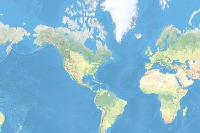

In [4]:
data = gis.content.search('finding_a_new_home2 type: csv collection')[0]
data

In [5]:
filepath = file_name1.download(file_name=file_name1.name)

In [6]:
import os
import zipfile
from pathlib import Path
with zipfile.ZipFile(filepath, 'r') as zip_ref:
    zip_ref.extractall(Path(filepath).parent)

In [7]:
data_path = Path(os.path.join(os.path.splitext(filepath)[0]))
data_path

WindowsPath('C:/Users/shi10484/AppData/Local/Temp/finding_a_new_home')

In [8]:
datapath = [os.path.abspath(os.path.join(data_path, p)) for p in os.listdir(data_path)]
datapath

['C:\\Users\\shi10484\\AppData\\Local\\Temp\\finding_a_new_home\\BuyerSellerIndex.xlsx',
 'C:\\Users\\shi10484\\AppData\\Local\\Temp\\finding_a_new_home\\Crestline3BdrmAveSellingPrice.xlsx',
 'C:\\Users\\shi10484\\AppData\\Local\\Temp\\finding_a_new_home\\ImportantPlaces.xlsx',
 'C:\\Users\\shi10484\\AppData\\Local\\Temp\\finding_a_new_home\\MarketHealthIndex.xlsx']

In [9]:
file_name1 = datapath[1]
data1 = pd.pandas.read_excel(file_name1)

In [10]:
data1.head()

YYYYMM   value       date
0  2007-01  291000 2007-01-01
1  2007-02  289000 2007-02-01
2  2007-03  287400 2007-03-01
3  2007-04  286100 2007-04-01
4  2007-05  284000 2007-05-01

In [11]:
data1.tail()

YYYYMM   value       date
135  2018-04  252200 2018-04-01
136  2018-05  254000 2018-05-01
137  2018-06  254800 2018-06-01
138  2018-07  254900 2018-07-01
139  2018-08  254900 2018-08-01

In [12]:
data1.shape

(140, 3)

In [13]:
data1[['year','month','day']] = data1.date.apply(lambda x: pd.Series(
    x.strftime("%Y,%m,%d").split(","))) # split date into year, month, day

In [14]:
data1.head()

YYYYMM   value       date  year month day
0  2007-01  291000 2007-01-01  2007    01  01
1  2007-02  289000 2007-02-01  2007    02  01
2  2007-03  287400 2007-03-01  2007    03  01
3  2007-04  286100 2007-04-01  2007    04  01
4  2007-05  284000 2007-05-01  2007    05  01

In [15]:
grpby_data1 = data1.groupby(['year']).mean()

In [16]:
type(grpby_data1)

pandas.core.frame.DataFrame

5) We will Create a graph showing how average home prices have changed since they bought their home.

In [17]:
grpby_data1.reset_index(inplace=True)

In [18]:
grpby_data1.head()

year          value
0  2007  276616.666667
1  2008  221875.000000
2  2009  188391.666667
3  2010  176216.666667
4  2011  154766.666667

In [19]:
grpby_data1.value

0     276616.666667
1     221875.000000
2     188391.666667
3     176216.666667
4     154766.666667
5     145158.333333
6     163741.666667
7     183975.000000
8     197133.333333
9     229566.666667
10    235966.666667
11    252025.000000
Name: value, dtype: float64

In [20]:
grpby_data1.year

0     2007
1     2008
2     2009
3     2010
4     2011
5     2012
6     2013
7     2014
8     2015
9     2016
10    2017
11    2018
Name: year, dtype: object

Text(0, 0.5, 'average house price')

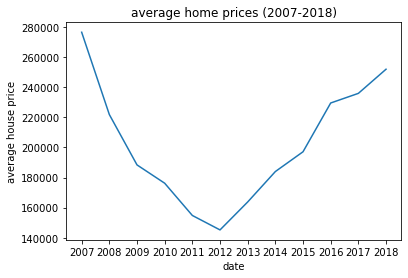

In [21]:
plt.plot(grpby_data1.year, grpby_data1.value)
plt.title("average home prices (2007-2018)")
plt.xlabel("date")
plt.ylabel("average house price")

7) Determine an appropriate selling price based on home sales trends as follows:

> a) Determine the current average selling price and the average selling price when they bought their home. Divide the current average price by the beginning average price to see how much homes in their ZIP Code have appreciated or depreciated. When Mark and Lisa bought their home in December of 2007, 3-bedroom homes were selling for \$276,617. 

In [22]:
price_initial = grpby_data1.iloc[0]

In [23]:
price_initial

year       2007
value    276617
Name: 0, dtype: object

In [24]:
price_current = grpby_data1.iloc[-1]

In [25]:
price_current

year       2018
value    252025
Name: 11, dtype: object

In [26]:
house_worth = price_current.value / price_initial.value

In [27]:
house_worth

0.9110983912755316

This indicates that homes in Crestline are only worth 91 percent of what they were at the end of 2007.

> b) We can get a rough estimate of what their home is worth by summing what they paid for their home plus what they invested in it, and multiplying that sum by the ratio computed above. Mark and Lisa, for example, paid \\$291,000 in 2007 and invested \\$100,000 in solid improvements (new kitchen, major landscaping, hardwood flooring, and so on). Multiplying (\\$291,000 + \\$100,000) by 0.91 gives a rough suggested selling price of \\$343,134.

In [28]:
(price_initial.value + 100000)*house_worth

343134.83912755316

### Get additional information about the local real estate market

If their home is part of a seller's market, they are more likely to get their asking price.

1) Download the Buyer-Seller Index data at the ZIP Code level from www.zillow.com/research/data. In **Home Listings and Sales** select data type as seller-buyer index and geography as zip codes.

2) Open the **.csv** file using Excel. Zillow reports ZIP Codes as numbers. We will need to pad the ZIP Code numbers with leading zeros so the Zillow data will link to the ArcGIS ZIP Code geometry.

Follow these steps:
> a) Sort the RegionName column from smallest to largest so we will be able to see how the formula below works.

> b) Name a new column in the Excel table zipstring.

> c) In the first cell of the new column, enter the formula to pad each RegionName value with leading zeros, keeping the rightmost five characters: =RIGHT(CONCAT("00000",B2),5)

> d) Drag the Autofill handle down to the last data cell in the column.

<img src="data:image/PNG; base64, iVBORw0KGgoAAAANSUhEUgAAAtwAAAFOCAYAAAC178q8AAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAAEnQAABJ0Ad5mH3gAACT+SURBVHhe7d3fqyTZYR/w+yfo0Y/Cz37SoCU7YY0IBulRQokczT54HsI1iOBgCCR52SsSiYEYe0agNwvNWEJKpGUFIngiJIvdiZKNkbSrB8HaYRDKKlYckIIEAj3opd2nuqv71OlTP7q7TndV388Hvsztrurq7qo+Vd+uqblz9Vv/4W8WIiIiIiJSJlcLAACgGIUbAAAKUrgBAKAghRsAAApSuAEAoCCFGwAAClK4AQCgIIUbAAAKUrgBAKAghRsAAApSuAEAoCCFGwAAClK4AQBuqZubm8V73vOexdXVVZUPfOADix//+MfrqfMV3sv3v//99a12YZ4wb2l7PcPT69XG2OT66XoKAABzE8r248ePF7/4xS8Wr7/+enX7wx/+8HrqfNVFuqt0D5lnLAML9/PFo7u7Bfvpo0fLKUd6er24ujvCcgAAOEo44/3e9753fWveugr1Kct2MKxwP3+0uHt1d/GoRCtWuAEAJuH+/fsXcYa7livWpy7bwcAz3E8X18sX1ncFyfNHd6s3sEnjAauz5NdPV8u6urpeXLtEBQBgEsKlJaGP/eAHP1jfcxnign2Osh0Mvoa7LtN3W05zr6ZfL6t5Lb0MZXX77t3r5plyZ7gBAM6qLtvhz0tUF+1zlO1gr380ubq0ZPVim8U7nLXOXHJSzV+X8HXhTmdSuAEAzib8g8nwjyUfPny4vufyzKtw10JJDi+6Pntd3Y7PbtfiIl5fUlJN2FK4AQDOJvx2ktDrLlVdtsOf8c+ndPjajf8hpcINADBL4Qz3pfz+7VSuYJ+jdB/xdSb6h5Rtv8Ukc0mJwg0AQGldxfrUpXtY4Q7FOWnKz5N/JLn6T3His9zpNdsdhTt7dhwAgNLCGe7wqwAv6beTDCnUpyzdA89w17/KL85uSV6V8O08zX8g2VK41/dXj9mdCABAQaFohx52Sf9oMryfIUW6Lt2llX8GAAC4xRRuAAAoSOEGAICCFG4AAChI4QYAgIIUbgAAKEjhBgCAghRuAAAoSOEGAICCFG4AAChI4QYAgIIUbgAAKEjhBgCAgq5++ctfLkREREREpEwUbhERERGRglG4RUREREQKRuEWERERESkYhVtEREREpGAUbhERERGRglG4RUREREQKRuEWERERESkYhVtEREREpGAUbhGRkXJ1dZW9X0REbnd6C/drr70mE4ttdJmxXeebepulhTs37ykSvwavY95J16GIzDODCve7774rE0luB2wbzT+263wTb7tc4c49pmSm8lmayuuYc3LrUETmGYV7ZnEQu8zYrvNNvO0U7m2m8jrmnNw6FJF5RuGeWRzELjO263wTbzuFe5upvI45J7cORWSeUbhnFgexy4ztOt/E207h3mYqr2POya1DEZlnTla4P/O9/7T4rVc/nJ0mw+Mgdpk5ZrvevfuPWvP7v//PFm+99Vb2cTJO4m2ncG8zldcx5+TWoYjMMwr3zOIgdpk5ZruGYv25z/354tvf/vZO7t3750p34cTbTuHeZiqvY87JrUMZJ3fu3DkquWWKdEXhnlnGOoj93ZMn2fu7cshjZFiO2a6hcIdy/Zvf/KaRX/3qV4sf/ehHiz/5k/+4+Iu/sO1KJd52Cvc2U3kdc05uHco4CaX5UAq3HBKFe2YZ4yAWivP/f+kfL/7vn/1pdnouYd7wGKW7TI7Zrm2F+2c/+9nijTfeWHz1q19tjTPfxyfedmMV7nfeeSd7/5AM/Sy9+eabo+S73/3uzrJDhr4OaU9uHco4Ubjl1FG4Z5axDmJ1gR5SuveZVw7LMdu1q3B/+tOfqqa35WMf+6dK95GJt90YhTsU2C9/+csHl+6hn6VvfvObi89//vOLz33ucwfnyfILuMJdLrl1KONE4ZZT54IL95PFvas7i5tnuWkhfdNPkf1fw5gHsSFF+nRlewrbY6ycdruG4txVuP/wD693poX5w+N+7/f+idLdyHHb7tjCHUr2l770paoIf+1rX8vO05d9PkvhOb74xS8uvvOd7yy+973vDc63vvWt6jWG0p5bbsg+r+O0Cdv4anHvSW7atJJbhzJO9i3cYVv8+te/rn6eXuF+dXH/6oXFg7dz08ZK6ec4xXsIOdXz7GZ2hfvJvavF1b0hlzX0HTi7pu9/0D0sxx3cx9hGXYV6v7K9OoiFwrHNPu9t6Lo4Zttc5nY9pnD/9V//z4Gl+9ni5k68be8tnmTnK5V5bLuwbg7ZhnXqAvyNb3yjt9C2ZZ/PUl3wv/KVr2SLdS6hnIfX2PeFYJ/X0Z2wTeLP3r6fg1N9dsZPbh3KONmncH/2s5+t5g/bIxhWuEOxW35e77+ambbOq/eXn+cxyt/QEnlM2SxdVE9VhE/1PLuZV+F+drP8oN9b3Fum/2Dft5Ptmn6qHfT+zzPeQWybXLHer2yHZN7Lk3vVAXLYmaSh6+KYbXOZ2/WYwh1+7i/d4f1cLe7cPNvetxyLNyc9QziPbXdM4a4v8Qhnj0Ox/frXv17dbrtkoy37fpbC8sPzhOdLy3UuoZyHkt53ycu+ryObsM9P9yG5+zpzqs/O+MmtQxknQwt3XbbDn7XhhfuFxQsvtJW7txcPltPap++ToSXymLJZuqieqgif6nl2M1rhDoW6K//qv/1ZVbhz0+I8/sHXs8sPeXZzpzro13+m06uz38sdccidm5udnWzf9G26dtDxmb7tPGHZjdcUyuadm8Wzjscce3Dfdxt1JS7Y+5ftkJb30lgPIUPXRWa+9YF2dd8ym7/paFtmmsvcrscU7vBnSPi1guF2+BWC6fJ31kEm8dhqbu/1ungSb7vtF+bu9RtnHtsuLO+QbdhWeoeW2ziHfJbSst+Wfb4EHPI60rR+9hrbsuMzlt1n7G7jfT6/jaIfXkf9uAJ/65NbhzJO4sL985//fP1TU65sB/sU7vv3X8ie5X77wbJsP3iwKX+v3r9a3n57O084+/3Cg8Xb0WPihPnrz168nGp6deZ8O/3+q8v73n6weCG6b/OacvNGz7PNuqi+ul3OzuttW05j2v3Fq/X9jfQsv/qCUi8jKcw976FzXbUuN3k99bYY9F7yGa1whzI9Rn73L/9ldvmrA+R6Jxl2oslBOZTweEdZ3Y52qn3Tm2k/6FY75rroxa8j7HijS13iA0XrY448uO+7jfpSF+39y3ZI23tp3j90XeyzztrnTdO+vluXMYPtekzhzqW5/PBeuotEOrYa66V6/PJ2NL0xf8f6bWYe2y7shPfdhl2XdQy9fCPOoZ+lvuu5h1y3HefQ17FN17aIP5c9n7Gd5TRv7/X5rQp2/Lzjl+w4uXUo46Qu3GEdf/CDH1z85Cc/qW7X2sp2sE/hfvB2/WfPtFDkomK+U8CjhLIel/Hq9uY5lgXyflTUq4JYF8P0tXTNmyY8djkWGsWznrfvOYcU067lr0tzvX7Cl4fN++9+D93rqmu5yevZ3DfkveQzn0tKGgfFqHxXt9Mdanpf3/Q0bdPS++PXEabldsR9j8k9T3uOP4i1p3zhHrouhs7XN2+adN62++e1XUNJ3rdw51KX8Mbyw7jrLBW599q1ntL74nnDOmx7rtxycvefd9sdUrinUnSnUvw36fzsxdspt826pg95bNtnpe+x4ya3DmWc1IU7/EPIT3ziE43S3VW2g/0K97rkRWV6e3s7T7PMhbOubcUufkzXfblpXfOFDF1O7nacfZ6zTtfy02lh/bQts++5hy6377H7ZzaFO5yFiM98NW/HO8g66Y6xa3qatmnh/uU3nka284UzI9VfNzbOrHU9pus15HP0QawlddkOf8Y/5+bNp2udxQevIeti6Hx986ZJHxvf376MqW/XooW7ei9tpSckNz1+/7l1ERfcaP2GghWdkW6mbZ2G+9u2w+m3XVjWPttwapdynPvSlma6tkWYFu9X0vm6vkTFt+PltE1ve2x9e/UZalxqMlJy61DGSV24g7h0P3jwoLNsB/sW7mE/r862bi7/iAp6M+ExaRlvLmd1Fjfev+Wfr3veNOljhz5nPe/q/t5LVrLL3z4+t/zu99u1rrqWG88XZ/uY9veSz0wK93an1kzXDje+r296mrZpXY9ZZn1QD18GtjvfQ56nPccfxHaTK9j7l+78e6n+urZRdIasi33WWde8adrm7VnGxLfrPoX7vz79y8VX/vOXG/lff/u31bR84Q7FpatM5N5ruK9vbEYlJ7t+07St07b71znxtgv7paHbcKr/WPFc/3hzN6vPXvYSo7BdWy8Zqe9r+wzGt495bJy2+49Lbh3KOIkLd1CX7r6yHexfuLdntes/c/NUl0Os5xleTJP7wjJ2LoOo5888X+u8adJpQ58zzoHL73rcPu930PQ6XdNC+qbvZh6Fu7FzrdMsAs3r7ta3ox1g3/Rm2nee6XKaWT0u/CaVTZlYpv0x+++kjz+INdNVrPcr3bvvpSrbyX1D18U+66x7m8RpX99z3q77FO4vfuHJ4jOP/rSRH7z9VjUtX7iXCeNvWSQbZfjZ9reUVOuh7xrYaD3trrflPL2/fWge225o4e66fKMtp/x1fPVlLqf69YStqS4rST571ecx3kZ9n7F0mzZvV/N2fn7bH7tNfDyK52n7eVhy61DGSVq4g1C6w2e+zyGFe3V7+dnauS+5/cL9Ks2zss00rjuub9fLSQro6uxv/RzJ83XOmyb3foY8Z5xwyUbbmeGO5S9vp+95k57n7lxXmenbpK8nTdd7yWcWhTvsAHNnOZpnT1c7vPrs970n6c6tb3qcMG07b0jz8pVoWvJFIH8gb3tM12vIZ5SD2DpDCvXw0r27zna/JGXma10XbfPVRX55X+OgmJ+3md3XeAnbdZ/C3ZXWwh2yLj6d6yc7bb0ublalPffYzeN31m+ceWy7sKwh27Dvuu22DLme+5jPUp36C0F4rn2u244zxuuokn724r8dqdL/GWvuM3a3ce/nt7Ffqm+Hn7ePa34e43lyPw9Lbh3KOMkV7qEOK9zbs9xd87QXwDirsld/9u6/Gi+nOS39rRyrQlo/R/e8zaSvdehzhvniafl/CNq9/Pr2djnbkt33HrrWVddy0/l2521/L/nM5x9NSpWxDmLDi/S+Z7rlkByzXfcp3OGM9r/7N/+6kTf/x3+vpnUW7oMzrGSEwtM4izmjxNsu7IT7tmF9yUbuv0ofmlP8l+ph+af4L+aPz/5Fdi7JrUMZJ+UL92EJhXvfa4NlHplF4d5882hJ7jGXmjEOYn+3PFjvW6Dr0h0em5ue2y5pco+TVY7ZrqEkv/zyx6tiHeev/upbO4U7XD4SCnac//f3f99auHPbMU48bz4DylB1BrPrcpJpJ952YZ30bcM333xzlJQu3CGHlu2QY19H+llri8IthySU5mOSW+bRqX5XdvflJJea3Niuk5t/jnGGe2Y59iBWp604d+WQx8iwHLNdQ6nO5Y033qj+jAt3V85xhnv1V/nzLkvxtksPDoeMzWNzzGdpzJzudSjcMv+k1xbL5eVkhTv8D5K/2/qf2sjQnO4gJqdMqe0aCnc4+x3KdF/q/20ytxxpT7ztFO5tpvI65pzcOhSReeZkhVvGiYPYZabUdg2FO5TofZJbjrQn3nYK9zZTeR1zTm4disg8o3DPLA5ilxnbdb6Jt53Cvc1UXseck1uHIjLPKNwzi4PYZcZ2nW/ibadwbzOV1zHn5NahiMwzCvfM4iB2mbFd55t42ync20zldcw5uXUoIvOMwj2zOIhdZmzX+Sbedgr3NlN5HXNObh2KyDwzqHDLtGIbXWZs1/mm3ma5wn2OxK/B65h30nUoIvNMb+EWEZFhSQu3iIhIiMItIiIiIlIwCreIiIiISMEo3CIiIiIiBaNwi4iIiIgUTGfh/vcPHomIiIiISE9yXbpOb+EGAADaKdzA4qc//en6J2CujGOYnnpcKtyAAzVcAOMYpkfhBjYcqGH+jGOYHoUb2HCghvkzjmF6FG5gw4Ea5s84hulRuIENB2qYP+MYpkfhBjYcqGH+jGOYnokX7qeL66u7i0fP1zeBohyoYf5OM44dn2EfJyrczxeP7l4trq7qXC+H6hAGNJxS64H6+aPF3c34XeZ62AjOGzquw3zRc9oXwCDdhXusceX4DPs4QeFeDe678ahcHrwfDTpeG9BwStkDdVW2m+Pw+aNHy9F5qAHjel3wG70+dx+wo++L8zjjyvEZ9lG8cD+9Tsp2Rphn82377qPFdu54QKeDOzPt6WrHEZZT7TyeXm+Wu92ZtMwLtBfuxrjc1TuGo/HWSMvga91vhDG9Wb6xDDlthfugcRWN53ic311+6a7m2ywu/pvs+P725cFtUrhwh4HWffnI80d3dwf05qi5HqjVxPjnIJ0WDeS6aNfLqW7XryM379BLXOCy5Q/U6wNpy4Gyfwynj03HcqprephmLEOX/Dg+cFytpeO8uh0trzHuG1/S88uD26Zs4a7+qqrrAJjbAaQDv56ezjt0WrDPvHB7tZ0ZC1YH2CHlOdyXG8O1njHXud+IH5sup2e5cEtkx/HB4yrouy+dHr6kdy0Pbp+yhbsaaH2FO53eNojTQTt0WrDPvHB7dRXu2qp4x4V66Biu9Y25runx86Xz9S0Xbof8OD50XAXx9Fo8X/h5+WW8kXiacQmFC/fqr6Lbr6vsG9jpgI7nHTot2GdeuL2GFO7muM6Nn3Bf38G7a8ytlj/4WtPNbH3LhdshP44PHVdB331dY8+4hKBw4V6qrqtMSvfz7W8pqa77iv6Kuv0a7ubOonn9WDqgu273zQu3V/ZAvRzDzYN0c8wMH8O1AWOu+uvvZL9R7Uu6xq6xDEHrF+eDxtVKc1yvb0fzpdO3jEsIyhfuYD3IN3/V1LgGtB64uWnJQF2X95Dmv5DuO/DGt/vmhdur68zYZowukx5XB4/htc314NkD9Fq63+j8K+3AWIagtXAHe4+rWnM/cP00N/6i5W72A8YlBKcp3MAsdB6ogVkwjmF6FG5gw4Ea5s84hulRuIENB2qYP+MYpkfhBjYcqGH+jGOYHoUb2HCghvkzjmF6FG5gw4Ea5s84hulRuIENB2qYP+MYpmfUwv2/f/x/REREREQkSaBwH5BXX/svIpNP7rPbl9xyROR8yY3TvuSWIyLnSRiTgcJ9QMIKhCmrB/m+8dmG6TCOYd7qMRwo3AfEzoyxvPbaa6MncKCG08mNw2MTGMdwGrkxeGyCegwHCvcBqXdmf/7dX1T5F+9/jz/9ufefQRiU77777mhJB/m+caCG/RnHMG+lx3Aw88L9hcW9qzuLV97ITSuXemcWlyeRfRI+N4EDNcyfcQzzVnoMB+MX7jc+uXjf1dXiqs7Hv9Ccvlf6CvX5C7fIoQkcqGH+jGOYt9JjOBi3cFdlu1mAn73yycXjevremX7hdoZbDokz3HA5jGOYt9JjOBi/cL/vk4tn9e1MHn88OvvdmHddnh8nZ8jrZM+U5x7z8qbgh+d63yvf2c7/+OXkOQ9LvTPLFanx89XFS8v39dJnctNkzgku+0D9dHF99eLi4fP05zGVWi4Md9njeKhTjHcoo/QYDsYt3D/+zuKV9y1Lb0upffbKnca0qnxvinQoz+ljh5zhbj6m8RyhYEdFfaeAH5h6ZxZK0+oM96oUN78kvH/xsa/li9Z5sn6Nv/Ppxaey06b2ei878zvD/Xzx8MX48329PKT2GXYAfnp9tbjOLezp9eIqOyHmwM75zWIcP3+4eHEzfpfpHVv7GrNw9z2+9PLPacqv7XKVHsPByIV7lar0hgHdW57DffUZ6bbpfYW76zHx8sOXge3Z72NS78y2BSpTWD/zB8t18AeLP9rMc+5svxT89h+/lZmmcJ86wSwO1NUB4GrxYnwEWB68H/Yer+MDR8dBpKVYtxbxBgcnzm/y47gq281x8vzhw+XoGdPA8T5I3+NLL/+cpvzaLlfpMRwUKdx1VsU7LtRp4U3L8RiFOxTr7X3hrPa9x8ufw+UuR/0Dzm3qnVkoTdsz3GlhTe97a/Gx36nPLuyW2z/6SD0tFOJPR4/dXXY8b/OM9Xrez3x68dvr6dtLUerlhD/TS1SS56i+LGyfY2cZ6fKj+ZvL7X7Ptzl9Z7g/9KEPLZ49e5ad9s477yw++tGPZqeNfqBeCsW3UbZ3xGe/4wNFfODoOoiEaekZ8+S+UMrXn7GQbRHveo70dtvrXGosf8jZe9ia/DgOhfvFh8sRkLMeJ0+3Z8Cr8RWNicYX34PG4h5jr+9MfMf0sK/a3N/6foP09UX63l+9nqLlx8/74vKLTLH3TjGlx3BQtHDXl5hUhbe1UJc4wx0V+/VlJaH8r17H8al3ZtsClRTWZT71x+9fXH3kq5vbVUmub39tWVijolzNm97eLK+57HTexnKreZe36+mNs+zRcnbOvsfPsSzJH4lK/M4y0uVHz58st+s9S/cZ7jDAcwO9HuCPHz9u3F9n9AN1dZDpLqDVwaY+MDQO7F0H4KadUr88EG1vLw9Y19HBszpI1a+p6zmat7tfp5LN4aY/jtelL1tCw+c/mlaXwHqsNMbbYWNx/7HXfPyu3enPH764W4JbC2vb8vve3+46TJ+3ul30vVNC6TEcjFu4l+W2eY10sxBX12x3XsN9SOGOl5Eucz3P+16uMsblJCH1ziyUprZruJuXbcSFNiSc+c0X6t35236O582U6s7lpMU9t9w67cvovp1Oi9+zDLmGOx3ofQM8ZPQDdXXGJXdQqKUHh3Bgr2/H03oOIuHAtjkQxcvIaVtu+hxd09peJ+xv8uN4bVUGl8eoRmnsGjdB1/iIpw35ORgy9trur6XTc/OH+9r2XX3Lr8XztT1H133p9DHeOyWUHsPByGe41/9oMiqe6VnlqhDX0wf8A8nN9eDZy0HWj3nl5ZZlrrJbwo9LvTPbFqhmuUzPQq+mr1/fJnExjc821/flius+8/ZNW13usfpi0Jy2OsPe9lrblp/eDj/Hy4iXIyFB1yAPqQf606dPewd4yPgH6rDz7yvc6XbOHVD6DiLRgahxFmhlUxT2eo50Wvz4eBnBdnrrSTFoMf1x3LQaT/GZ27ZxEzRv7z8Ww8/x/PFjgu307dhrPueudHq4ne6nupbRPm3Y+6v1PW/4OV5WvLxgO334e6eE0mM4GLlwTzOhcI91OUlIvTMLpantGu7dSz3aymZuWlpccz/H8+5/hrs5PZoWLgvZ+bLQtoyu2+k0idN3hvuHP/zh5ucw0F966aXGAI+nxxn/QB2KcFcJ7To4pAee7oNIONCFy0jqPzcaZ7+DtuWmz7Hf868MnQ+2pj+OU/G47ho3QXT7oLGYLq/NPo9Jp+fmD/fteYZ78Pur9d3X8jw7DnkMYyo9hoPLL9zVf8Yz3uUkIfXObFugcuWyeV+zgDeTTqtutxTXalpUiLuLfXw79xqXqa/DrqclhbvrevK+213vWWb0W0qq6xiT0v18+1tK2q+V3PMgUp3Zvl5cp5eTJAfB1Rmo3HJXJaIu6835ul5nrO8LBuya/DhejqHGl9jOsdlxe/BYbC5j/7GXvobU7vTqOaLX1v2cLcsf/P620uepbkfzjf/eKaH0GA4uunCvLl/pugb8sNQ7s1Ca2s5wh6zKanz2ObyedRpnkePf5hF+00e8vN1lrwp5bjnpvN3LqdMs+M3X0v0bU4bc3i6r+Vpvd4Zcw31IRj9Q16pruaNtuXMWKDctPnAMOYisDjq7B6f1/evlN38LQLLc9ZeD3fmCrte5vb9ZTKDf9MdxcwyFbIdZOja7bg8di7llRM8/YOytyu7y/paympu+KrvrNPZRqeT1LLN67j32NRvNx1w/Lf/eGV/pMRxc/hnuAql3ZrkiNUrCb/TYuVZbLi3B9A/UQB/jmI3ef2jOFJUew4HCfUDqnVkoTasz3PlCdVjWZ5hdinHRmd0ZbqCVcczK+my3M9OzU3oMBwr3Aal3ZrkidUgal4iEKNu3IoEDNcyfcXx7NS5jCVG2Z6n0GA4U7gNS78xCaRr/DLfchjjDDZfDOIZ5Kz2GA4X7gNQ7s7g8+dOf+/4ZOFDD/BnHMG+lx3CgcB8QOzPGEgbl2AkcqOF0cuPw2ATGMZxGbgwem6Aew4HCfUDszJg6B2qYP+MY5q0ew4HCfUDCChSZenKf3b7kliMi50tunPYltxwROU/CmAwUbhERERGRQglGKdwAAECewg0AAAUp3AAAUJDCDQAABSncAABQkMINAAAFKdwAAFCQwg0AAAUp3AAAUJDCDQAABSncAABQkMINAAAFKdwAAFCQwg0AAAUp3AAAUJDCDQAABSncAABQkMINAAAFKdwAAFCQwg0AAAUp3AAAUJDCDQAABSncAABQkMINAAAFKdwAAFCQwg0AAAUp3AAAUJDCDQAABSncAABQkMINAAAFKdwAAFCQwg0AAAUp3AAAUJDCDQAABSncAABQkMINAAAFKdwAAFCQwg0AAAUp3AAAUJDCDQAABSncAABQkMINAAAFKdwAAFCQwg0AAAUp3AAAUJDCDQAABSncAABQkMINAAAFKdwAAFCQwg0AAAUp3AAAUJDCDQAABSncAABQkMINAAAFKdwAAFCQwg0AAAUp3AAAUJDCDQAABSncAABQkMINAAAFKdwAAFCQwg0AAAUp3AAAUJDCDQAABSncAABQkMINAAAFKdwAAFCQwg0AAAUp3AAAUJDCDQAABSncAABQkMINAAAFKdwAAFCQwg0AAAUp3AAAUJDCDQAABSncAABQkMINAAAFKdwAAFCQwg0AAAUp3AAAUJDCDQAABSncAABQkMINAAAFKdwAAFCQwg0AAAUp3AAAUJDCDQAABSncAABQkMINAAAFKdwAAFCQwg0AAAUp3AAAUJDCDQAABSncAABQkMINAAAFKdwAAFCQwg0AAAUp3AAAUJDCDQAABSncAABQkMINAAAFKdwAAFCQwg0AAAUp3AAAUJDCDQAABSncAABQkMINAAAFKdwAAFCQwg0AAAUp3AAAUJDCDQAABSncAABQkMINAAAFKdwAAFCQwg0AAAUp3AAAUJDCDQAABSncAABQkMINAAAFKdwAAFCQwg0AAAUp3AAAUJDCDQAABSncAABQkMINAAAFKdwAAFCQwg0AAAUp3AAAUJDCDQAABSncAABQkMINAAAFKdwAAFCQwg0AAAUp3AAAUJDCDQAABSncAABQkMINAAAFKdwAAFCQwg0AAAUp3AAAUJDCDQAABSncAABQkMINAAAFKdwAAFCQwg0AAAUp3AAAUJDCDQAABSncAABQkMINAAAFKdwAAFCQwg0AAAUp3AAAUJDCDQAABSncAABQ0NGFW0REREREupPr0nU6C7eIiIiIiBwXhVtEREREpGAUbhERERGRglG4RUREREQKRuEWERERESkYhVtERESK5urf/o0USG5d9+W1116TAsmt6zgKt4iIiBRNrizK8cmt676Ecvjuu+/KiFG4RURE5OypC2KurMj+UbinFYVbREREzh6Fe9wo3NOKwi0iIiJnj8I9bhTuaUXhFhERkbNH4R43Cve0onCLiIjI2aNwjxuFe1pRuEVEROTsUbjHjcI9rSjcIiIicvYo3ONG4Z5WFG4RERE5exTucaNwD82Txb2rO4ubZ7lp40XhFhERkbNneoU7FLGrxdUmaSnLFLUn9zLznSfzKNzPFjd34nV8b/EkO1/JKNwiIiJySzKpwv3sZnFnWQDvPem6LylqVdk+R2HMZ/qFe/WF5s7Ns+19y3V8E6/zk0ThFhERkVuSKRXuJ/eSIlgnlOo7N4tn1e2oqE2sbIdMvXC3ruM61Trdnv3e+aLzZPUFqDltlbDs+nHb54jPpscFW+EWERGRW5LpFO6uAham1cU6Ln7TKtsh0y7c8XrMZVmO79VfbJZpfKEJj12W5vqLT/Jl59nNnehL0bPFkyerwl2V8HtPVssLf1uR++JU3S4ThVtERETOnskU7urSkbYyGJezdfFrnEWdTiZduDvXcS7peo8Lcte03Dwh4Wx332PGjcItIiIiZ89kCndnAQvT4jOtYb7w5+5lDefOpAt3Yz3mU52pXn+haV4Gkm6f+HbbclfbaNjyykThFhERkbNnOoV7da3vXtdw7/yDyvNn2oV7tY5b11djPYekpTouyF3TcvPsM228KNwiIiJy9kyncC+TK9DVtcJtRW+Z6jHli9vQTLtwL1Otz2QdL9dh9VtKksK9Ottdr9u0IDdvN67VbruGuxGFW0RERG5JJlW4Q9ale3sJQnqpQqaorUvkFK7pnnzhDknXcfSPHePfz33n5iZa192FO33sttCH+bb3Z/+morpdJgq3iIiInD2TK9wzzywK9y2Kwi0iIiJnj8I9bhTuaUXhFhERkbNH4R43Cve0onCLiIjI2aNwjxuFe1pRuEVEROTsUbjHjcI9rSjcIiIicvYo3ONG4Z5WFG4RERE5exTucaNwTytp4X799dc3qe9TuEVERKRo6oIo4ya3rvuicI8fhVtERETOnlxZlOOTW9d9CeVQxk+8jhVuEREREZETR+EWERERETkw6Rnt9HaIwi0iIiIicmDSgp3eDlG4RUREREQOTFqw09shCreIiIiISMEo3CIiIiIiA5Oewe67HaJwi4iIiIgMTFqo+26HKNwiIiIiIgOTFuq+2yEKt4iIiIhIsfxy8Q+YnCTAQGHgHwAAAABJRU5ErkJggg==">

<img src="data:image/PNG; base64, iVBORw0KGgoAAAANSUhEUgAAA4QAAAFmCAYAAAA1XVSbAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAAEnQAABJ0Ad5mH3gAAKM4SURBVHhe7b3Jr2TPdteb/4dHT3ojRgx+E87EEwuJPwAG6IfEKD198htgxMD8QPjybAmOQEh2Ua5XKp965XLdunWrbNe1DQJbuj+DMY25Nm0B5oK59H3fab8dXe5o1opYsdfOzB15vh9pqSozY0fzXU1EnHPq1OE73/nOBIPBYDAYDAaDwWCwx2e4EMJgMBgMBoPBYDDYI7XDL/3SL02w8Y1y7rWNmicMFhviBQaDwWAwGOy6dvjf//t/T7CxzTgyPljvxcy8qPnCYMbyuEW8wGAwGAwGg13ecCG8AcOFEDai4UIIg8FgMBgMdn3DhfAGDBdC2IiGCyEMBoPBYDDY9Q0XwhswXAhhIxouhDAYDAaDwWDXN1wIb8BwIYSdw/7bf/tv01/6S39p+vDhw/RzP/dz0z/+x/+YbLfWcCGEwWAwGAwGu77hQngDhgsh7Bz2z//5P7eXwa9+9avTq1evpl/91V8l2601XAhhMBgMBoPBrm+4EN6A4UII29r+9b/+19Of/JN/cvoTf+JPTH/9r//16Qd/8AenP/yH//D0b/7NvyHbrzFcCGEwGAwGg8Gub7gQ3oBtdSH8qZ/6qZNRn/ea5oBvflzxX/7Lfzn9nb/zd+x3qv7n//yfZLtbsP/xP/7H9B//43+c/tN/+k/k59ew169fT7/v9/2+6S/+xb84/eZv/ub0Qz/0Q9Of+lN/ChdCGAwGg8FgsBszXAhvwG7xQvgv/sW/sD+iaPr4C3/hL0x/62/9renf//t/T7Y1Zi6Q5hnzna3/+l//K9lmj2bm/Ru/8Rv24vtP/sk/Idtc2v7+3//79ruB5kL49/7e37Pvffvb37bzM/PN2681XAh77JvTV77ne6avfJP67DFarMe3p1ff+z3T93zlm/azb35l/vv3vpq+XTwzil1rPW7c7331beKzHtuqHxgMBoNdyg7/+5tfmb5n3liX4u02WvNeMBxC9m23eCH8D//hP0z/4B/8A/sdKtOPsb/8l/+y/W7h//pf/+vUzlxQzEXl137t16a/+Tf/5vSv/tW/GuZCaOb+d//u37UXXjN3oxnV7lIWdP2FX/gFexn84R/+YXvJztttZXncauJFYt9+9b1JXXP2vdOrb2dtbU0k3jf27VfT9xZ9fGX6ZtTGjZO+58zVVldr/aG/6CsyfyE49UldCoj5UAdxcu1R/yfz+0F7/tlnwnnE6073FZ0e9tJUuUAV6yfWvqc2rfXEVvRljYpfwd5u/U/5fjE7n6yfoi9BPzAYDAbbjx3sJn7ajNymHBf2UPxxKdyv5QfrvZj2gG8uKOYCGL5TaOyXf/mX7W+7ND9mab4b+K1vfcv+Jsx/9I/+kX2P6mePZi68f+Nv/A07d7Om8KOxVNtLmLmc/rk/9+emn/7pn57u7+/thdD8u0HzC2W+8Y1vnGVuedxq46Vl7uBMXd6ow2x5oOZqoe0jOrBT4zirXKhql1DmOy70fPK24aKV9x0uB7Qe1oqLDD1/2Ty8+YvCV8wzxEXpZJ162Dn4/mh/xH35tUfj761NbT25uf5SPzqfxGM4zWIf0X5zc8ljPDb7XGU+ztr9wGAwGGw/dmgWdv+V32Jjh+3G8oP1XmyrA775t3XmRxfNxcn0ab6jZr4jaC5T5heebPnv2i5h5jL467/+63Y9xsyF13xn8z//5/9Mtr+EmX/D+Gf+zJ+x/3bwB37gB+yF0Pybwa9//ev2Qmj+PSf1nMb2cCGkDuPUZaQ8xPNGj2PMjUXW0toFyNbg7DPbvn3grs47fFevuKx8ZXpFPkfMXziPYKeLjn2O0shbpx7FBeq0Jlrz1Ed7a1NbT2n5s9Yk+zbTJh6bMtmFsN0PDAaDwfZjh2QToUyyscDU9od/8I+yRrWPbasL4Z5+ZJQy02f8I6TmIrWnHw8139E0v/zmv//3/578WGts5jJoLrNm/uZCa9aQ/xjsNSyMb3781nxn0FwIzY+OmvWYy+A//af/1F4aTRvzbzm3+FHSPG63jpfcyIMzdUAvLiP+u2zCwy09jjH6MmCtcgEq+/PzaR7K2/O2h/ao72Usaox8/tJ5BHPPu8tjRQtjXXq4dYS+7OdhzX7/Ki6stn///t7azK/Z9RBG6cGOE5tvk/uA7C8y6YWw1Q8MBoPB9mPtXyqTbVSw89may6Cx/GC91vZ8ITQXv0+fPtnvDpp+jZkL1Tm+c7XWzHcqzYXK/AKW//Jf/kvxuVmD+RFX811BM3fzXcI9zd+Y+eU9f+AP/AFrZn7momg0/yN/5I9MP/uzP2svhn/8j/9x+19SmEuh5re/5nG7Ol78wdbUqdKWSwV1QHUXouziYWte9B5zcOaMPwivuxCWB3DXT/uC2rh0zebmymhU1P68P+k8vNn+Fl2qF4suPSrG9RNfmPbWJn5fYHxcUzEYmZ0LMSY3R2+u79R6YxoGg8Fg+7LGhdBv+OKvAMO01nsZNJYfrNfaXi+E/+7f/Tt7kTL9/cqv/Ir9N4Tm4mJem180Yz6nnru0me/2mctT+FHW+L+RMJdBM+dwGfxrf+2vWY3i5/dg4RfKmAtgmJ+5tJpLoHnva1/72vTu3Tv7bw2N7pp/t5nH7Vbxwpk7OGeHWeoykx9kicN60VdUI8lxIus7PFPf5Wtf9Kz5ea++EM6WXizoC2FzHtaIddQuDF16VIzr5xwXua3axO8LjIu3ul8qe3vnXML4xXiKNcFgMBjssla9ELrDALF5wc5qPZdBY/nBei+2xQHfXDrM5cn0ZS5S4ZebmAvW3/7bf9u+b34Ec8v/DmGtmcupmY+5tJq5mgug+XeB5tJkfpuoec9cCM3l1vybwWv/mGhu5rt979+/txdC8x3AcNE22r58+dK+/+rVK9vOmFnXLr5DKLT8shMOssWBNT+0+4Mtd8DOv2OVj7NY5QLFXRQqF8L2pah9YaM1ieaerD3vTzqP2cjLwVZ6VGyrS9ol28TvC4yMN98f98Xc6t6+Yi55DlhTrAkGg8Fgl7UDV6xxGRzH8oP1Xkx7wDf/Zi38hlFzkfpn/+yfJZ+bi4r57Zzmc/NjmvFn1zDznUtzOQ3fBTR/mktruAyai6L53Px2VOr5a5u5vD59+tRe/H7iJ34i+feZP/MzP2PfN98hjJ/RWB63q+MlHH5JW2oYdXAmD7LFob1+8bnIhTCZI/UeZe3Lk2Tu7j0zt3z+0nmEPua2pBFadelRMe5SEve/tzbx+wLj4m3xW/p+c2/n5lgx12c2hxX9wGAwGOw6duA3DBTyUSw/WK+1Pf3I6L/9t//W/t98pg/zY5jcf9pufoGLuRSaXzZjnqHaXNLMj4maS2C4AJpLoZmbef1X/spfOev/66c1M7c/+kf/qL34mR8dDe+bNT1//ty+/3M/93P2u4LxZXGtbXYhFBp5cLYH8azWEYdz7nBt7LwXwrJ/Y26Mdo2uHv79gT2eDz33cCH+SjF/2TwqF1NK/9P7cj14ozVP17m3Nn3GPeveTzUU7e0V7WljLund/cBgMBjsWnawhTzaTNwm0j5owPZjt3ghND9uGX6BjPkP6ms/Xmm+U2j+Tz/zo5h7+NHRMB/zI6ThYmj+NL+kZYuL1LnsH/7Df2gvfX/wD/5B+x1Xs4Yf+ZEfmX7yJ39y+sVf/EV7WTT/FYW55JrvhlJ99NguLoTUYZY8yPp2RW0sn+cP9/RlwFrl8FydN1GrzaF/GcONWTzvL4P0RZOYu52fGy+dv2Ae/ll6T/Hzyy+L3XrwVlyKiYvw3tpULdOG1qPU1bVr7+1Ff/F4Zq5kzJT99voJBoPBYNezQ9iM3MYRDg+URRsYbFd2ixdCc3kyz5tLifkuINUmNvPjjuZCaC4y1/z//IKZ76KZ/yzfXAaNmR993csvvwlmfhOq+W8wwiXVfAfTXAifPXtmL7XmF+OYXyRjfoGM+dz82OgP//AP28tt7b/WkNo+LoTh/ai+VS4j4XKTmPRStfJCWPssHMZjo/p3l5B2u9ohPvRBXShq83DP8RcD8vOVenCWr1+i0bXbcJbHK6W9teSSLd/b7dyKL3CENssXABarxEuWGzAYDAbbp7X/2wnY7m2rC+HWpjngm38vaP7tXfglMhIzP1ZqvstlLjnU55c280tXjA7mYvUbv/Ebu/slMuY7f3/sj/2x6cOHD/ZS+PDwMP3+3//77XcAQxtzaTSfhV8kY3581FwGNb9MJtilL4TjWuUi+Sjtcetx3otWqe268RCzMBgMNpLhQngDdosXwlsx811B8/8nmt8qSn1+TTM/Ghp+UYyZ4/d///dPL168OP0H9Oc2XAjlZr9Lg++2nOzx6uEuWq0f+1xt9ruv8Xf8Vo5X9AODwWCwPRsuhDdguBDC1pj5xTE/9mM/Zn+zqPkxUfP/C4bf5HqJ72biQthjZ74IDGePUw97EaZ+Oc8m5n4cNP6u3rrxyn5gMBgMtm/DhfAGDBdC2BozP/Zp/r2l+beOv/mbv2l/PNS8f6kfbcWFEAaDwWAwGOz6hgvhDRguhLARDRdCGAwGg8FgsOsbLoQ3YLgQwkY0XAhhMBgMBoPBrm+4EN6A4UIIG9FwIYTBYDAYDAa7vuFCeAOGCyFsRMOFEAaDwWAwGOz6djCHMNj4Fh+s92LUPGGw2BAvMBgMBoPBYNe1Q3wgg8FgMBgMBoPBYDDY4zFcCGEwGAwGg8FgMBjskRouhDAYDAaDwWAwGAz2SA0XQhgMBoPBYDAYDAZ7pIYLIQwGg8FgMBgMBoM9UsOFEAaDwWAwGAwGg8EeqeFCCIPBYDAYDAaDwWCP1HAhhMFgMBgMBoPBYLBHargQwmAwGAwGg8FgMNgjNVwIYTAYDAaDwWAwGOyRGi6EMBgMBoPBYDAYDPZIDRdCGAwGg8FgMBgMBnuktvpC+Pzt/zf9v3/jG7CVZvSjdIXJ7Nd+7dfI92Eyg346g346g346g346g346g346g346+9mf/dnpW9/6FmylGf0oXXEhvJLhQqizX/3VXyXfh8kM+ukM+ukM+ukM+ukM+ukM+ukM+unsG9/4BnnRgcnM6EfpigvhlQwXQp391b/6V8n3YTKDfjqDfjqDfjqDfjqDfjqDfjqDfjrDhVBnuBDuzHAh1Nmv/MqvkO/DZAb9dAb9dAb9dAb9dAb9dAb9dAb9dPbx40fyogOTmdGP0lV8Icx/5hkXQp3hQqizX/7lXybfh8kM+ukM+ukM+ukM+ukM+ukM+ukM+ukMF0KdqS6E5jL40z/908l7uBDqDBdCnf3SL/0S+T5MZtBPZ9BPZ9BPZ9BPZ9BPZ9BPZ9BPZz/zMz9DXnRgMjP6Ubo2L4ThMjjUhfBHfsd0OBym//P7f4z+fAe2ywvhw+dWt9w+fyDaXtm++c1vku/vwb784jNCx8+nB6LttWxv+tGa7U+3YLuMPyZ/96jhXvOXi8O91cDx6t++NNxn/ePy9GH6fNbvsy++JD67ju05/r7z5RfTZ4fPpi++JD7bie1aP2tfTl98tq+Yi83cR6iLzlXt7f81fdfv+b+mP529/40nv2t+/7dN3/3k55P3r2n5fS5Y9UIYXwbHuRD+2PS7f+t8Gfytv2U6/Nbvnf4fss31bb8XwnRTchvV/orrL/7iL5LvX9XsRjQffj77Yvoy++zh831puDf9uAPR6XD5+UPy/rVtl/FH5O9ebZf6zWbjjcjfvdlo9c/E5p4Ol6PUP2f7uxDuNX+tDXAh3LV+1nAh7DbqQmjf+23T730bvbcD674Q5pfBvIPdXgi/8b3T/3n4HdP32T9/y/S7v0G02YGNciHc42Zk7M//+T9Pvn8926dOnO1Nv+qByB8096Tt/uJvtoEuhLvUb7ZRLoSofzobqv7tUNu95q+1AS6Eu9bP2r4vhD/1Uz9FXnSuavmFcKeXQWNGP0pX8kJIXQZHuRD+P9//W6bD7/xD9u/f9zv3+2Ojo10I9/YjU3/2z/5Z8v1r2cPnzFfGd2p7069+INqfvnvTz9pAF8Jd6jfbKBdC1D+djVX/9nch3Gv+WhvgQrhr/azhQtht8YXwF35o+u6d/ZhobOILIXcZNBa32+eF8A9N3z0Xzu/+Ef/a/lvC3zF9X9Hu+jbKhXCvG/3P//zPk+9fx8b66rixfenXvhC62NzPJr83/awNdCHcpX6zjXIhRP3T2Vj1b3/67jV/rQ1wIdy1ftb2fSH88OEDedG5qp0uhD8+/d4dXwaNGf0oXZMLYe0yaCxuu8sLYXEBzC6IO7L9XgjnC2Bi+zxgcv+x5lXM/0jjHn/5Dme70m+20S6Ee9PPGpm/s+3s318a26V+s7k4zDXcXw1E/dPZPutfHnep7elwvtf8tTbAhXDX+lnb94Xw/fv35EXnqmYvhL9r+u7v+23Td/3gj9NtdmJGP0rX04WwdRk0Fj+4xwuh+RHR8OOitff2YKN8hzBs9nsrDHk8XtUGPBDtSr/ZRrsQ7k0/a1T+7tR2qd9sNg4H+A7hEPUv/wLFjnQdq/7t7zuEe81fawNcCHetnzVcCLstvhDOf/7ALxBtdmLVC6HkMmgsfnB3F0L7S2SizSex/f1ymWEuhLM1D+tXMO5b3tex8X5kal/6tWNsbzG4N/2sDXQh3KV+s41yIRyt/u3tnx6MVf/2t7/sNX+tDXAh3LV+1vZ9Ifz6179OXnSuaqcfGf356QfspTD7jaM7MqMfpetBehk0Fj+4twuh/WUy5L8XdD82urdfLjPShdC9v68C++7dO/L965grniMcJIPtS7/Wgcjru6MffdybftYGuhDuUr/ZRrkQjlb/9nYhHKv+7e9CuNf8tTbAhXDX+lnDhbDb4l8q4/8d4Xd93w9N38jb7cDYCyF18eMsfnBfF0L3fw9yPxpqf2x0Z/8nIb5DqLO3b9+S71/NrHb7LaC57U2/aozt8AsSu4s/YwNdCHep32yjXAj3Wv+4H5vf24VwqPq3wwvhXvPX2gAXwl3rZ83F3F7/GYy5UFMXnataciE0tt9LIfcFidu4EPofF2V/eYz9ZTP7+uUyw1wId3rR+cmf/Eny/Wua29Tngw/xnay9/cf0e9OPOxDZg+QON6Y9xt9IF8Jd6jfbKBfC8erfvi6Eo9Q/Z/u7EO41f60NcCHctX6z7b0OjnEhnM3/9xN7+yUzN30htN8BrP73EvXvIF7D9nshdAfw2Pb4VaKf+ImfIN+/vrnNu9BxZ7/pcW/6nQ6TO9ct2C7jj8lfY3vL4b3m7ygXwv3WP//jo0UM7usLFfusf+NcCPcbf7MNcCHcp35x7u77C4tf+9rXyIvOVY26EJ7e39d3Co1+lK438iOj49kuL4QD2cuXL8n3YTKDfjqDfjqDfjqDfjqDfjqDfjqDfjozP3JLXXRgMuN+ZBkXwisZLoQ6+/Ef/3HyfZjMoJ/OoJ/OoJ/OoJ/OoJ/OoJ/OoJ/OcCHUGXshpN6UGC6EOsOFUGfPnz8n34fJDPrpDPrpDPrpDPrpDPrpDPrpDPrp7Ktf/Sp50YHJzOhH6YoL4ZUMF0KdPXv2jHwfJjPopzPopzPopzPopzPopzPopzPopzNcCHWGC+HODBdCnf3pP/2nyfdhMoN+OoN+OoN+OoN+OoN+OoN+OoN+Ovs//u/fDlMapevhw4cP0/v37+2vITU/V/rmzZvp9evX06tXr+w/fH14eJhevHhhv8Vtvqrx9OnT6cmTJ9OP/uiPwmAwGAwGg8FgMNhFjLrgwPqM0nX1dwjNw2A9v/7rv+7/BtYA/XRAPx3QTwf00wH9dEA/HdBPB/TTAf10cPrhQnglENA6oJ8O6KcD+umAfjqgnw7opwP66YB+OqCfDk4/XAivBAJaB/TTAf10QD8d0E8H9NMB/XRAPx3QTwf008HphwvhlUBA64B+OqCfDuinA/rpgH46oJ8O6KcD+umAfjo4/XAhvBIIaB3QTwf00wH9dEA/HdBPB/TTAf10QD8d0E8Hpx8uhFcCAa0D+umAfjqgnw7opwP66YB+OqCfDuinA/rp4PQb9EL4abq/O0yHu/v5b2Ny3YCGfo+d29ZPHt8fj+vyoF+/8XNurVYpTgfop2Oc/N2n37B/6Hjs+uW53Jvb0O+S+l27Bu2vBnL6bXoh/HR/Nx0O88ITu5vuN1fhXAL7fos1RHb86NvqoBwyvn6ej0c/9+NUqvVxOs6f3SkXRQd07r9zaHcbVAvqp/vp7qShs9hf8jiV+mNpV08vaX7K43vtIb0//uRzknK5euEQa1WNH6cD9CtZ5lObg6uf4v1jo/1qfd/b+y2hUas4xPoJ+zsXW/q0J75Mu9q65fqdL5/WU6szMs5xoYF+Ov14zlyDmlx7/BJOvzNcCNNLQAjyjfaly2IvNudJSL4gjK9fUtiKiZ/rQkgknTksxK81/jxjLFwDriDYwlzEm9M2+IyKU/dcrI/AHwGr7XE6mj56Ar3HJ0zb3o0osCr+NubS9UKilSR+DNCvJIxtjKuPoQ27fyT9+8N9j4ZMnmzS98ZIY42C1S+Lh/lNd+G8+Dp9PhS+CBe2bJ4CeuKr1sYg1c/5SFijL8I2dSbP5VZu50C/7fW7KIOfBzn9zn4hnJVzBewcO+y5OaPTxRvSgPqFddzbP+kNrbVhtyj1E/Sr8efgBSCHLAh2je3DMBmn/uC06C/3s90MzKB2/Dz+K/T4hGnbuxEFVsXfxly6XjS1EsaPAfqVpHWTyoNw2bnn94+sf9dnR91i8mSTvrekI9YoWP0o3Yvadn6q2oZLaufiw/ok8dXKRbF+V9CuzjZ1Js/l3n0E+m2v30XpOXvsEE6/i10IiwDyBf1kRTCEr5Dl5vonAygUysjymmmfm990c/XtuEBknG77IApqPCfzd7PmZJzoGfmGNJ5+yzqIryYx63GaRpYNnI9b6uf65TbJov/Z4jnUxm89OzdIPy98sT9K/Shf0ZBx6mNnka3ujwXXzjVjYp2jUpStz/xaav6L250Q+LM3/gzpWL59YtlaGvPoqReFBtk87efze7W8zrUKbd1Y8vgx/UC/XL9oPkUueU7x/pHfP3L9iRxJ5hiNX6wx+kzSd9Dg1I9vn6/bwM3hRNV30ljz7QhfsfoV8eBwa0o/O60zWDQO1d6QaJHtt8vj9Lxj8v7t67l9oiupuSy+Wjkg1q8Yi/dJmG++tkDcxlKNEd9+Huc0b/t5u85YJH1H7xVzM1T6gH7pe8XcDF361fcDajwT30m+MNqHz8OST3pEltTQQjN6fNOulq8nX4fPT1b6thcq/gxnvxA6YagNKW7nF34SpAx618/yTC7w/Mb8eVbk/HtxYXP9xH3Txc9in0/nbqEKavZeOU66RmlBGFG/ZH5Fv2V702eiP6FvPi6vn2lH+MzA+FMyPvds2xf7hC2oyaJp+DhN32v6w2B1rcRlDcYnhqKfiu/jdlJ/rom/2trWzIP3Qzq+ea83v+Z3yDw9jW/1LPNaEj+mH+iX6xfPp6zfBvu8fU9+IXR9LuvJX8/vzGNFr5k8kfRdauBI1j3TmoP7vOY7aazxOvLxl8ZDgFprNSaoPSR5L48PM9cwdhk7OW3tyz6W9fG6uPfo2I1fS/Vz8yJ8SY0d/NvUjhorj5EwdjmWe9Z8FsfggrjvyutWH9Cv/nqNfjGt/su15XOs5edM7TxBaNYenxov7cc9E2uyHk6/8/9SmUyYsPDy7Vhgok3mgFTgUrxALqJ9nbVL+4pgnE6Nlwcw2WfUH18QzHwjK4XavX6kFqfXeeBTMMkQjcEWBF/4nH6Z71h/5hB6kM9KfLFPSv0kfnGQcco9W/OHWGeGSts8Xri2aTu5P9fEXzGnQNG/bB6yekHB5Ff2bD7f02s7j3x+8vgx/UC/cn5J3czXlBzohBfCoOVpIDfvqo8KLR3tvv36orofSHVozUHiO2msEfVlxsyH1Y+Yv4XRZSEfqxw77b+yBq9tbX2ur2U+VmNinbHPkvEb8dXSl9dvHjOztB/eJ3mMtLTLuijWZPvk/Bni11rs146+I23T1+0+oF883/z1Ov1OZGMZ6uN5kufcHNgcIMYwcJqR41d9SGjAjLkGTr+zfocwBHiyqCSQcguLLQM6F7opXiATse2IiIoD0rUy880nFBVdyYY0qn75OsKcXXJRiebne1qHt3z+0RjVgmA46RTNg/Vne3zyWZEv9kmpn/NLEbMEhX8NQQsqjwyUP/x76ZBUfDBU8jOPF65t0q7Dn2vir5iThdBdOA9RvbAI8yt7MJ+vfe2fLf0jjx/TD/TL9cvnk+aB/ezUV+VCGOZGjeN1qbqIyZNm3zOUBoZEh9YcRL6Txlq5DxrMfHj9lniIcZ/FurRjIu2vnMuiaa536nuKfK6U9onuM+kz9fgqx0/XK9Yv+PPUN+8Tfq7ZM8L8pjQpOPXlx+rpO5pv8lrQB/SbX2+sn4OuDeR4+dr8uItMRsNlzITaeYLQTDJ+2qb0s/08j4+VcPpd5kdGIyFy0Wm8GNYZwSr91vq0jluebTsionLgnD9ciiYxPjVO3E5aEEbUj1qHe89omW82fq6J/kwyRG34ghBh5x6ti/SnbHzyWZEv9kmpH6UDDeVfw+Jj/0ZO5g/Xfh6TtLL/AtKfjiJvmLbiPMhYE3/FnGbse/lahfOg/FCO0ZFf2YB5X+H1R++3tLk8fkw/0K+cXz6fZW15zez4N4QxEl2YPGn2PUNpYEh0aM1B5DtprJV+Mpj5sPrlseRZfGGQxcT8VPWMEHB9E/1XREg0Da+JdcZteuKrtUf36OfeDzHF+yTVs6KdKEZ8n61GhrjO9PSd6x9eC/qAftvrZ7D9EBqS4+UDMOO6PrN+mTpJ9jsjGT9t4/1sxw1WrmstnH7n/6Uy2aY+v5EVGwLrmFLsmFQ81+c2johgnB4Iz9kNPnue7DPqT1wQBtSPLmxhjGM6fzIJy6KXj8EFdELeN+VP4fjksxJf7BQ+/nItSmj/hvcrcZdoTW9sliLmGUifOPJ44dqm7eT+XBN/xZzI2DPI5iGqF8L4tnPLJpLPN35t/57pKY0f8yz0m/9O6hfNJ4w918x0nisvhBJdmDxp9+3XVDoj06E1hx7fUb5PoeZk3uPrX1nXgh9OcxLGhCGsnTojJGR92ueY2lbMZ4ZbZzxmT3wlPiDW26Ofe39Zi2SuhvBeqZ0sRqhxSJL1dfQdzSl93e4D+qXzTV+v0y+dR0p9PE/lPFH0XTtPEBMgx8/aJW3seMxcNoDUb+b8F8J5ebZQRmLkAW4xAp/auIAwBT+xXNCizywY8s19pumImFqAGHz/xvLgtX2az05j+TX51/KCMJ5+9DpmSL1SXQylduUYhX7J+g1et3geZMGQjU8/G9Za88U+oQtC0Kxcp9Ek+Iz2b6Zjyx9EbC2UPiGxfdD5mccL57+8ndSfa+IvHct/zqxRMg/aD77fU7uO/MrmkmtDzj8ZP7xXjx/zd+hXrq+cz6Jn2vfaC2EYI9bFjBG9rtW5Rt+UBoZch9Ycys9n2PiQ1KqlLzuX+RlWvzwevB7p2MI9w2Dmbd6fLTkjmPfjtrZdvGY/hmg+fvxsbFp3WXyZsWt7tFg/4lnOJ/manCbus0S7mbwPSxYjlCZ5m0WDZd7iviuvW31Av3S+ev38PPL5esjxEl0znc1YcV/mdTyf2nmCmAM5ftYubePnk1vUhwYq/gwXuBDSznXvcQt1zk318g737XKBLdZpUZ95QM20HRGRB0FBSAZ+nGSd0RjyghDeH0c/bh0G23buO+kibHLB5g/zcfIxeP2ifvL1zYTxjZ26F4xvIJ+dkYy7N7iCYCjWM1u8oVCfW8v0qunitKRjxND63FLJT/t85gfKf1Q7iT/XxF8yVh5z3qo6k/MU1AtpfmX+y7UptSoPK4Zi3rPF6zL9QD9Dqh81n7CGtOv1F0JD6DNYfli08/SfhXElfVMaGMp1t+eQf86NXbSbLe0r7NHLZ+YZUfx5I5ZkGov2jGV8Zi+N+qDGydsYy7UyUGPnurv1yeLLxGUyTrbeHv14TZwFn5Q+5rUzFONlz9P+aD9nEPUdvZe/NtT6gH7pe2r9GvsBOd68tmQMao5RX7kU8efhs9BvDjd+TNrG+S5t4v2ZzXMNVPwZNr0QboVzErdRl+9fD95BXGAEOIdswTj6reec+j0GoJ8O6KcD+umAfjoup992h7g9cRn9blM7A/TTodWvdT6/Nuc+w3P67fhCSH/ValdO9F+VoKZ0/QvhAPopuExBvV2gnw7opwP66YB+Oi6mX+WMMDIX0e9GtTNAPx1a/ca4EJ7vDM/pt8sLoSEIEhv1oxLXxAYVc1u/5oXQMIJ+Gi5SUG8Y6KcD+umAfjqgn45L6Vc7I4zMJfS7Ve0M0E+HVr/W+XwPnPMMz+m32wvhrXOpDelWgX46oJ8O6KcD+umAfjqgnw7opwP66YB+Ojj9cCG8EghoHdBPB/TTAf10QD8d0E8H9NMB/XRAv/X8H//3b4dtZDmHr3/961Owd+/eWfva175m7e3btyf76le/au3NmzenzkxQw2AwGAwGg8FgMNg5Lb7QwHSWa3v41re+NfVa6Aysx4gP1gP9dEA/HdBPB/TTAf10QD8d0E8H9FsP7h96OA1xIbwSKAg6oJ8O6KcD+umAfjqgnw7opwP66YB+68H9Qw+nIS6EVwIFQQf00wH9dEA/HdBPB/TTAf10QD8d0G89uH/o4TTEhfBKoCDogH46oJ8O6KcD+umAfjqgnw7opwP6rQf3Dz2chrgQXgkUBB3QTwf00wH9dEA/HdBPB/TTAf10QL/14P6hh9MQF8IrgYKgA/rpgH46oJ8O6KcD+umAfjqgnw7otx7cP/RwGl7wQvhpur87TIe7+/lvAAVBB/TTcVn9zpj7n+6nu8PctzHb/7qxPh7bz8RtEH86oJ8O6KcD+umAfjqg33rW3T9ADKfh4fe+pS99NSM7+3h0hzLKFAe1W2W4ghD8e/zo30j5dH+X+pxoJ2ljaYxloPRb+r+b7tkg+zgd/fh3ZCMfp/PnleGHh46/Ze1tHXs4V+77fhNHrRvrli+Edt4nn1LrXHIiWCppdOkmbGnb6CfiMR6I1H6IkOsn6VM+bk6+JrqmzghqeqEP0ZZtI45RB+JvNq7erdx/a0h8S9KYiyT+xOeOmVPbWJvO2JKstUc/yRpZOvXLY6L43FvenUTj1lhzC1Ed4i4zhq3OmJJ+thrrGnAaHr7rB3+cvPTVrOaQBJ9IXQH8SBhnQ8ouCURQu8SILw8+saO2kjaSsQKUfnGCcjHXbGOT9zgdTfGqjD86pX7ERcrkL3do2AUuhraoL3azaqw1bjNK/rpN+DgrFfB5d1qr83sc6mHjboW/y6Wlb/Nc2Q/9RYVx6t82tP1wDv0kvl3v/2JN/uCT5qOkphO1p0DSpiSP0QDir4w/ma8ccv3W+U0yF0n8yc4dHntevZv3/vkZwXzL2JKvVaqfLMcoVugXtInmb9s01iPRWDpWPE33TFn/uPuHzNdtXST9bDXWteA0POOFUJ4cj5FRNqQl8L0/i6B2iZAXKPdcKACSNpKxFij9Qn/3Wb8Lrt+7+3tyPgZbhMy4/mLIz2BsSv1oH+2b7eYs2fjiNmPkL51Hed4ViL6QR22AGZV+Rql/27C9H1brJ/Gtok2eR5Ka3tRhRtKmhI9RxF+pqcRXAal+6/wmmIso/mTnDocbx7S1nzfPrWVs9axVpJ8wxyia+gljoj2WRGPZWAXM+un7h8zXbV0k/Ww11vXg7nCH737y8+Slr2ZcZwn+KxmxBnlwmddGVCfc/Jm1SoDcEONtSExQ+6TN3078L2mT0E4gSr9TQlbHMwlKJ/TcwL7vnuPa3Aalfm69Nc0l+WpzfO7D/mk+9/lO5b5pl/RVbDw+Dk5jBZvH9LETW/BVPpYlb599Tj1zWoOxsCbfZpT8Ldcl2JyYjThm2ez8GxRcHs6MV/90aPywqX4C34raMLX7VIP96wVuve796liiNiW1GEX81eKvHZsy/db5LYWZiyT+uPwhno2fs3/P9oKcMrb61irSrzvHKHhfSmKibJMh1HjL+kfePzp87WDGl/Sz1VhXhLvDHX7gF+hLX824zhbow2UeFPZ10s4L10jGW2C8DYkJapsExKYbJ42kTUI7gSj9lkJJP2/jzU2IvuzZeS6FtlkMB4bXb14zc4iS5GvZxpFrWbbLfVL60D0Tb4S0H/Oxyg2UmXcxv+WZkza+zTj562ux9Wn4e6wFAbuxBdr5SWkcM17909LrhzPp1/TtjKRN9VBE1Q8uZnwOH4+2P5tj1uI+JG1y6jGK+DN/5+Kvnd8y/db4LYeZiyT+uFjMn81e21rP5J2DmlPfWkX6decYRc2X7Zg47dORJfutVGPBWCl+3oQfyPuHeB4BRhdJP1uNdUW4O9xZfstoeXBzkIeu3OFdwT4u421I+0ogSr/k4J+PmYzli3cyIWLMG45FNv68TtRmJsnXrtzP/Ju2cT5KmhT+oPwo6MdAzTt7ptbvWPnr1hM29EKLBN828lWB1a6St6ex+A1/vPq3BS0/nFs/gW9FbQx+rkm7MH+qZhL11UKNF/oJ65e0yWBj1IH4q9UBzlcLMv1W+K2Am4t/vxZ/xX7hyc4d+V7UvBCSsdW3Vpl+gjU28e1ZX0pjwhG+MHraG4UaO1pjhbUFo2OEvH90zcPA6CLpZ6uxrgh3h9v+QkgmiyM9dPnXeUNW1NtivA1pXwlE6ZdcCH3xCYUrLfLpZxZyLkS7G6EZf16PuChL8pVsMyPJ/bRNGQP282SToP2T9HNaB2VLTFLP5MuI24ySv2EDD2sJr7ncchoTuXrC+yXyJUdxeIgYr/7p6PWDYWv92r6VtVlID3h2fUdT66mDHFfTmRqbnCMkbWLaMYr4q8Xfuv23pNdvFLW5NOJPfDZJ49Vqw8YOF1t9a5XHX2ONTXj9+mJiIdkrJRrbl/1jhTa5puT9QziPBUYXccxsMNYV4e5wG18IffAyyZQEUnidi8SKeluMtyExQc35K04aSZuEdgJR+rkCshRKd7gxr/NiXRbvU4EiTVp8x0EUf9Y/i98k+Uq2mZHkftrGx0DVD/QmnPQjrCeSZ+I2Q+SvX4f0kGLXR+ZjBPMsTfBhmT/j1T8FnX5Y2E4/iW9F/m9g62iU5wtcTadzOM1BSZsIQYwi/mZYndbtvyWdfiNpzyUmib9qfLg4dzHPm1yzvrVq4o/PMQpGv+6YWHCa+Zok0Hj9WHT9I+8fknkk1HWp9rPVWFeEu8NteiF0h2pKEIcNpCiQ89cWVtTbYrwNiQtquhC6WAiJLGkT004gSr+iv5C4xVfU8vlUxmsWrTERxV9W+CT5atsQYpG5n7VL2tixW3WAjqt0LGajzpA8E7cZIn+52CU2NLs2qm2Ga0flLIXPq8jvgfHqn4IOP6Rso5/Et1L/13HzpXONq7HMGpO6ImmzIIlRxN8MG3+crxZk+vX5jaY9lwXXdom/3nOHw35O5JyBj62+ta6Pv3yNLRj9umMikK9ToPFmYzno+0evrxldRP1sNdb14O5w210IvXNrgWqTKXJu2IQWoZzQexLuXIy3IfFB7fwYFT0iFiRtFtoJROlXJqTvp4ipLKG5gmW5zZgs9DMaJIU3aLfoKclX24bQyr6f537WLm3j+84tmWPmR08+louLbFPO1kvOj1q7bzNG/noNE83KtTl9ahuzp5qzZqxsM/R5RbUfr/5pkPjhPPpJfCtp4+ZaO8T7epGtcaFS04v66/WK20raGATnEAPiz0g6v5fHnGXd/ksi8Fs9ttpzcdDxV/QtiA+bD1Qct56VxujMuvgTrjGB008QE2a92edUrWhrLIk/00ZW/7jLTJ+v+biS9LPVWNeC0/DwXb/nd029v2mU6iwECm3O0VbEKCjs61mk5NksaG6VUTYk3q9p8roEWYxKjFYb6VgGSj/3fNo29DmHWYQrUGF8N69yjEDr8xHh9Yt0pwp4I19Dmxz7PpH7MWkbV0TTJvmGmPoxkI9lEK0tec+P5dubMWwfvs0o+Rs0StaexDL1ebD0kGE1quRBofFsRChYxtFvK1p+OId+Et/K/O98H8dDmh/WiMlSa3LWWLukL6JNK0YDiL9SJ6mvDD36tfxWxpZkLrL4M7j+F6POJjF27Gx/MEhiSxKjBpl+sjWu08/QiglifGb9bY23q3/cZcbQmodMF8l6thvrGnAanuW3jEqxgh6vLc11eHwb0rZAPx1r9LtkvrpiWhZO7v1Lg/jTAf10QD8d0E8H9NMB/daz1f3jMcNpiAvhlUBB0AH9dKzR7/IXQvo7u3uoGYg/HdBPB/TTAf10QD8d0G89W90/HjOchrgQXgkUBB3QT8ca/S6dr9SPXLR+3OdSIP50QD8d0E8H9NMB/XRAv/Vsdf8AJVe9ED5mUBB0QD8d0E8H9NMB/XRAPx3QTwf00wH91oP7x3qCdrHF4EJ4JVAQdEA/HdBPB/TTAf10QD8d0E8H9NMB/daD+8d6gnaxxRy+/vWvT8HevXtn7Wtf+5q1t2/fnuyrX/2qtTdv3pw6MkENg8FgMBgMBoPBYOe0+DIDk5uBej/W9vCd73xnWmM/+qM/agcA6zDig/VAPx3QTwf00wH9dEA/HdBPB/TTAf3WQ11qYG3jtIvBhfBKoCDogH46oJ8O6KcD+umAfjqgnw7opwP66YB+68CFcKcgoHVAPx3QTwf00wH9dEA/HdBPB/TTAf10QD8dnH64EF4JBLQO6KcD+umAfjqgnw7opwP66YB+OqCfDuing9MPF8IrgYDWAf10QD8d0E8H9NMB/XRAPx3QTwf00wH9dHD64UJ4JRDQOqCfDuinA/rpgH46oJ8O6KcD+umAfjqgnw5OvwteCD9N93eH6XB3P/8NIKB1QD8dl9XvjLn/6X66O8x9G7P9rxvr47H9TNwG8acD+umAfjqgnw7opwP66YB+Ojj9Dl98SV/4WlZcCD8e3aGMMsVB7VYZLqCDf48f/Rspn+7vUp8T7dptPk7H+PPZmOFI/Zb+76Z7NsiWMe7IRj5OK2PfAnT8LWtv69jDuXLf95s4at1Yt34htHM/+XU2IrhbbYrPK3qdcpFpM1z924C2frr6RyPrM58bXRsj4i/EEBaPUV23uB/JOs6h3+3Q42PkL8MG5yBDj37duRnTmG+rJhWfe8u7k6y7NdbcQp2/Uv1bukj6abeRr+fScPodPn+gL3wtE32H0Bf7rgB+JIxTULNLApsY8eXBJ0LUtt3GjRN3HwoIlUSUfnGCcjHXbGMLxXE6mrGpgW+EUj/iImXylzkQ7AMXQ1vUFxtrjbXGbYbL3+ra2m1cLh5nxQM+f6lnbN2/m3NozjWmz3H02waJfqZNWf/oL8rI9JPV1GJu/rC0Jq9cfV36kqybIu1Hvo5t9bsdunyM/CXwNdLErrE40DztM86CVL8uvyW051v0Heab1SRZrtbXLR1Lk78y/bfxY7uNrGZdCy7+zngh9MI3gumxMkpBXQLf+7OIZpcIeYFyz4UCIGlDUPmCAl8QjtM9269bw939PTkfg01as0Z/MWTnNjilfrSP9s12c7Z+b9SquM1Y+VuP43YbOvfp50KOfXKfM5qOot829OgX0Vn/ROR9MmNI8qGEPhR1r7voh6CizYlz6DciXT5G/lK4mNWegxZE+ilysz1fWW62x5Kse2Ud6Mpfmf5tXST99Pn6hKRmXQgu/s73bwj9VzJivfPgMq+NOE7I+TNrFUFviPEKKpNAPsjLvIr8L2lD0VUQTHOfkNXxTDGgE3puYN93z3FtbgOuoJYFckGSrzbH5z7sn+Zzn+9U7pt2SV/FxuNj7jRWsHlMHzuxBV/lY1ny9tnn1DOnNRgLa/Jtxshfp189hiVtKH3oehBvivbvuR8849U/HVL9Erg6NrNav7ymMjU49qMU94ypr/6NmTXrpvopqOwNJ86h34h0+Dh+z/4d+ZvBxG/1zFG+L9Jvk9zk802Sm2WbDOG6z17/OvVnx5f00z2Wxz/X2msvARd/Z7oQ0ofLPCjs66Sdd1ItAG+E8Qoqk0A2CYjNO04aSRuKSoJR+i2Fkp6rjTc3IfqyZ8dbCm2zGA4Mr9+8ZuYwJsnXso0j17Jsl/uk9KF7Jt4IaT/mY5UbKDPvYn7LMydtfJsx8tfrczzaPHO+NRb7V9LG4Nq598PfY01nsny2mkWaxoxX/7QI9EsoYzRmtX55Ta0ebug6QEPX3NXrLvrJqOwNjjPpNyJSHyN/BTDxyeULo71Iv01ys5ZP7dw87dORJfuteN0r64A0/jr1Z3WR9NM9lsc+V/n8gnDxt90vlYkoD24O8tCVO5wT+8YYr6BeOoF80ejYkJKDfz5mMpbrO71IEOu74Vhk48/r5Ip/unZJvnblfub4tI3zUdKk8AflR0E/Bmre2TO1fsfIX7eOWPdTnJ98JGkT8G295ZrmPsWBMqeu36J7sDKPAuv0q/ia9H9H7bP5RK3J0Fp3RLWfALUOw7n1GxWZj5G/ErxueYAWe5OHOePI9JP5rQ4z3xMduTnjzljR3ti17jPWv079WV0k/XSPZeBq1nXg4u9w+PyBvPC1jL0QWrFoUdJDl3+dN6yKejuMV1Avm0A2NqhnPJR+yYXQJ2AoXOnmln5mIedCtLsRmvHn9YiLsiRfyTYzktxP25TxZj9PNgnaP0k/p3VQtsQX9Uy+jLjNGPnLxG9SoyVtjCTuIJC/PvnHtk838DTnUsarfzqa+hGENlT9WaOfyx+qproYsPPxdjyW/uTxuUr4um/dfD8x/DpSttZvbBo+Rv4KUZyDIuT6bZSbRL715eZCslcK171mrNBGlL+d+s8frPdj91heM+qZK8HF3+Hw2RfTl8SFr2X0hdAHL1NEkkAKr3P1KqLeEuMVVCaBOH/FSSNpEyFJHko/V0CWQun6Ma/zQ2/+Ojxr2lMmLb7jIIo/65/Fb5J8JdvM2PcbuZ+28fFW9UPpR0PSj7CeSJ6J24yRv7Q+6foEbfzfizZRfFht5r9zlj87Xv1TINCPJuRAWX969XP+kR9IbD2M8rUKt47edTf16F3HdvrdIrGPkb9SFOegCI1+XbnZmG9/TQqx4nNKsu5L1L9O/U99M7pI1iMdq7f2XgIu/jb9DqE7VPMLt8JEgZy/trAOvC3GK6hMAjEHShcLIZElbRxhYyqGyaD0K/oLiVt8RS2fD7e2mWbRGhNR/GWFT5Kvtg0hFpn7WbukjR27VQfouErHYi48GZJn4jZj5K+P60h3S+IzQRsuB7iN0VM7uIxX/xSs1I/1zUyPfjZuq+PkuHFbORNw/ZeHtt51s/141q5Dq99t0vYx8pfCx1QRhPIzjmG9fn25yc53s5okWPdF6l+f/qe+i8El/cjH6q9Zl4GLv+3+DaF3bi1QrTiRc4NYi1Oc0KWTbo/xCiqXQMGP0eGdiAVJG5dQsuSh9CsT0s+5iKksobmCZbnNmCz0MxokhTdot+gpyVfbhtDKvp/nftYubeP7zi2ZY+ZHTz6Wi4vscpmtl5wftXbfZpj8LWKbiOdmG/860d48ZjRJN8AYq3v2TGC8+qdBop9pk2np/ULtqVL9emqqgz6EublmOWSo7vsdcdM4P7TXcR79bhPaxznIXwrdOSiwTr/O3LRw8xXkppl/9jmVh+11X6b+9ejP6yLrR9Kmv/ZeDi7+Nvsto2HxtDlHWxGjoLCvZ7WSZ7OguVVGKai8X9PkdQmyGJWE9Ta+aJBWFjtKPzfXdF50UrqxwvhuXlkximh9PiK8fpHuVAFv5Gtok2PfJ3I/Jm3jCnbaJN8QUz8G8rEMorUl7/mxfHszhu3Dtxklfw3F2gn/tNtQ+VnPiVivnJH024a2foUPZiNcZZHpJ6mpaZxbIwa1+UHUYfd+LQ5kcVPvR7KOc+h3K8h8nIP8XaBiy1kasy6OF6POQQaZfutzUzbfVm4S4zM52l73Zepfax5b+rHeRlazrgWn3/n+H0IBVlBBYbpFHltB3Rrop2ONfpfMV1e4y82He//SIP50QD8d0E8H9NMB/XRAPx3QTwenHy6EVwIBrQP66Vij3+UvhPR3dvdQMxB/OqCfDuinA/rpgH46oJ8O6KeD0w8XwiuBgNYB/XSs0e/S+Ur9eAf3IziXBvGnA/rpgH46oJ8O6KcD+umAfjo4/a56IXzMIKB1QD8d0E8H9NMB/XRAPx3QTwf00wH9dEA/HZx+uBBeCQS0DuinA/rpgH46oJ8O6KcD+umAfjqgnw7op4PT7/Dhw4fp/fv307t376a3b99Ob968mV6/fj29evVqevny5fTw8DC9ePFiev78+fTs2bPp6dOn05MnT+yF0HQKg8FgMBgMBoPBYLAxDd8hvBJGfLAe6KcD+umAfjqgnw7opwP66YB+OqCfDuing9MPF8IrgYDWAf10QD8d0E8H9NMB/XRAPx3QTwf00wH9dHD64UJ4JRDQOqCfDuinA/rpgH46oJ8O6KcD+umAfjqgnw5OP1wIrwQCWgf00wH9dEA/HdBPB/TTAf10QD8d0E8H9NPB6YcL4ZVAQOuAfjqgnw7opwP66YB+OqCfDuinA/rpgH46OP1wIbwSCGgd0E8H9NMB/XRAPx3QTwf00wH9dEA/HdBPB6ff4YG47Ems/0L4abq/O0yHu/v5bwABrQP66bisfmfM/U/3091h7tuY7X/dWB+P7WfiNog/HdBPB/TTAf10QD8d0E8H9NPB6bfdhfDj0R3KKFMc1G6V4QI6+Pf40b+R8un+LvU50a7aJj7YE5Z3R+m39H833bNB9nE6+j7vyEY+Tokxbwk6/pa1t3Xs4Vy57/tNHLVurFu+ENp5n3xKx70kf/N+KL0kbQzD1b8NaGuz1KZgXA3q1q9Rvw3F/AQFcE3c0HV3pjHHVj/F/L1R3SH+ZrtI/Mn7zGnNt+nvzjPF3KH7rDHBU8xfKH9bcV+lM6e6NfZss3/o9ZPMw7Kz8+yl4fQ773cIvShdAfxIGGdDyi4JbGLElwef2FFbSRsK99xxbp1C6RcnKBdzzTa2UBynoyle187aM1LqR1ykTP4WRXtPuBjaor7Yzaqx1rjNKPnrNuEof/xGGGsmyc2in9Am0kzSJjBO/dsGqX5xyXHP0F+UkevXrt9k7gtYFTdE/EnmKOnHthGuAfF3ifhzfi37bB+IpfPtjVlDeaaQ5IjHnmnv5vPB3Ec29vb6ETqQ+UOxIqdWarzl/qHRTzIPiS6SfmRjlZSxdx24+DvjhdALvyJhHwOjbEhL4Ht/FgHvEiEvUGngS9pQ8EnGF4TjdM/269Zwd39Pzsdgi5AZz18M+bmNTakf7aN9s92cJRtf3GaI/GW+IJeuVZKbdO73t1kYpf5tQ582JypfUJXq58ao1W/BPEgEcSOKP8Echf1IcjiA+Mt8RbFB/BVU+lyQzbfH3wvlmaIZfyfc52bu9pnW2Fr9hHFP0V7TVhpvtX8QdOknmUd4vb/z7KXh4u98F0L/lYx47VQBN6I6IefPrNUEvR3G25CYBPJJW+ZV5H9JG4Ilef0bEZR+p4Ssjmf6oxN6bmDfd89xbW4DrqDWipUkX22Oz33YP83nPt+p3Dftkr6KjcfH3GmsYPOYPnZiC77Kx7Lk7bPPqWdOazAW1uTbDJG/TH6d8sS9EOVmqU9ZDyRtAuPVPx092pzgfDPTrx83nnu/u85J4kYSfwnMHIX9lBrzIP4uHX8e32cr3tbVmzYuZugzRUuTON7s31tja/Xrzh8Kfk2baCypA/Zle6yCHv2E81hgxpf00z2Wox57l4WLvzNdCOnDZR4U9nXSzjuplWg3wHgbEpNANgmIII+TRtKmoF4wKP2WQkk/a+PNTYi+7Nl5rjtgjAav37xmpmhJ8rVs48i1LNvlPil96J6JN0Laj/lY5QbKzLuY3/LMSRvfZoj8rW5c3sfi3PQ13bYNf481NUjaOMarf1rk2jjKGI3p14+uiWFed8ej9bfLf2NETMRI4kYSfwnMHIX9nGpKZNzFA/Fn/n7J+PNYnxG+LGjPt8ffDi4HApXPsxi0+wGjjWMD/brzh6K25g00ltQBS3uslE79xPMIMLpI+ukey1Dzw+Xh4u8sF8L8MBWw70cOzl9buoJ9XMbbkC6cQPYZLrlo/ZKDfz5mMpYrSOnmQazvhmORjT+vkyv+6dol+dqV+5lz0zbOR0mTwh+UHwX9GKh5Z8/U+h0jf6lN1b8X1s7FOJmbTpdwMCg0tUjajFj/tqClTfBNMP7A1K8fU7/DnMgYqRzYRHEjiL8Ebo69/TjCF3GoSwLi79LxZ6BirYaslgRq/rbYmK31w8WfeTR9n74Qbq3furhP4dfkUGq86f6h0K9rHgZGF0k/3WPNNGPvsnDxt/2FsLLw9NDlX+cNa6LeEONtSJdMID9WZeOg9EsuhL74hMKVFvD0Mws5F6LdjdCMP69HXJQl+Uq2mZHkftqmjDf7ebJJ0P5J+jmtg7IlJqln8mXEbcbJ33QTNnY8mnz0OgpzMxwE8texfyRtAuPVPx092gRCG6r+9OvH1G8mh1xcLPMtENf0RvwlcHM09PSzkNaUBcTfpePP+4KKGYI18zVw/p57aJ4pTm3yMWysp3Fm51Pta5mzTr91cb/A59QmGm+4f+R06SeuR4Garxv9rB2rES+XhIu/We/D9NkXX5KXvprRF0IfvMzC82S1r3P1WFFvi/E2JCaBOH/FSSNpE2Pfr8cApZ8rIEuhdBuQeZ0fevLX4VnTnjJp8R0HUfxlfpDkK9lmRpL7aRsfb1U/lH40JP0I64nkmbjNePm7YGO9pQ+Rv8XGHMeHpE3EyPp106nNQsiBsv7068fUbyaH2LgISOKGIYm/BG6ONHw/CzZnN9FvYHYQf84P9bg4sXq+vL8lz3Lx5/rkrZjniS3zd0ES9wtMTm2lsaQOXCL+JPNIqOsiWY94rOY6Lw8Xf5t+h9Adqvmkt4EUBXL+2sI68LYYb0NiEmhOVepA4WIhJLKkzQJb1CMo/Yr+QuIWX1HL58OtbWaHybwFovjLCp8kX20bQiwy97N2SRs7dqsOCC6ETJscyTNxm/HyN+BifVmbIDe5HIjjQ9ImYlz9VtCpzYKvS1HeBPr142ocM0aW1yWCuCHJ4y+GmyNFrZ8As7YZxN/MheLP1s3qOBlnmK+bQ/1McXpeMFEb58Q4KeeIP9dnPe5jmDVtpvFG+wdJj3699YjRRdRP31iy2LssXPxtdyH0zq0FanroCkLFTnFCyzaEsRlvQ+ISKPgxOjwQsSBpYxHEkYHSr0xIP+ciprKE5gqW5TZjstDPaJAU3qDdoqckX20bQiv7fp77Wbu0je87t2SOmR89+VguLrLDbbZecn7U2n2b8fLXQG+wbm213PS+IJ8LGknaLIyp31qk+mU6+bpE1cJ+/fj6HcZZPvLzzfM6y6F23OTQ8bdQmWMC0Y8ZO+vX5T1d1xF/wX/njb+aDwJlbAnm2+Nv4ZlibiiMPz9WMv6589dA5w+VmwvcmrbTuBi/0Psy8deeRwzva0k/4rGqc7geXPxtdiEMgUKbc7QVMQoK+3p2SPJsFjS3yigbEu/XNHldgixGJYC8TVYYCCj93FzTZ6kCNo9iC1QYvzWmdE4jweu3+Ics4I18DW1y7PtE7sekbVzBTpvkG2Lqx0A+lkG0tuQ9P5Zvb8awffg2Y+RvugZrhG8Mdv1RuzI3/aaeWJ4TkjaOUerfdrS1KWJ0NsZdYv2oPp01xqZykzh01uNGFn/tOUr6IdowsWdA/JX6bB9/1JjBlliiY6s1X7m/Xf98LEhzJMY+09pjZtPpJ8sfSj/ZmrbWeLE1+8cW+rXmIfV1ez09bWjNrgmn34G67EmM/aUyHVixOI/fOI9vQ9oW6KdjjX6XzFdXuMtCyr1/aRB/OqCfDuinA/rpgH46oJ8O6KeD0w8XwiuBgNYB/XSs0e/yF8L8K4T+q4w7qBmIPx3QTwf00wH9dEA/HdBPB/TTwemHC+GVQEDrgH461uh36XylfryD+rGMa4D40wH9dEA/HdBPB/TTAf10QD8dnH5XvRA+ZhDQOqCfDuinA/rpgH46oJ8O6KcD+umAfjqgnw5OP1wIrwQCWgf00wH9dEA/HdBPB/TTAf10QD8d0E8H9NPB6Xf48OHD9P79++ndu3fT27dvpzdv3kyvX7+eXr16Nb18+XJ6eHiYXrx4MT1//nx69uzZ9PTp0+nJkyf2Qmg6hcFgMBgMBoPBYDDYmIbvEF4JIz5YD/TTAf10QD8d0E8H9NMB/XRAPx3QTwf008HphwvhlUBA64B+OqCfDuinA/rpgH46oJ8O6KcD+umAfjo4/XAhvBIIaB3QTwf00wH9dEA/HdBPB/TTAf10QD8d0E8Hpx8uhFcCAa0D+umAfjqgnw7opwP66YB+OqCfDuinA/rp4PTDhfBKIKB1QD8d0E8H9NMB/XRAPx3QTwf00wH9dEA/HZx+uBBeCQS0DuinA/rpgH46oJ8O6KcD+umAfjqgnw7op4PT7/DZF1+SF76W9V8IP033d4fpcHc//w0goHVAPx2X1e+Muf/pfro7zH0bs/2vG+vjsf1M3AbxpwP66YB+OqCfDuinA/rpgH46OP22+w7hx6M7lFGmOKjdKsMFdPDv8aN/I+XT/V3qc6ZdvZ+P0zHuYzauG0q/ZQ530z0bZMsYd2QjH6eVsW8BOv6Wtbd17OFcue/7TRy1bqybvBDGl2XCYtmk+Ws1aLVr1ArDcPVvAwrtinjT1T8aeZ8Sv5EInzvFWLxuYYwW2mWf55BjRQwZfx35bBDlakSPxj36teOeQhK3I7ZxaPSjzy0Mjdxs+UYaE5L9ox0Hev2k+1hLl236ka/n0nD6nfdHRn0B6wrgR8I4G1J2SSAi2iVPfHnwiZC0bfdjCkb8tisg9KWE0i9OYi7mmm1sgh+noxl7L9l7Bkr9iIuUyV/R5n0tXJxtUV9srDXWGrcZJ39LXA4cZ/Xi18L8rWrUzvHAyPqtwdWyRfOTxpGe2vpHIetT7reUjufsWeBurqtzrAlqSh6jdt6C5yyCsW4p/nKtTn6R6uXp0bgn/lpxTyGJ2xHbBFbr5y8g7T2vnZtF34RvbJuGryT7h3QsjX5d+5h5v/jMsVU/Peu5NFz8nfFCuK4oPRZG2ZCW5PD+LALfJUteoPJNqt0PQeULCnxBOE732dgLbuy7+3tyzgabtGZu/mIomOWQlPrRftw3283Z+l1wSAltRsnfknxz68nfej705Pi4+q2B1qOpaWf9E0H02eO3GPlzoe5+cs80zwR5jMry0yEb63bir9SqGVcMco2l+q2Me4pKLpwYqI1IP+Z5iZ/auSnzTXssyf6xMg669OvZx2q6bNUPgSRmLgQXf+e7EPqvZMQ65cFlXhtxnLjzZ9YqAXJDjLchMYHvg7zMq9L/jv4EoppS+p2Stjonk8R00s8N7PvuOa7NbcAV1JpfJPlqc3zuw/5pPvf5TuW+aZf0VWw8PlZOYwWbx/TxFVvwVT6WJW+ffU49c1qDsbAm32a8/HUsG9npDUH+Oj/Ic6Gd46Pqt5YyvgR1sLP+iaj0KZoTSf25U10Of89zM6OI0RkypwmkY91K/JVa9ebqglRjg1S/VXFPUY1bz0BtRPoxZ6g4xtvwekt804wJbo3Z3FfFQY9+wnksMONv1Q9FZT2Xhou/M10I6cNlHhT2ddLOi1sLwBthvA2JCXybKOnmbWGDX5pA9Vig9FsKJT2GjTf7HnPZs2tZCm2zGA4Mr9+8ZsqfM5J8Lds4ci3LdrlPSh+6Z+KNkPZjPla5gTLzLua3PHPSxrcZL38NRF6I8tfrfDza91yMGKPjhBwnY0z9NPg90WoW/h7HZE4ZozHr9Kv3KfEbTeW5bB+wecSOb6D7OtWLyIr63THWbcQfpVVvri6INPbI9euNe4pW3BrGaiPSjztDcTWbxM+j6MTQ9k0zJsTnv9446NRvq3PoVv0U1Ndzabj4O8tvGc0PUwH7fiRI/trSFezjMt6GdIkE8p/ZYmGMLxiUfsnBP59XMh9XkNLNjpjXDcciG39eJ6d/unZJvnblfhYDaRvno6RJ4Q/Kj4J+DNS8s2dq/Y6XvzN2zS1NPUS+xP475QuZo7Ucdwypnxqvo7dSHl39o5H3KfEbDf9cnufNCyEVowThCzRxjvaMdRPxR2rVm6s8lMaBPv1acU8hidsR2zhk+vn+SF8SNZvEt2dF7/NNEROi/SNwxvrXNQ8Do8tW/Vjk67k0XPwd5hvh9CVx4WsZeyGsFPT00OVf5w1Z4W+L8TakSyRQSu+G5NqHpHPFJzybHg7SzyyVAkaNPzrN+PN6xEVMkq9kmxlJ7qdtyjixnydFlfZP0s9pHZQtcUs9ky8jbjNs/kY+sIjyl8kDtta3c3w8/XSEWhYkCa9rGvXWPwm1PiV+o2Ges/GRHoLSOpzDxChDkrOdY40ff5xWvblaJ9E4QqpfiLeeuKeox61jpDby+HP+NP0EOx7LWOfhczrMr9c3Zd61z39rxurSTziPhVrNuvx59tJw8TfP7/PpgbjwtYy+EPrgZYpwXlzs61xIVvjbYrwNiQl8zl9cYnUk0KktUfwo/VzCLW1tfNnX+SZZbpqnAkWatPiOgyj+skOEJF/JNjOS3E/bBN/HlvuBPvwk/QjrieSZuM1w+Zv58oQof2mdeW3bOT5e/VPgdSr043xyoq/+yeD7lPiNhn7O5su8Ps769Uhx/bt19I41fPyxWvXmap1Y4xiRfqvjnqIWt4Fx2mjiz55Vor20jp9DLrbCN0lMcHFl+/H7xyXqn2QeCXVd1P2Q8Ou5NFz8bfodQneopkRz2ECKAjl/bWGFvy3G25C4wKc3oPxytrAigYjiR+lXjBmSu/iKWj7nypyaRWtMRPGXFUdJvto2hFhk7mftkjZ27FYdEFwImTY5kmfiNqPlr507mY+S/GXyULFJjlf/FHA1hDt8nOirfzL4PiV+o5E/VzvM8jFKUVuHozbW6PHHa8XosupcxWss0m913FO0/T1SG23+tvazBT+HXOzNapJg/7hI/ZPsYzGMLpv1Q8Gv59Jw8Xf4/IG+8LWsuBB659YCNT10+dfzM4uYzhkyccdmvA2JD3znx2izqcZCLRGzhPOFhOqH0q9MWj9WEVNZ0nMFy3KbMVnoZzRIClXQbtFTkq+2DaEVmftZu7SN7zu3ZI6ZHz35WC4ussNQtl5yftTafZuh8rdRm93aGvlb5EgtL/haERiv/mnwWiWxG3QPMWba6OpfSV+fNb8VMZLQ9nfA5mKmg6UWo+az7BmX07XDZGWsmaHjr5HPklwlc75DY3n8zeNU456YiyhuR2yzsC7+fJ6Revbmppkv15dfhzAmyFgqtGmMZdvo9GvPI6aj1q3qp289l4aLv81+y2gIFNqcMFboKCjs61nI5NksaG6VUTYk3q9psLskWiwPekk/VBsiXy2Ufu75dF6hz7QfV6DCHN3cs+SNaH0+Irx+kf5UAW/ka2iTY98ncj8mbeMKbdok3xBTPwbysQyitSXv+bF8ezOG7cO3GSV/DXZtjfh1bdL15hQaZv4rPj9ZOfZI+m2DPxRVdKH0I1LJItVP0qfEby4+0kNnj78D9pks9wz1GE1zsTVGgBvLMHL8SfK58A1VaxN/9mks168d99LYksTt3tsEZPoRPiE6XJ+bLd/IY8LNYbFy/7hM/WvNQ6bLNv30rOfScPqd8T+mb2NF34tCF2bkDWkPQD8da/S7ZL66YlpuPtz7lwbxpwP66YB+OqCfDuinA/rpgH46OP1wIbwSCGgd0E/HGv0ufyHMv6Lmv8q4g5qB+NMB/XRAPx3QTwf00wH9dEA/HZx+uBBeCQS0DuinY41+l85X6kcuqB9lvAaIPx3QTwf00wH9dEA/HdBPB/TTwel31QvhYwYBrQP66YB+OqCfDuinA/rpgH46oJ8O6KcD+ung9MOF8EogoHVAPx3QTwf00wH9dEA/HdBPB/TTAf10QD8dnH6HDx8+TO/fv5/evXs3vX37dnrz5s30+vXr6dWrV9PLly+nh4eH6cWLF9Pz58+nZ8+eTU+fPp2ePHliL4SmUxgMBoPBYDAYDAaDjWn4DuGVMOKD9UA/HdBPB/TTAf10QD8d0E8H9NMB/XRAPx2cfrgQXgkEtA7opwP66YB+OqCfDuinA/rpgH46oJ8O6KeD0w8XwiuBgNYB/XRAPx3QTwf00wH9dEA/HdBPB/TTAf10cPrhQnglENA6oJ8O6KcD+umAfjqgnw7opwP66YB+OqCfDk4/XAivBAJaB/TTAf10QD8d0E8H9NMB/XRAPx3QTwf008HphwvhlUBA64B+OqCfDuinA/rpgH46oJ8O6KcD+umAfjo4/Q6Hzx/IC1/L+i+En6b7u8N0uLuf/wYQ0Dqgn47L6nfG3P90P90d5r6N2f7XjfXx2H4mboP40wH9dEA/HdBPB/TTAf10QD8dnH7bfYfw49EdyihTHNRuleECOvj3+NG/kfLp/i71edHu43SMP5+N6qrdj4PSb3n2brpng2yZxx3ZyMfp/Dkz9E1Ax9+y9raOPZwr932/iaPWjXWrF0I755M/FyNjm8vx+NJN2NJcluOG4erfBhS+KOIN+vG0temJ9Uel31XzV95nTjtfzNLa54W8n3zfl8VN3zpO82L2lJ74a82/SuPc1tJYps06P5yj/knPjy1d2v3I5iqez4Xh9Dvvj4z6QtQVwI+EcTak7JJABLQL+vjy4JPl1Nb1ET8aikP8XrufBUq/OPm4mGu2sYXiOB3N/Ihxb4VSP+IiZfKX2dD2gYuPLeqLjcfGWuM2o+SvZF0n3/u8kMa9y6Xj7AX7SpTjgXHq3zY4LYJWBl/bIt+YNqV+9BdlHpd+stiy7wnr1WOLP4o0f88Tfz19xrh29XyRnBeKfvxFIN4zbJtq3PTVNrtvzvM6Huf5Mf326NeaP027pks0bmuz0g/MWKXG8viTzEOiS7sfWTzI5nMduPg744XQC98IpsfKKBvSEtTen0UwuyDPC5R7Li4AGcUXC/r64QvCcbpnx3ZruLu/J8cy2MQ2a/QXQ3b+g1PqR+u/b7abs/V7o1bFbUbJX8m62jlOIdjcKl8QHEW/baB17a+RC49LPwJCG0msBx69ftfK30qfC5J8EZwXmLHyOOmJmxPsOsIZ45ObC9OvSD/h/CnaNV1Wk9pjCfwgHKugK/4k8wiv93eevTRc/J3vQui/khHrTSWiEcyJNH9m7fpiXYLxNiQmgXwilHlV+j8hT6DOfij9TslW7csUAzpZ5wb2ffcc1+Y24ApqWSAXJPlqc3zuw/5pPvf5TuW+aZf0VWw8PuZOYwWbx/RxEVvwVT6WJW+ffU49c1qDsbAm32aU/CW1YOE2yRLnN5NL/g2KYpNcGK/+6Sj9INCaq2Mzj02/AiK2emL9sevXk7+bxl+lz5hmvnD9xOcF5uxwOif413010kPEnyHu2/6d6Vekn3D+dfg6I6lJTW0kfrAv22MV9MSfcB4LzPjd/XjyeFjbz4Xg4u/wQFz2JFa/ENKHyzwo7OuknXdSLQBvhPE2JCaBbIATG0slmS15YnT2Q+m3FEp6rjbe7HvMZc/OQblRDAKv37xm5qAgydeyjSPXsmyX+6T0oXsm3ghpP+ZjlRsoM+9ifsszJ218m1Hy96RzZEXcn2ByvEDYrrL5jVf/tPg90eZW+HsckzlljMY8Pv0yiNjqifXHrZ8kf88Rf/U+Uxr5IjkvVA/ly7N9NdJD1bZsPLtnaPQTzr9OzdftmtTURuIHS3uslM74E88jwOjS3Y8nj4e1/VwILv4Oh8++mL4kLnwtq10I88NUwL4fOTh/beGEvDHG25C2TCBfEGLfd/ZD6Zcc/PP+kn7c+GnRJ9Z3w7HIxp/XyRX/dO2SfO3K/cypaRvno6RJ4Q/Kj4J+DNS8s2dq/Y6Xv45wsaUPPLXDQ4TVjsvtgNMw9nnMqPrp8Jp4K/Xz+p/a8Aemx6lfoB5bgVqsP2r92Pw9R/zJ+yyp5EuxF3iSfd6PncRJmA/xrKdeIw10/OV7mvpCuHL+Kb596WxPqyalFNqI/BA4Y/3rmoeB0aW7HwMRD6v6uRxc/B0+myf3+QN96asZeyG0QtALTg9d/nXecCeCnZvxNqTtEsj6PX+msx9KP1esQhFxSRoKV1qc088s5DhEuxuhGX9ej7goS/KVbDMjyf20TRlv9vNkk6D9k/RzWgdlS7xRz+TLiNuMl78Lqc4xrcODwbchn19wviLy2TOyfmsIB6kgbXhd07o4fEU8Nv1iWrEVw8X649VPlr+Gc8Rfrc+YZr6Izwv+sB7Z8WierV9M+RrJxJ+dT9qnnTPTh1y/dfNf4Gt6U2OGRBuhH9aMFdqI4q/7HMro0t2P14OMh75+LgkXf4fP58ltdyH0wVtLpOgz+zpXZieCnZvxNiQmgTh/MQlBJo+hsx9KP1dAsguMfZ1fHMqLxKlAkSYtvuMgij+r/eITSb6SbWbs+43cT9v4eKv6ofSjIelHWE8kz8RtxsvfBbsOMqb5w8OJLCYoXP9EjkeMrF83Pp6Kg01Ty5ADpa8elX4RktiK4WL9seonyd+Fc8Qf3+cJSb5wdd22qceH3eujvYiCixsu/tz7vOVr0cSfZP4LTE1fXZMybSR+uET9646Hui7Sfrh46J/PZeHi7/DZ4bPpiy/pS1/NqAuhO1Tzi7XiRYGcv7bsRLBzM96GxCTQnKrUoTy/nBlC0Sy6sMj7MVD6FW1DUhZfUcvH4tY20yxaYyKKv6yoSfLVtiHEInM/a5e0sWO36oDgQsi0yZE8E7cZL38DPtYjXyxU8sBjNSDyMeA+b+fLuPqtgKsh3KHhBO+rR6WfRxpbC9Avp5W/KefQr1Z/PKJ86TsvLLjx6/sBPcfe+LNzYdap1a+1ny34teST3qwmCfxwkfrXGw+MLh391ONhbXxeBi7+DofPH8gLX8uKC6F3bi1QrYCRc4Ogi1OciLUDya0w3obEJVDwY3R4J2LBJUIt+WX9BCj9ymTzcy5iKktWrmBZbjMmC/2MBknhDdotekry1bYhtLLv57mftUvb+L5zS+aY+dGTj+XiIrtcZusl50et3bcZIn9N/iR6BS24WOdz3NKo8ZIcD4xX/zT4WM58kcaYaZMdFHxdkta/W6YZW52x/tj0s1Tz9xzxJ+vT5UFcnyX5QjzXqE9zA1ff4n6FcdNT2wL2mazvwLr4I+Y/U+oXw9V0gcZCbdp+kPhTH3998cDvdZJ+JPHQN5/LwsXfZv/tRBCINudoK1AUFPb1rGjybBY0t8ooGxLv1zR5XfAvlga9LwikpYWs3s8CpZ+bazovOnHdfELfbsysGEW0Ph8RXr9If6qAN/I1tMmx7xO5H5O2cQU7bZJviKkfA/lYBtHakvf8WL69GcP24duMkb/pGpyVcVxow7S1GrF5IM9xwyj1bzsofVItKT8QqWR5XPpJYksW64HHF3+t/D1P/En6dPPKa0Q7Xwzu2cXSvYCIiWJBkrjpq22BeL/IkeknmT+tn6ymtzSW51TdD4bL1L/WPGS6tPqRx0Nbl+vA6XfG/5i+jRWL8/iN8xg3pC2BfjrW6HfJfHWFu9x8uPcvDeJPB/TTAf10QD8d0E8H9NMB/XRw+uFCeCUQ0Dqgn441+l3+Qph/hdB/ZW4HNQPxpwP66YB+OqCfDuinA/rpgH46OP1wIbwSCGgd0E/HGv0una/Uj3fs/UcugAzopwP66YB+OqCfDuinA/rp4PS76oXwMYOA1gH9dEA/HdBPB/TTAf10QD8d0E8H9NMB/XRw+uFCeCUQ0Dqgnw7opwP66YB+OqCfDuinA/rpgH46oJ8OTr/Dhw8fpvfv30/v3r2b3r59O71582Z6/fr19OrVq+nly5fTw8PD9OLFi+n58+fTs2fPpqdPn05PnjyxF0LTKQwGg8FgMBgMBoPBxjR8h/BKGPHBeqCfDuinA/rpgH46oJ8O6KcD+umAfjqgnw5OP1wIrwQCWgf00wH9dEA/HdBPB/TTAf10QD8d0E8H9NPB6YcL4ZVAQOuAfjqgnw7opwP66YB+OqCfDuinA/rpgH46OP1wIbwSCGgd0E8H9NMB/XRAPx3QTwf00wH9dEA/HdBPB6cfLoRXAgGtA/rpgH46oJ8O6KcD+umAfjqgnw7opwP66eD0w4XwSiCgdUA/HdBPB/TTAf10QD8d0E8H9NMB/XRAPx2cfoeZ6fMH+tJXs/4L4afp/u4wHe7u578BBLQO6KfjsvqdMfc/3U93cw0zdcz1v26sj8f2M3EbxJ8O6KcD+umAfjqgnw7opwP66eD0Oxw++2L6krjwtay4EH48ukMZZYqD2q0yXEAH/x4/+jdSPt3fpT4v2n2cjvHns1Fd2UN33I6JF0q/ZQ530z0bZMs87shGPk7nz5ml3gR0/C1rb+vYw7ly3/ebOGrdWLd8IZTklDTvDKc8I9q064BjuPq3AW2NZTXS0K1fo373+D9mmzW12xTjkO3OqN/IxF80IyxoJNPYsXX81eDrjczfrRhtrluo3wnBWnv0y+dHn1sYlHkvjQlJ3W+NNbdQ5690/2np0u5nm9i7Fpx+hzXfHTQm+g6hT6SuAH4kjLMhZZcEIupd8sSXB58sp7auj/jRkCjle8f56YDvh0giSr84ibmYa7axheI4Hc1cqAy/EUr9iIuUyd+dFDAaFx9b1Bcbe421xm1GyV9JTvXknavpd3N+zHmUfd6uAwvj1L9tkPqhrIf0F2Xk+rXrd5f/I9rPyet+a932PcF8ttfvdnH5uvhPonFgy/irwtab7c4UPeuOyfXrWatUv2L+/iLT3vO2yXuJNpK6Lx2r9J08f2X7T1uXdj/bxd614OLvsOa7g8baF0Iv/A4Wv0dG2ZCW5PD+LBLIBXleoMpimVF8sYDun+uHLwjH6Z4d241xd39Pztlgk9jMwV8M2fkPTqkf7cd9s92crd8btSpuM0b+SnKqJ+9C/nxynyd69dWBUerfNvTVthOVL6hK9XNj1Or3yrmdYU0niDaS/CzYQL/bxR9OI//1aLxd/NVwzxj/2X5ac1t5plgVW4R+PWsV6cfEr2S+7blspY2k7svGKujKX9n+09albx87sTL2rgUXf+f7pTL+KxmxHnlwmddGQCfS/Jm164t1CcbbkJgE8olQ5lXp/wQi2cviwyUtrd8p2apzMsWATvq5gX3fPce1uQ24gkppHZDkq/Xh3If903zu/Zn7NrRL+io2Hu//01jB5jF9fMUWfJWPZcnbZ59Tz5zWYCysybcZJX/LdZU5JWljiDcz+/f4mc46MF790yHVOIHTdKZfP368VXOb0aypWleJdZdjCdhUv9vC5bLZC/0bMz0abxl/HNV6Q0HEliRG18QWpd9Ce60i/ZjaGevShp/LJtpwOZbNXTJWQU/+CuexwIzf3Y9nZexdCy7+znQhpA+XuUD2ddLOC1YLwBthvA2JCWabKERhrCSzhUwwHzfRpY0rfJR+S6Gk52rjzb7HXPbsnJbxyoS+HXj9gv7+zQhJvpZtHLmWZbvcJ6UP3TNxPNB+zMcqN1Bm3sX8lmdO2vg24+SvJKcEbbJ8tnpEes2C+ef96wBTB8arf1okfogpYzSmXz+6Jjp65xZY8VzrYMWs+1QvIivqd8LW+t0SdCz0aLxt/BG06g3FyjPF6thi19Jeq0g/7gzF1VqS2lw20EZc99tjpfh5S/O3c/9hdenux7My9q4FF39nuRDmh6mAfT9ycP7a0hXs4zLehrRlAvnkIJM9JI4zLgEp/ZKDfz6vZD5ujLToE+u74Vhk48/r5PRP1y7J167cz5ybtnE+SpoU/qD8KOjHQM07e6bW71j569ZTz6l6m9xfuBCuoeUHX4NObfjDQ79+TP0+IYkRip7nfNs4bizydQfCF2jIGi7o53HGn8fmatvHtMaO7eMvpVlvCrjYMvTFdm3dlqZ+7bXK9PP9JGsKMU7UWpLWXJTadNX91lhhbcE68rdz/2F16e7HsF3sXQou/ra/EFaSJT10+dd5w6rwt8N4G9J2CWT9TjwTik14Jrymihmln2sfiohLxFC47Gen2Es/s1QKGLsxDEwz/rwecVGW5CvZZkaS+2mbMt7s58kmQfsn6ee0DsqWGKSeyZcRtxklfyU51WxjczzdnNN8mumsA+PVPx0SP+SENlT96dePPxiumZuh9zmXv0SMZNTWHZPkLEGtn8cWfws+Diq6xXAabxl/BZJ6k8HFVm+MBvjYkujXXqtcv/RCYddyLPXh2T7vE22EdX/NWKGNKH+7z6GMLt39eD02jL1LwMXfxhdCH7xMsuRJZl/n4lSEvyXG25CYBOL8xSQWlzyhnyL5bT9l/5R+LuGyC4x9nV8cyovEKVlJkxbfcRDFX6a9JF/JNjP2/Ubup218vFX9IL8QElNKkDwTtxkifyU5JWhj1z3/nTP7LKczUwfGq38KJH4gCTlQ1p9+/er1u3tunc+5GCLqPgm/7hjXZ63NlvrdCM2YS+E03iz+CET1JoKNrdV5x69b8qxkrZr4s2eVaC+ts3HezyTa+H6K9rYf75PVY3Xkr2QeCXVdpP2cI/YuARd/m14I3aGaEt9hxYsCOX9tYR14W4y3IXFFjj6U55czg0seJhm4RGESlNKvGDM8W3xFLZ9zpYDvJIG3RhR/mfaSfLVtCLHI3M/aJW3s2K06ILgQMm1yJM/EbYbIX0lOdeZdoDyUyOuAYbz6p2ClxnMDV5cSnR39+jE1bu3cOp6zeVNdZw6/7gVdm0cVfxHOF2U+0lwg/oSU9cZRja0z5J1Mv/Za18ef67u1ny0wc9lMG0Hdv0j969t/Tn0Xg8v7OU/sXQYu/ra7EPqF1gLVChg5Nwi6OMU5Y23RGInxNiQugYIfo8M7EQsuoWqJ4H2fJT9XgCn9yqT1cy5iKkt6LnkttxmThX5Gg0T7oN2ipyRfbRtCK/t+nvtZu7SN7zu3ZI6ZHz35WC4usstltl5yftTafZsx8tdrmGiWr03SpsRqSj5TrwOB8eqfBqkfMr19XdpGv/oBqOX/wrfC52R1v7FuE0fZOGW/59bvBqid0UQaL2wXfyFm6l/8o+qNLLYaMdqz7pp+CfxaA+viz/dLrofTT5H3Qm2K8QudJLVCn7/tecR0xCPRzyaxd0W4+NvsQhgEos0JYMWIBLKvZ0WTZzMBb5VRNiTer2lQu0BfLE1CnxykxYWMakcnD6Wfm2vank5cN06YYytJ95LEW8LrF2lPFbNGvoY2OfZ9Ivdj0jauYKdN8g0x9WMgH8sgWlvynh/Ltzdj2D58m1HyN2iUrL2IZXneBWItYqyOUT+5bwLj6LcVbY2LGJ2NSCWLVD+qT2fx2O25Ob/mh87Wc9TnwZa+2utOc9FZGZ/n0O+WcD4sdXPINA5sGX90bKXYfpJ6I4utdozK113XT7bWgEw/Ym5EQFP6yeaytTaLlXW/NRY95978bc1D6qN6P1vF3vXg9Nv+l8p0YEXnPH7jPMYNaUugn441+l0yX13hLosn9/6lQfzpgH46oJ8O6KcD+umAfjqgnw5OP1wIrwQCWgf007FGv8tfCPOvEPqvuO2gZiD+dEA/HdBPB/TTAf10QD8d0E8Hpx8uhFcCAa0D+ulYo9+l85X68Q7uRxAvDeJPB/TTAf10QD8d0E8H9NMB/XRw+l31QviYQUDrgH46oJ8O6KcD+umAfjqgnw7opwP66YB+Ojj9cCG8EghoHdBPB/TTAf10QD8d0E8H9NMB/XRAPx3QTwen3+HDhw/T+/fvp3fv3k1v376d3rx5M71+/Xp69erV9PLly+nh4WF68eLF9Pz58+nZs2fT06dPpydPntgLoekUBoPBYDAYDAaDwWBjGr5DeCWM+GA90E8H9NMB/XRAPx3QTwf00wH9dEA/HdBPB6cfLoRXAgGtA/rpgH46oJ8O6KcD+umAfjqgnw7opwP66eD0w4XwSiCgdUA/HdBPB/TTAf10QD8d0E8H9NMB/XRAPx2cfrgQXgkEtA7opwP66YB+OqCfDuinA/rpgH46oJ8O6KeD0w8XwiuBgNYB/XRAPx3QTwf00wH9dEA/HdBPB/TTAf10cPrhQnglENA6oJ8O6KcD+umAfjqgnw7opwP66YB+OqCfDk6/C14IP033d4fpcHc//w0goHVAPx2X1e+Muf/pfro7zH0bs/2vG+vjsf1M3AbxpwP66YB+OqCfDuinA/rpgH46OP0On33xJXnha1lxIfx4dIcyyhQHtVtluIAO/j1+9G+kfLq/S33OtDOc2hKxIO2H0m959m66Z4Ps43T0fd+RjXyczp9XljA8dPwta2/r2MO5ct/3mzhq3ViP4UJYyztLJcft2k9xsRiVI0VbotGI+mkpdCn8sNSmYFwNkusn71PitxRZ3+11n68NXeMfWfzFXzQjbPHZxvEnHrdC49wR4GvbNjFafO7t1FfnWnviTxrTJA391Ov2SM5trbHmFur4k54fW7qI+5mp7as9/VwSTr/DfCOcviQufC0TfYfQJ0lXAD8SxtmQsksCEdAu6OPLg09sKvhtTNxNx+P8TJZAPf1Q+sXJx8Vcs40tFMd5fsz8b4RSP+IiZXxFFLn94OJji/piN6vGWuM24+Svp5J3J9/7vKDiXqIPGUMMw+mnxB2GjnPEBnxti7QybWLp3TP0F2Vk+jl/lH3mBy2532Ik83Xvtdd9ljb+0EfVh8cWfxRuL1z0MvptG380+bg07Zp0gq1tsvgXx1bStwxurVL9irlVYjqlrd9W63ZrrJ/bpGOVfpHHn2QeEl1k/Xg2Os9eGi7+znghXLfJPBZG2ZCWoPb+LILZBXleoNxzeSF0fZi29vMkNnr6qRWE43TPPLOMf0+OZbBFyKzRXwzLPm6DUj9a/32z3ZwlG1/cZpT8ddTyLuRNLcdl+nC5SjGWflpoXZt62cMGHd+r9SP67PFblaJvybo3asNoxcXt44o/CsHh9BzxJxl3xvm2XpMc7nMzR/tMo0aVa5LEn6z+lfBrFenXGdMxbf22Wje9B6f9yMYq6Io/yTzC6/2dZy8NF3+Hzx/oC1/LmhdC/5WMWO88uMzrk5hzW2fXF+sSjLchMQnkk7bMq9L/cTIUCdTRj4HS79R/tS9TDOhknRvY991zXJvbgCuoZYFckOSrzfG5D/un+dz7mMp90y7pKymoBh9zp7GCzWP6uIgt+Cofy5K3zz6nnjmtwVhYk28zUv5W8y6B2yQZTROWzVHCePVPR6kfr/UJro7NrNavOGT1+a0KMV/Jujdpw+wTcezHPLb4y3G6mL3Qv0FxhvgTjZtQzxN5bfMU8b82/trU1irSrzOmaXj9Nlk3FyPZ3CVjFfTEn3AeC8z4Hf1UY697PpeFi78z/VIZ+nCZB4V9nbTzTqoF4I0w3obEJJANcKLo5QmRvS4SSNqPh9JvSVB6rjbe7HvMZc/OYSm0zWI4MLx+85qZTUySr2UbR65l2S73SelD90y8EdJ+zMeKC7eDmXcxv+WZkza+zTD528q7BCbHZ07+iizV3fvieLTjLe0UB6Kbwu+JVo/w9zgmc8oYjVmtX3Eg6fMbDzdfybo3aFM9gJVreXzxF8Pn+cI54k8ybk7lma7a5ini39COv3b9y6mvVaRfZ0zT1Oaxwbq5uRRzb4+V0hl/4nkEGF2k/bRir3s+l4WLv8Ph8wfywtey2oUwP0wF7PuRaPlrS1ewj8t4G5Iugayvo2e1CUTp5w7tPu7y/pJ+XEFKCzqxvhuORTb+vE6u+Kdrl+RrV+5nTk3bOB8lTQp/UH4U9GOg5p09U+t3lPzNdV57IcxxuRZr5DRL+/b9EfEwXv3bAq+Rt1LmoFcw/sC0Tj/KR31+S5HOt7Vug7aNnwu5jrKGP87489jad4X4Y8et4edEPNRX2wxUrAck8bdQ1r+Mxlpl+vXFNA2vn0O57mJP9pDnttZYivjrmoeB0UXYTzP2uudzWbj4O3x2+Gz64kv60lcz9kJYSYT00FWKatmJYOdmvA1JkUC2TZrc2gSi9HPFKozjik8oXOl46WcWchyi3Y3QjD+vR+w3Sb6SbWYkuZ+2KePNfp7EEe2fpJ/TOihb4o16Jl9G3GaI/JXkXULr8JCS+ovJFWY/GK/+6XC1adEhvK5pHdpQ9WeNfi5/8hrb57ca1Hwl696qTViLfd/b8VjmgOGxxd+Cz3G2BiwEjbeJP/m4KbVzR09t4+J/WWc9tkrS+hfTXqtcP3lM0/A1fZN1C89ta8YKbUTxJ5zHQi2uGv1IYq97PpeFi7/D5/Pk1vw7QvpC6IOXSYQ8gezrXJmdCHZuxtuQmATi/BUlhCvEvNmEF/QTQ+nnCsiSqG5c8zo/9JSHoFOBIk1afMdBFH9W+8Unknwl28zY9xu5n7bx8Vb1Q+lHQ9KPsJ5InonbjJC/dr4n7UorN1r+8EDh+g8+oX3BaTle/VPgNSi0yfKrJORAWX969XO+Ig4onX6rk81Xsu6t2jAUBzXPo4q/GIFmC9vFX9+4MXRN6q1tbPwrYiutfxGCZzXxx8U0DVPTt1q376dob/vxeq8eqyP+JPNIqOtS60cUe93zuSxc/B0+mye91YXQHar5xVoho0DOX1t2Iti5GW9DYhJoTlXqQJFfznLKotbXD6Vf0TYkZfEVtXwsbm0zzaI1JqL4y4qaJF9tG0IsMvezdkkbO3arDtAxk47FHHgzJM/EbcbLX0eZdzGVPCjwbU995a89TD0fVb9VcDWEOzScYDSd6dHPxi07Tp/f6mR9Sda9VRsSNx8q9x9V/EW4WOD35ZRt4s/QN26MnwPv5BNcbavG/xlyU7LW9fHHxzQNo99m6xac286gcamfYB4JjC7d/TjK2FvXz6Xg4m+7/3bCO7cWqDZRItFCoi5OcSLKDiRjM96GxCVQ8GN0eBDEQplAff1Q+pXJ5udcxFSWrFzBstxmTBb6GQ0SfwTtFj0l+WrbEFrZ9/Pcz9qlbXzfuSVzzPzoycdycZEdbrP1kvOj1u7bjJe/DirvFpgcN3mYPeM0zXKmyCM+d0bVbx1eh0zDNMZMm+yg4PWU1j8K0k85Ar+5ucY5JJmvdN1btMnxsZw9E3hc8eep7ssSfy506dc4D5SxFcOfO3Ko2taOf0FsSeufobHWwLr4o2N6nX7brbsYv9BAmuO6+GvPI4aPq75+HFTsrennUnDxt9lvGQ2BQptztBUoEs2+nh2SPJuJequMsiHxfk2T1wX/Yq2gpxLIIO2H0s/NNZ1XmH+a965Ahb7dmFkximh9PiK8fpH+VIFr5Gtok2PfJ3I/Jm3jCnbaJN8QUz8G8rEMorUl7/mxfHszhu3Dtxklf3PiNQQKbU4WYj7VIv0speiLiAXDqPqtxx+KEqNrVWyMfEL9qDGDpQfIlt9sfrSema2cb3vd27QhYpQTb+bxxV/wIZ23hu3jz9EaVxpbzhrzT2qbNP5XxBYzj9ZaAzL9ZDG9Xr+t171YeW5r5/gW8deahzSu2utJKWPP0dvPpeD0O9N/OyHDilUp2rfMY9yQtgT66Vij3yXz1RXucvPh3r80iD8d0E8H9NMB/XRAPx3QTwf008HphwvhlUBA64B+Otbod/kLYf4VQv9Vxh3UDMSfDuinA/rpgH46oJ8O6KcD+ung9MOF8EogoHVAPx1r9Lt0vlI/3rH3H7kAMqCfDuinA/rpgH46oJ8O6KeD0++qF8LHDAJaB/TTAf10QD8d0E8H9NMB/XRAPx3QTwf008HphwvhlUBA64B+OqCfDuinA/rpgH46oJ8O6KcD+umAfjo4/Q4fPnyY3r9/P7179256+/bt9ObNm+n169fTq1evppcvX04PDw/TixcvpufPn0/Pnj2bnj59Oj158sReCE2nMBgMBoPBYDAYDAYb0/AdwithxAfrgX46oJ8O6KcD+umAfjqgnw7opwP66YB+Ojj9cCG8EghoHdBPB/TTAf10QD8d0E8H9NMB/XRAPx3QTwenHy6EVwIBrQP66YB+OqCfDuinA/rpgH46oJ8O6KcD+ung9MOF8EogoHVAPx3QTwf00wH9dEA/HdBPB/TTAf10QD8dnH64EF4JBLQO6KcD+umAfjqgnw7opwP66YB+OqCfDuing9MPF8IrgYDWAf10QD8d0E8H9NMB/XRAPx3QTwf00wH9dHD6XfBC+Gm6vztMh7v7+W8AAa0D+um4rH5nzP1P99PdYe7bmO1/3Vgfj+1n4jaIPx3QTwf00wH9dEA/HdBPB/TTwel3+PyBvvC1rLgQfjy6QxllioParTJcQAf/Hj/6N1I+3d+lPs/a2cN0/Lk3qruiLdGI0m+Zw910zwbZx+no+70jG/k4nT9nlnoT0PG3rL2tYw/nyn3fb+KodWPd5IUwviwTlse3JO8MpzyL9eoca7j6twGFvkW8LbUpGFeD5PpJ+pSPm5OvKa+pxZq95f1vo8059Lsd2hrL2hhE+nXWBIpiPtRDjbNJ3ge177fOLzFk/fNsqp9HMn+WTm3y+Rafe8u7k+jX1kafv2I/7uw8e2k4/Q6Hz76YviQufC0TfYfQF4SuAH4kjLMhZZcEIphd8sSXB5/YUVubFExxXJAf5in94iTmYq7ZxhaK43Q0891B4p6LUj9Ce5O/Al9cDxdnW9QXSXzGbcbJ3xKXA8dZvUDHJdrW9Ls5P+Y+BO3LsRwj67cGdyiIdfA1MtLQtIlLjnuG/qKMTD/n17LP8j3puDGuXbQmf8iK89G2keTVBtpI2gQQf7TGrTYBjX5cTUiR1CTfxszRWOx8T7EmIkbdfOrnlxOV+ncO/STzp1mhDTFf26bqA5l+0rE0+SvzY1sX8XoaupzGara7PFz8zZp8Nn3xJX3pq1n7QrhfMfbAKBvSkhzen0UCuWTJC5R7bikA8sISFw0eviAcp3u2H7eGu/t7cs4GO0+zRn8xlMxlREr9aD/um+3mLInPuM0o+VtSbm7yvAv588k906zt5ViBcfVbA107m7pXvqC6Wj/JF2kVbfI8aufV9tqcOId+QyLRuM8P6/Xja0JM0/8zrk3lbCKKUXoPocd345i29vMkrs+gnzDHKJraCOfbHkuiX582J7ryV+bHti6yfuQ+qKzvinDxd74Lof9KRqx3LqJ5bYR3ws2fWdungFsz3obEJJBP2jKvUv+3E8j1TyU/BaXfKQGrczLFgE76uYF93z3HtbkNuIJaFsgFSb5aP8992D/N597nuf9Du6SvIj58zJ3GCjaP6eMrtuCrfCxL3j77nHrmtAZjYU2+zXj563B6mxzwb3iNJXF+yq/w98JfKeVYC6Pqt5YyvrgDSQRXx2ZW61c5ZJ2ojHuC2N8NcYwYyFzM2FqbE+fQb1AkGvf4Ya1+tZqwIK9JDmaekhjlYoR4Nn7O/j2L6831E+ZYHX4O62IiQ6hfjzYnevK3w48OZvzV68lx/ctj+LJw8Tev8RwXQvpwmYtoXyftvJOqQt8G421ITALZRCEKfJZYJ19HliaLv4Adj/a5pZ38QLkUSnqudg72PeayZ9fSd5gZFV4/XnNJvpZtHLmWZbvcJ6UP3TPxRkj7MR+r3ECZeRfzW545aePbjJe/BiovhHmX5bPVI9KrhM7BwJj6aXA6O13D3+OYzCljNGa1fuwBKVAf90T14LTEzinPIysPSdtq4ziTfsMi0Vjuh3X61WvCghtbehZg+5XEqPD8Iqt/G+snzLE6Nc3b823mr1S/Dm0cnfkrnkeA0UXYT7uuuTXKY/iycPF3+OwMF8L8MBWw70cOzl9buoJ9XMbbkHQJlBMO2EsS+SKRxIMfk4glSr/k4J/PK5mPT9Zk0sT6bjgW2fjzOlHFS5KvXbmfBUfaxvkoaVL4g/KjoB8DNe/smVq/4+XvjF1zroVba+wbKu9yfzUvhORYC0Pqp8Zr7a3UJugerMyjwDr9KF8b5OMu+GfIuOFrZln3A1toc279RqelsUHSZqV+jZqwQMVp8G3F70XH/v1ajBZ7ioe6AET98/VvS/0E82/CaROQzTdQ5K9QP0drrLC2YB352zUPA6NLdz+Osq71xvBl4eJvXsPn0wNx4WsZeyGsJH166PKv84YN4W+F8TakbRPIkMaDS6DioMDEE6WfS8qQbGl/aQEnxqoUsGJON0Az/rwecfGS5CvZZkaS+2mbMt7s50kxpf2T9HNaB2VL3FLP5MuI2wybv5EPHIK8s39PNzH+QGTgxloYTz8d4cAQYiq8pnIlENpQ9WeNfi5/iFqdURs3xcWOXYe347GMlZwk12a21iawtX4jI9FY0ibQr1+7JiwIalICczaxNGJUcn4R1r/z6LcuxxZ4bXrmG5Pkr0Q/+7J/rNBGlL/CeSwwunT3s5DWtd4Yvixc/G38W0Z98DJJn28E9nWujED4W2C8DYlJIM5fXGJFWP+fChuTQEz/lH6ugCyFcuk/77sc61SgSJMW33EQxV9WvCT5SraZse83cj9t4+Ot6gc6ZpJ+hPVE8kzcZrj8ZTeidt7Zdc9/56x4VrDpjVf/FHgt+3UKOVDWn179nA/r9XiBH7eFraNRnlO4ufi+z6DNwnb6DY1E404/dOsnqAkLfWeBk59lnacxyvVp5+vyRVT/zq1fhCTHFhhtOucbQ+VvTb/1Y3Xkr2QeCXVd5P0sJLp0x/Bl4eJvvg9+SV74WkZdCN2hmhfNChYFcv7aIhD+FhhvQ+KKLh34LhYEm/XJ//lrDxMPlH7FmCH5iq+o5XPm1jbTLFpjIoq/rHhJ8tW2IcQicz9rl7SxY7fqAB176VhMYc6QPBO3GS1/7dzJfOzLu0DtUMKPtTBe/VPA1ZDm4YDxzUyPfs4fPTWMH7eOe66ea1nfZ9BmYRv9hkeicacfevWT1IQFxm9sTfLt+WCJcG2XGF13finq35n1W8jn34LRZrO8E+i32VgLpX69fmR06e4nkM+VmTsbw5eFi7/Dmu8OGisuhN65tUCND1Sn1/Mzi1OcM2SJPTbjbUhcAgU/RkGex4J5nSWGS7CsGBSFg48HSr8yaf2ciz6ypOcKluU2Y7LQz2iQ+Chot+gpyVfbhtCKzP2sXdrG951bMsfMj558LBcXWRHO1kvOj1q7bzNU/rZqc0feBaymiS88gn3AMF790+D1zPRKY8y0yQ4c3i+UllL9yDqbIBvXzbV2kCEOQKK6v5U259HvNpBq3Gqz0KVfoyaQsdVVk/izSQoRozPF+IIaVta/M+p3Qjj/BE4bwXxF+UuMX+gnjb9Mp878bc8jho+ZZj9CXcL8l/dqMXxZuPg7UJc9ieUXwiAIbc7RVuhISPt6Fid5NhP6VhllQ+L9miavS6LF0iT0yRd9ThVJQzEekzyUfu7ZtN/QX9qNS8wwRzd3ej6G1ucjwusXaU8V8Ea+hjY59n0i92PSNi5m0ib5hpj6MZCPZRCtLXkvjVkzhu3Dtxklfw12bY34LfQhfBgTaxEjGcswkn7b4A8DidG1KjbODTL9qDGDLQceybjOr/Ghk6jpxWSldX8bbbbX75Zoayxr4+jRr1UTythyFP7MnEn521kYSxKjDjeHxfI9JceOXdS/rfWTzZ/Sr62NoTVfaf5K9NsmxwOcfq15yHRp9SPXpRiPW9CF4fTb7EK4Biv6TgS6NI9vQ9oW6KdjjX6XzFdXSMsiy71/aRB/OqCfDuinA/rpgH46oJ8O6KeD0w8XwiuBgNYB/XSs0e/yF8L8K4T+q4w7qBmIPx3QTwf00wH9dEA/HdBPB/TTwemHC+GVQEDrgH461uh36Xylfryj9aM8lwLxpwP66YB+OqCfDuinA/rpgH46OP2ueiF8zCCgdUA/HdBPB/TTAf10QD8d0E8H9NMB/XRAPx2cfrgQXgkEtA7opwP66YB+OqCfDuinA/rpgH46oJ8O6KeD0+/w4cOH6f3799O7d++mt2/fTm/evJlev349vXr1anr58uX08PAwvXjxYnr+/Pn07Nmz6enTp9OTJ0/shdB0CoPBYDAYDAaDwWCwMQ3fIbwSRnywHuinA/rpgH46oJ8O6KcD+umAfjqgnw7op4PTDxfCK4GA1gH9dEA/HdBPB/TTAf10QD8d0E8H9NMB/XRw+uFCeCUQ0Dqgnw7opwP66YB+OqCfDuinA/rpgH46oJ8OTj9cCK8EAloH9NMB/XRAPx3QTwf00wH9dEA/HdBPB/TTwemHC+GVQEDrgH46oJ8O6KcD+umAfjqgnw7opwP66YB+Ojj9cCG8EghoHdBPB/TTAf10QD8d0E8H9NMB/XRAPx3QTwen3+E7X34xfXY4TAdvn33xJXkBzK3/Qvhpur+bx7i7n/8GENA6oJ+Oy+p3xtz/dD/dhfpl+1831sdj+5m4DeJPB/TTAf10QD8d0E8H9NMB/XRw+h3MZfDzB3/R85dDyaWwuBB+PJ4ulYUpDmq3ynABHfx7/OjfSPl0f5f6PGtnD9Px595OzeKDPWH5sJR+yxzupns2yD5OR9/nHdnIxykx5i1Bx9+y9raOPZwr932/iaPWjTX0hXBnuWk4jcloOlz924BC50KbpTYFY1y6sX7ycQ0t38Y0Y8siG3+/+u2frXN8a/1aNaoFGZOdayo0oubQqLV5H/QZo08/aZ8knfPNc6oZNx6J/1pjzS3U+SuOox3umZeE0+9w+Pwhueh9+cVn8y3xi+nL6D3KRN8h9KJ0BfAjYZwNKbskEJHskie+PPjEjtraBBIcIHJc38e5xxRKvziJuZhrtrGF4jgdzXyvnbVnpNSPuEiZ/F3hs8vh4myL+iKJz7jNPvJ3n7lp42Ye83icP2f6Haf+bYM7QMRaeT9E+pg2sQvdM/QXZbbTz8VQOS5zaBH4NqYdW7Lx3Xt71G8M2n6g6dl/1yKpUVU6Y7JcE7H3FbRrbRGj/tJB7U9S/Xr6TFkx36B7llMtTcV7jGAsTf7K4qiti3g9gljLKWPvOnDxN98Hs8vel+a7hJ9NX3yZvZ9Z+0IoSbLHyygb0pIc3p9FArlkyQtUHvjrEohKaAdfEI7TPZt0bg139/fknA12nmY8fzEs+7gNSv1oP+6b7eYsic+4zR7yd5+5GXLskxuH6XeU+rcNtH9yPxRUvqB6Vv3YcWW+jVkVW8X4g+m3Q7bN8S31k9Uont6YLNckGcu1qdRaJtY43UX6dfYZ05yv162VU+2xJP67RP7K4qiti6yfrfPp0nDxdygvfg/T5/Oki4tiZs0Lof9KRrz2XETz2gjvxJ4/s1YJkBtivA2pXgjLvEr9vyaBluT1b0RQ+p2Stjon0x+d9HMD+757jmtzG3AFtVasJPlq/Tz3Yf80n3uf5/4P7ZK+ivjwMXcaK9g8po+v2IKv8rEsefvsc+qZ0xqMhTX5NvvK3/3k5ikHw9+ZfserfzpKjbkDSQTnv5mz6sccxKS+jVkTW9T4Q+m3Q7bMccNm+glrFEdvTJZrcnEk3+eZuGPmG88vRqRfZ580fJ5IcqoZN0L/nT1/u+OIGX/1etqUsXc9uPg704WQPlzmItrXSTvvpE6hR2S8DYlJIJsoRJBniXXydWT1IlwvGJR+S6Gkn7VzsO8xlz27lqXQrkn6UeD1M76hi5YkX8s2jlzLsl3uk9KH7pl4I6T9mI9VbqDMvIv5Lc+ctPFt9pW/TK5cOjezfq1mkaYx49U/LX5PtP4If49jMqeM0Ziz6kcdojp8G9MfWzPU+CPpt0M2y3HPZvoJaxRJd0xSa/J7yPFo+1r0ofdAVhduvsz6RPp19klT82M7p5pxI/bfmfO3O44YXYT9bJ1Pl4aLv7NcCJ1YpbPt+5GD89eWrmAfl/E2JF0C5YQDNptEtl/+eUo/16ePu3xeyXz8JpCMTazvhmORjT+vkyty6dol+dqV+5lz0zbOR0mTwh+UHwX9GKh5Z8/U+t1X/u4jN3Of1g5o49W/LXBx5XKL0t/78dSGPzCdTz8/x8xvPb6t0YwtZnzHCPqNwdocD2ym38oaZeiOSXJNVLyFOKLih6m14X2yn3J9Mv36+qTh5hto5VRKETdd/jtj/nbHEaPLynjU5tOl4eJv+wthZeHpocu/zhsKCsEtMN6GtG0CGfJ4WPBjkZ85KP1cUoYi4opPSNB0s0g/s1QKGJvkA9OMP69HXJQl+Uq2mZHkftqmjDf7ebJJ0P5J+jmtg7Ilbqln8mXEbfaVvzvITTtWuoHXDmjj1T8d4cAQNA+vqVwJhDZU/TmXfi7Hspjp9G0LPraY8WdG0W8kunM8YjP91tao7pjk1sTs8bZ/anym1lpcXzYuvR2P5TwNcv3kfdLw812TU4YkboT+WzNWaCPK3+44YnRZG48zmny6NFz8bfxLZXzwMgvPBbOvc4UFwt8C421ITAJx/uISK8L6nypsbDFeoPRzBWTpb+k/L/rlJnAqUKRJi+84iOIv84MkX8k2M/b9Ru6nbXy8Vf1Q+tGQ9COsJ5Jn4jb7yt/r56Zrz1vuo/HqnwLvh+Jg06xzIQdKP5xDP+fDMi56fduCiy1u/FH0Gw3OD21dN9RvZY3qjkl2TfQews6Lq7UM9lwR7XsBjX5cnzT1vaE/p4L2Pm4k/rtE/nbHUV0XeT8Lmny6NFz8HfL/c1Dz3064Q3UjiaNAzl9bBMLfAuNtSFwhpAtqfjkr8f0RhY1NrAhKv2LMkNzFV9TyOXNrm9lhMm+BKP6y4ijJV9uGEIvM/axd0saO3aoDggsh0yZH8kzcZl/5u6/cDNQOLuPVPwVcDeEOHyd4P2ytn/OrvM7VfFuHXlN1/AH0Gw9djm+n39oaVVKLSX5NjA7sOdS3FyWKa0vtPev14/ukYea7WU4J/HeR/O2NI0aX7n4C/Fx79sxLwcXf7Kfou4Ffuv+YvvXjosaKC6F3bi1QrTCRYGETWJzinCFLtrEZb0PiEij4MSqeeSyY11miuATji0QtjgyUfmXS+jkXMZUlPVewLLcZk4V+RoPER0G7RU9Jvto2hFZk7mft0ja+79ySOWZ+9ORjubjINvdsveT8qLX7NvvK333lZsD2k/UdGK/+afCxnGmRxphpkx0afF2i9N5SP9bfFSjfkrEmiK32+PvWb/ecIce31K9Zo2aKNgRUTFpaayr2fx9vZEDytTbFt6PmM7NOP7rPujbcfAU5JYybtv8uk7/tecTsc8+8FFz8Hb7z8LldSDDJZdBYfiEMgtDmHG2FjoS0r2cFk2czoW+VUTYk3q9p8rokWixNAJ980ef58wHXD/1ZDKWfm2v6LJ2orkCFObbGlM5pJHj9gn9mowp4I19Dmxz7PpH7MWkbFzNpk3xDTP0YyMcyiNaWvJfGrBnD9uHb7CF/izWdLI1Vu7bo83PnZiDWK2eU+rcd/lBU0ZnyJ5FKlu30o+YVjD+AU7518RE/I4kt6fh71W8Ets/xrfWr1ygqtkq4eiNZUxE7WeBQseUs9EtozAXfjEw/WZ+UNu35Glo51Rs3i+X+a49Fz7k3f1vzkOnS6mf7fLo0nH4H6rInMfaXynRgxaokzS3zuDak7YF+Otbod8l8dYW7LKTc+5cG8acD+umAfjqgnw7opwP66YB+Ojj9cCG8EghoHdBPxxr9Ln8hpL+zu4eagfjTAf10QD8d0E8H9NMB/XRAPx2cfrgQXgkEtA7op2ONfpfOV+rHO8ofRbkOiD8d0E8H9NMB/XRAPx3QTwf008Hpd9UL4WMGAa0D+umAfjqgnw7opwP66YB+OqCfDuinA/rp4PTDhfBKIKB1QD8d0E8H9NMB/XRAPx3QTwf00wH9dEA/HZx+hw8fPkzv37+f3r17N719+3Z68+bN9Pr16+nVq1fTy5cvp4eHh+nFixfT8+fPp2fPnk1Pnz6dnjx5Yi+EplMYDAaDwWAwGAwGg41p+A7hlTDig/VAPx3QTwf00wH9dEA/HdBPB/TTAf10QD8dnH64EF4JBLQO6KcD+umAfjqgnw7opwP66YB+OqCfDuing9MPF8IrgYDWAf10QD8d0E8H9NMB/XRAPx3QTwf00wH9dHD64UJ4JRDQOqCfDuinA/rpgH46oJ8O6KcD+umAfjqgnw5OP1wIrwQCWgf00wH9dEA/HdBPB/TTAf10QD8d0E8H9NPB6YcL4ZVAQOuAfjqgnw7opwP66YB+OqCfDuinA/rpgH46OP2WC+HD59Ph8Pn0EF36atZ/Ifw03d8dpsPd/fw3gIDWAf10XFa/M+b+p/vp7jD3bcz2v26sj8f2M3EbxJ8O6KcD+umAfjqgnw7opwP66eD0Ozx87g9T1hQXwo/HqJ/MFAe1W2W4gA7+PX70b6R8ur9Lfc60s4fqSjtpP5R+y7N30z0bZB+no+/7jmzk43T+nBn6JqDjb1l7W8cezpX7vt/EUevGuuULYZFzlXWecohok/eT5E98MScsz6Xh6t8GtP2w1KZgXA3aVj/5uIZajOQUa/aW9i8bf7/67Rxhbsp85VijnzhuOmtJMW86ePjPZvI+qLNB62xyLv0kc2PpXHfuG+maWtoYWmPNLdT5K5mHZWfn2UvD6Xf47PDZ9MWX8yXvHN8h9IndFcCPhHE2pOySQAS0C/r48uATO2nbPqjL+nFQ+sXJx8Vcs40tFMfpaBJ9J8l7Dkr9CP+Y/G1t3lfFxccW9cUW9sZa4zaj5K/bsI6zUgGfU9Rabb2+m2N/zpHs86Ifv6G2tHf5Fo/vGKf+bYPED6ZNXHLcM/QXZbbTz+V9OS5zGKvECIXtq9pONr57b4/6jUuem21fLXTr1xk3FGUtaZ8pTm1MrBgjgrqILaK2ubHrZ5Nz6CeZG82KdYc1ZTnVWpNYG8FYmvyVzEOiS1c/FW1k/VwHLv7O+COjkmR9vIyyIS1B7f1ZBLML8rxAueeWApC/LpH1E+ALwnG6Z8dya7i7vyfHMtgiZNboL4b8fMem1I/Wf99sN2fJxhe3GSN/6Zylcyrkxif3eawF84W9tmb8BjhK/duGHj9EMLobzqofO24lRhgkeVVQjD+YfkNQ5maPr/r064+bknK+Tf/PuDaV84uottH7TD7+5vqJ5kbTXLf3SSun2mNJtLlE/sp81Nalp5/K3IX9XAsu/s53IfRfyYj1zoPLvDaCOZHmz6xdX6xLMN6GVC+oZV7F/nfPUol9QtTPAqXfKdmqfZliQCfr3MC+757j2twGXEEtC+SCJF9tjs992D/N5z7fqdw37ZK+io3Hx9xprGDzmD4uYgu+ysey5O2zz6lnTmswFtbk24ySv+W62puz/Xv8DJOD8TMU7nOTb/6NiPHqnw6pHxK4OjZzVv2Yg1g1RhiovGpCjD+UfgNA5WaPr3r0WxM3OeV8BWeKBCZeJLWtep5Y3t9cv5V1N4XPE0lONde0WpuN81c4jwVmfFE/7tlq7HXP57Jw8XemCyF9uMyDwr5O2nknCZNqZMbbkJgEsgFOHPqShPCXq+PRvmd9bi16TtTPAqXfUijpudp4s+8xlz07h6XQNovhwPD6ZX6JkORr2caRa1m2y31S+tA9E2+EtB/zscoNlJl3Mb/lmZM2vs04+etrsfVp+HusxUyWY3atkRb55ye4nLUw9cIzXv3TIvBDQhmjMWfVjzq0tGKE4ZTnkTUP8dT4I+m3e+jc7PGVWL+VcZNCzdfFQPVMkcDUI0lt4+pc9uzm+q2quznMui3tnGquSaiNZKyUzvwVzyPA6CLqRxB73fO5LFz8neVCmB+mAvb9yMH5a0tXsI/LeBuSPoFSX/v+Qpx0JhClX3Lwz/ujEjoZjFjfDcciG39ep6LAzUjytSv3M6embZyPkiaFPyg/CvoxUPPOnqn1O1b+uvWEjSvXIvdFeWijNueQv0x+WH0J3T3j1b8tqPth0TQYf2A6n35+jomvJTEiw9XoMrcW6PEdI+g3AI3cDNR8JdVvk7gh50vFSfA/5Xf/WbFo/z7Zj69txb7jaRzu9foJ5taEW3eglVMpxZq6tDlj/nb7iNFF1I8g9lbGzKXg4m/7C6EVgl5weujyr/OGOxHs3Iy3IekTqCiMcax0JhClnytWoYikY6YbETEfchxm3jdAM/68HnFRluQr2WZGkvtpmzLe7OfJJkH7J+nntA7KlnijnsmXEbcZJX/DBh7WEl6fdLV5l268aa4EnNaxfsdj+azD+67oY2G8+qej6QeC0IaqP+fSz+VYVofFMSIjybUMcvyZUfTbP+3cjOF8JdJvk7jh5svszfGZIoE5v1gata3zbBKj0s/SU3cp+HWvySlDsiahNmvGCm1E+dvtI0YXUT+C2FPEzCXg4m/jC6EPXibh8+Swr3NldiLYuRlvQ2ISiPNXkhBMAsXPivpZoPRzBWQplDa+7Ot8/HI+pwJFmrT4joMo/uICZ1/OWjT8T7aZkeR+2sbHW9UPdFwl/QjrieSZuM0Q+evXUdu47Jrmv3NWPBthcyby6YksbijGq38KBH6gCTlQ1p9z6Odioay1mhihcP2Va+LGH0W/IRDkZgznK4l+m8QNO1/BmSKBOb8wJLWN69POjYjXCI1+HGzdJamf2/pzKluTRJtL5G+3j+q61PvZ/jx7abj42/RC6A7V/GJtIEWBnL+27ESwczPehsQVVDo5XCyERPbPVn0t6WeB0q9oG5Ky+IpaPha3thk7RyKxB0cUf1lRk+SrbUOIReZ+1i5pY8du1QE6ZtKxmOKdIXkmbjNE/nKxy21WHtmBw+UMpavVicjZmPHqn4KVfggaU77YWj/ns9pcUmQxQkGvqTr+APqNgiQ3F7bXrzdu+Pkyc8v2owXfXhTgru1S2/rOJgvniL98bi2YdW+WUwJtLpK/vT5idBH1w8wrib21MXMZuPjb7kLonVsLVJvckYhhE1ic4kSUJe3YjLchcQkU/BgVYSoWiqJQ+lrUj4fSr0w2P+ciprJk5QqW5TZjstDPaJAUuKDdoqckX20bQiv7fp77Wbu0je87t2SOmR89+VguLrJDQrZecn7U2n2bMfLXa5hoVq4tx+qVPZPCbIgGwT5gGK/+aZD4wbTJfOLrkrT+rcXlR+1gVkLFiFtPVr+zNtRY7fH3rd8w1HJT6KvAWv1EcRNo1ZJi3/ZxQgYSf35JoWsbGdvx3C6in3BuCdy6BTklXFNTG8lYto0uf9vziOHjQdSPIPb65nNZuPjb7EIYAoU252grUBQU9vUsYPJsFjS3yigbEu/XNHld8C9GBX3RF5uMi3HJQ+nn+k/nFcZMh3LJG/p2Y2bFKKL1+Yjw+kX6UwW8ka+hTY59n8j9mLSNK9hpk3xDTP0YyMcyiNaWvOfH8u3NGLYP32aU/A0aJWtvxHK8TkeqhTXCxwaroyBXxtFvK9p+KGJ0NkbmDfWj5hWMO2RSMRJ8Hz9DxE0RG9Lx96rfONRzU+KrhbX6yeLGIaklhc8zh1Mx4Sz021vbFkv3nXPoJ5sbpV973YZWTsnXVNfGcJn8bc1DpotkPURfrG8Wo/q5Bpx+y4Ww09hfKtOBFYvz+I3zGDekLYF+Otbod8l8dcW23Hy49y8N4k8H9NMB/XRAPx3QTwf00wH9dHD64UJ4JRDQOqCfjjX6Xf5CSH9ndw81A/GnA/rpgH46oJ8O6KcD+umAfjo4/XAhvBIIaB3QT8ca/S6dr9SPd+z9Ry6ADOinA/rpgH46oJ8O6KcD+ung9LvqhfAxg4DWAf10QD8d0E8H9NMB/XRAPx3QTwf00wH9dHD64UJ4JRDQOqCfDuinA/rpgH46oJ8O6KcD+umAfjqgnw5Ov8OHDx+m9+/fT+/evZvevn07vXnzZnr9+vX06tWr6eXLl9PDw8P04sWL6fnz59OzZ8+mp0+fTk+ePLEXQtMpDAaDwWAwGAwGg8HGNHyH8EoY8cF6oJ8O6KcD+umAfjqgnw7opwP66YB+OqCfDk4/XAivBAJaB/TTAf10QD8d0E8H9NMB/XRAPx3QTwf008HphwvhlUBA64B+OqCfDuinA/rpgH46oJ8O6KcD+umAfjo4/XAhvBIIaB3QTwf00wH9dEA/HdBPB/TTAf10QD8d0E8Hpx8uhFcCAa0D+umAfjqgnw7opwP66YB+OqCfDuinA/rp4PTDhfBKIKB1QD8d0E8H9NMB/XRAPx3QTwf00wH9dEA/HZx+h88Ph+kQ2ecP9AUwt/4L4afp/m4e4+5+/htAQOuAfjouq98Zc//T/XQX6pftf91YH4/tZ+I2iD8d0E8H9NMB/XRAPx3QTwf008Hpd/jiy+ii9/C5+FJYXAg/HpOLZWKKg9qtMlxAB/8eP/o3Uj7d36U+j9vFh3bCQlN74K58HkPpt8zhbrpng+zjdPT93pGNfJwy494KdPwta2/r2MO5ct/3mzhq3Vi3fCEs8ipbZ0/eFW2JRpI2w9W/DWj5YW5xqk3BuBok10/e5zxB14ZtQNPyd/45VXfb2ngkcxS0eVTxJ9x/Z+HOEH9m+MrZoEIrboqY8ZZ2L1mTbN1bxmiPfpL8YWnMpbUmmcYyH7f108efONYaulz6PHtpOP2yHxn9cvris3nSnz9E79Em+g6hF64rgB8J42xI2SWBiGaXPPHlwSd2I/Ldc8e5tcMmEFdkMyj94iTmYq7ZxhaK43Q0c9lD5p6JUj/iImXyV+iP6+DibIv6Iom9uM0o+es2pSXHgmbxWmV5J7loyy/j49S/bZD6IS457hn6izIy/Zw/yj7zQ0m7xtO0/V2s2x/E4pyVaCObo3wdjy3+KKj9t4wVTfyFMfrPBuK4EdSjck3le611F/NZHaMOqX7FuIQONO25SNZk21Q1lvlYOlbLDwFKP1mstXVZG7NUPrW0uxZc/BX/hvDh83kRm1wIvfA7FeTajLIhLcnh/VkkhUuWvEDlyVHCFA1hvPAF4Tjds2O7Ndzd35NzNtg5mDn5iyE//7Ep9aP9uG+2m7Mk9uI2Y+QvnbNrNq52PsvaBEapf9sg80NB5Quqq/Uj+nTzqNV4mrXzT+NNpo1kjj3reFzxRyE45Krjb+XZQBQ3srpVUFnTiaLNdjEaEOkn1IGiPRfZmtpjSXwsG6ugK/5ksdbWZWXM+ufi/lbF54Xg4o/8DuFnX3wZvUdb80Lov5IR600ltBHeiT1/Zq0m+u0w3obEJJBP2jKvSv/HLInp35jpSSBKv1PSVudkxqSTfm5g33fPcW1uA66glgVyQZKv1odzH/ZP87n3Z+7b0C7pq/C9j7nTWMHmMX18xRZ8lY9lydtnn1PPnNZgLKzJtxklf8t1lXlM6pXgnqnngqTNwnj1T4fEDwVcHZtZrV/lkCWa0wmBv5k94FSn/es+bSRzbLd5bPGXQ+2/Bdr4W3k2WB83Aqrx7yHmvXWMivQT6lCHn4tkTU2NhT7u08/TE3/dscaM392Pg8qnVfF5Ibj4Sy6EX37x2byoz6bk3xUyVr8Q0ofLXCD7OmnnnbRTEbdkvA2JSSCbKMTGUklmrq9TPETGFW5Kv6VQVvq37zGXPbsW5YYzCLx+Rnf6oCDJ17KNI9eybJf7pPSheybeCGk/5mOVGygz72J+yzMnbXybcfLX1+LoCyGpFmGtqaWaep2PR5vTS7s4TiRtFsarf1rafkgpYzRmtX7Vgw1dN2kE/q4ersrYkWkjmWO7zeOLv5gODTXxt+psMCOMm3bdIqjGv4Fb97YxKtJPnD81anNpr6mpsdjHPfoZOuOvO9YYXbr7MdB9rYrPC8HF3+lC6C6D2/yW0fwwFbDvRw7OX1u6gn1cxtuQNkwg+wyXXAvhEE4lEaVfcvDP55XMxxWktF9ifTcci2z8eZ1cAUvXLsnXrtzPAiBt43yUNCn8QflR0I+Bmnf2TK3fsfLXrcf5dE3e+ecj/53y5eRrSZuF8erfFrT8EPQKVuoWWKcf5aMYpsaTSPztX5Nt8rra0iYgmWO7zeOMP4+tfReIP27/rB6uDT1xs1A7Lzi4+Jeue7sYlcXfOh1SWnORrslRaNzl49ZYUj8Q+nXHGqPLmphl8ymlHZ+Xg4u/+ULof5GM8DuDwdgLYUWc9NDlX+cNm8XiNhhvQ9oqgXw/RVGmyWMmQOmXXAh98QnJZz879ZN+ZqkUsD0k8NY048/rERdlSb6SbWYkuZ+2KePNfp5sErR/kn5O66BsiVvqmXwZcZtR8jdsQmEt4TXlo5jUF0weJLVe0mZhvPqnY40fQhuq/qzRz+UPUatPMDWeROpv186u1dvxaNosedynjWSO7TaPLf4W5PuvOv66zwYx7bihSOtWSjv+HdS6t45Refyt02GBn0vfmhYSjYU+XjNWaCOKv+5YY3RZ248gnwy1+LwkXPy5/4fwsy+mL4lLX83oC6EP3lpCRp/Z17nComIxPuNtSEwCcf7iEsu+L/evK+Jl8aP0cwVkabs8mx9e8tfhWdOeMmnxHQdR/GW+kuQr2WbGvt/I/bSNj7eqH0o/GpJ+hPVE8kzcZoj89esoNlRBDtq1nvSmdU51krRZGK/+KVjth5ADZf3p1c/5s3UYZmo8SZ+/Y2ytzXJNro1kju02jyr+Yrr2X2X8cbFg59CKxZIkbhjSurUgi/9Atu4zxKgm/iQ6LDBzWV2TMo0lPl49Vkf8dcdaXRdxPwK9Yrj4vDRc/B3WXAaNURdCd6jmk86KEQVy/trCOvC2GG9D4oocfTBwscAVZmlC+DGJ4kfpV4wZkrv4ilo+Z25tM50JPwqi+MuKoyRfbRtCLDL3s3ZJGzt2qw7QsZeOxRxcMyTPxG2GyF8udrlN70Sed0weJr6XtFkYr/4p2MwPCz362bitjhOo1MGCPn8vuOdOudWtjWSO7TaPKv4iXCycZ/8t6Tsb1MnihoSerzz+A1k/Z4jR9fEn0SGGmctmNUng44vUv95Y43zU189W+XRpuPg7SP/NYG7FhdA7txao8YHq9Hp+ZnGKc0YtkW6F8TYkLoGCH6NDABcLtRgxn2WJ4pKQLhiUfmXS+jkXMZUlPVewLLcZk4V+RoNE/6DdoqckX20bQisy97N2aRvfd27JHDM/evKxXFxkh9RsveT8qLX7NmPkr9cw0SxbmzTvihwh8kLSxjNe/dMg8INtE9euGa8nVS+l+tVqaElHjTd0+NtBHYgk2sTwc1xot3lc8eepntHOE39F3BBzIGMrgYgbYd1qx79k3dvH6Lr4o/KnpR83F8GahBq3fSzRTx9/7XnE8D4S91PrX6jdteDib56fWXxu7X9PmF8Iw2Jpc462Qkci2dezOsmzmYi3yigbEu/XNHldEi1GJYlrkyX9CZ+gUR98W1o/N9f0GToJXYEKc6zPq/35iPD6RfpTBbyRr6FNjn2fyP2YtI2Lh7RJviGmfgzkYxlEa0veS+PRjGH78G1Gyd+gUbL2JJbleVdoSPhZ0sYwjn5b0fIDod1sjHxC/agxgy0HHmpcZ8v8bH4Qh866v4nYIhe0Tpu8naRN4PHFX/BhqUVg+/hzuHEXI+t1EluSuJHUrfXxX657mxgNyPST5Q+Vm7K5tNYk3xtaPl6rX2/8teYh9VF7PaENrUePdteA06/4j+mlxv5SmQ6soJzHb5zHuCFtCfTTsUa/S+arK9xlAeXevzSIPx3QTwf00wH9dEA/HdBPB/TTwemHC+GVQEDrgH461uh3+Qth/hVC/1XGHdQMxJ8O6KcD+umAfjqgnw7opwP66eD0w4XwSiCgdUA/HWv0u3S+Uj/eQf3oxjVA/OmAfjqgnw7opwP66YB+OqCfDk6/q14IHzMIaB3QTwf00wH9dEA/HdBPB/TTAf10QD8d0E8Hpx8uhFcCAa0D+umAfjqgnw7opwP66YB+OqCfDuinA/rp4PQ7fPjwYXr//v307t276e3bt9ObN2+m169fT69evZpevnw5PTw8TC9evJieP38+PXv2bHr69On05MkTeyE0ncJgMBgMBoPBYDAYbEzDdwivhBEfrAf66YB+OqCfDuinA/rpgH46oJ8O6KcD+ung9MOF8EogoHVAPx3QTwf00wH9dEA/HdBPB/TTAf10QD8dtH7T9P8DFwo4yUpiIV0AAAAASUVORK5CYII=">

3) Load the excel file for analysis

In [29]:
file_name2 = datapath[0]
data2 = pd.read_excel(file_name2)

In [30]:
data2.head()

RegionType  RegionName State       CBSA Title  SizeRankCity  SizeRankMetro  \
0        Zip        1001    MA  Springfield, MA          8273             83   
1        Zip        1002    MA  Springfield, MA          6684             83   
2        Zip        1007    MA  Springfield, MA          9088             83   
3        Zip        1013    MA  Springfield, MA          7061             83   
4        Zip        1020    MA  Springfield, MA          5172             83   

   PctPriceCut  DaysOnMarket  BuyerSellerIndex  BuyerSellerIndexMetro  \
0    22.916667          81.0          6.190476               9.185083   
1    29.787234          94.0         10.000000               9.185083   
2    16.091954          83.0          2.857143               9.185083   
3    31.147541          76.5          8.333333               9.185083   
4    25.000000          73.0          3.809524               9.185083   

   zipstring  
0       1001  
1       1002  
2       1007  
3       1013  
4       1020

In [31]:
data2.dtypes

RegionType                object
RegionName                 int64
State                     object
CBSA Title                object
SizeRankCity               int64
SizeRankMetro              int64
PctPriceCut              float64
DaysOnMarket             float64
BuyerSellerIndex         float64
BuyerSellerIndexMetro    float64
zipstring                  int64
dtype: object

In [32]:
data2.columns

Index(['RegionType', 'RegionName', 'State', 'CBSA Title', 'SizeRankCity',
       'SizeRankMetro', 'PctPriceCut', 'DaysOnMarket', 'BuyerSellerIndex',
       'BuyerSellerIndexMetro', 'zipstring'],
      dtype='object')

4) Select **BuyerSellerIndex, DaysOnMarket, zipstring** fields

In [33]:
cols = ['BuyerSellerIndex', 'DaysOnMarket', 'zipstring']

In [34]:
selected_data2 = data2[cols]

5) Explore the data values as follows:
> a) Sort on the DaysOnMarket field and notice the range. For the data Mark and Lisa downloaded, the range is 35 to 294.5 days.

In [35]:
days_on_mrkt_df = selected_data2.sort_values(by='DaysOnMarket', axis=0)

In [36]:
days_on_mrkt_df.DaysOnMarket.min()

35.0

In [37]:
days_on_mrkt_df.DaysOnMarket.max()

294.5

In [38]:
days_on_mrkt_df.head()

BuyerSellerIndex  DaysOnMarket  zipstring
7420          1.120000          35.0      98107
7434          4.960000          35.0      98136
7097          0.526316          35.0      94022
7426          0.640000          35.0      98117
7399          0.080000          35.0      98043

In [39]:
days_on_mrkt_df.tail()

BuyerSellerIndex  DaysOnMarket  zipstring
800           9.006849         252.0       8752
1177         10.000000         254.0      12428
1141          8.938356         261.5      11963
1189          9.160959         288.0      12545
753           6.000000         294.5       8403

> b) Sort on the BuyerSellerIndex field and notice the range of values. ZIP Codes with index values near 0 are part of a strong seller's market; ZIP Codes with index values near 10 are part of a strong buyer's market.

In [40]:
buyer_seller_df = data2.sort_values(by='BuyerSellerIndex', axis=0)

In [41]:
buyer_seller_df.head()

RegionType  RegionName State  \
517         Zip        7063    NJ   
4546        Zip       53168    WI   
485         Zip        7004    NJ   
6572        Zip       90025    CA   
1609        Zip       19152    PA   

                                       CBSA Title  SizeRankCity  \
517         New York-Newark-Jersey City, NY-NJ-PA         10423   
4546           Chicago-Naperville-Elgin, IL-IN-WI         10505   
485         New York-Newark-Jersey City, NY-NJ-PA         10846   
6572           Los Angeles-Long Beach-Anaheim, CA          2122   
1609  Philadelphia-Camden-Wilmington, PA-NJ-DE-MD          4927   

      SizeRankMetro  PctPriceCut  DaysOnMarket  BuyerSellerIndex  \
517               1     4.687500          90.0          0.017123   
4546              3     9.756098          59.5          0.033223   
485               1     7.894737          92.0          0.034247   
6572              2     6.451613          46.0          0.036364   
1609              5     6.818182          67.0          0.041667   

      BuyerSellerIndexMetro  zipstring  
517                9.585635       7063  
4546               9.488950      53168  
485                9.585635       7004  
6572               4.185083      90025  
1609               9.150552      19152

In [42]:
buyer_seller_df.tail()

RegionType  RegionName State                           CBSA Title  \
6091        Zip       80016    CO           Denver-Aurora-Lakewood, CO   
4598        Zip       53954    WI                          Madison, WI   
262         Zip        3049    NH                Manchester-Nashua, NH   
7321        Zip       97209    OR  Portland-Vancouver-Hillsboro, OR-WA   
1224        Zip       13104    NY                         Syracuse, NY   

      SizeRankCity  SizeRankMetro  PctPriceCut  DaysOnMarket  \
6091          2658             21    27.226891          62.0   
4598         10773             87    21.875000          75.5   
262          10693            131    28.787879          74.0   
7321          4742             23    26.258993          78.5   
1224          8916             79    28.323699          89.0   

      BuyerSellerIndex  BuyerSellerIndexMetro  zipstring  
6091              10.0               4.502762      80016  
4598              10.0               3.522099      53954  
262               10.0               3.577348       3049  
7321              10.0               5.096685      97209  
1224              10.0               9.033149      13104

In [43]:
buyer_seller_df.BuyerSellerIndex.min()

0.017123288

In [44]:
buyer_seller_df.BuyerSellerIndex.max()

10.0

> c) Filter the data to only show their home's ZIP code

In [45]:
selected_data2[selected_data2['zipstring'] == 92325]

BuyerSellerIndex  DaysOnMarket  zipstring
6888          9.622642          79.0      92325

Notice the average number of days. Determine if the home is part of a buyer's or seller's market. Mark and Lisa learn that their home is part of a buyer's market (9.6), and they can expect their home to be on the market approximately 79 days before it sells.

In [46]:
selected_data2.rename(columns={"zipstring": "ZIP_CODE"}, inplace=True)

C:\Users\shi10484\AppData\Local\ESRI\conda\envs\dl_testing2\lib\site-packages\pandas\core\frame.py:4301: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [47]:
selected_data2.shape

(7548, 3)

In [48]:
selected_data2.dtypes

BuyerSellerIndex    float64
DaysOnMarket        float64
ZIP_CODE              int64
dtype: object

In [49]:
selected_data2 = selected_data2.astype({"ZIP_CODE": int})

In [50]:
selected_data2.dtypes

BuyerSellerIndex    float64
DaysOnMarket        float64
ZIP_CODE              int32
dtype: object

6) Search for the **United States ZIP Code Boundaries 2017** layer. We can specify the owner's name to get more specific results. To search for content from the Living Atlas, or content shared by other users on ArcGIS Online, set outside_org=True

In [51]:
items = gis.content.search('United States ZIP Code Boundaries 2017 owner: esri_dm',
                           outside_org=True)

Display the list of results.

<Item title:"United States ZIP Code Boundaries 2017" type:Feature Layer Collection owner:esri_dm>
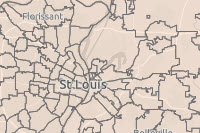

<Item title:"USA ZIP Code Areas" type:Layer Package owner:esri_dm>
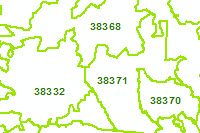

<Item title:"United States Tract Boundaries 2017" type:Feature Layer Collection owner:esri_dm>
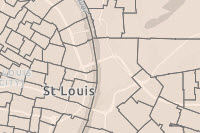

<Item title:"United States Block Group Boundaries 2017" type:Feature Layer Collection owner:esri_dm>
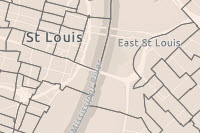

<Item title:"United States Country Boundary 2017" type:Feature Layer Collection owner:esri_dm>
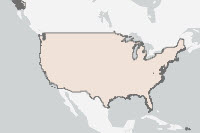

<Item title:"United States County Boundaries 2017" type:Feature Layer Collection owner:esri_dm>
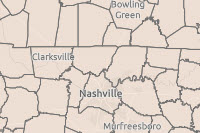

<Item title:"United States State Boundaries 2017" type:Feature Layer Collection owner:esri_dm>
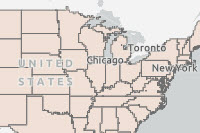

In [52]:
from IPython.display import display

for item in items:
    display(item)

Select the desired item from the list.

In [53]:
us_zip = items[0]

<Item title:"United States ZIP Code Boundaries 2017" type:Feature Layer Collection owner:esri_dm>
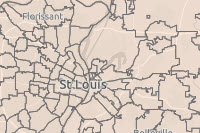

In [54]:
us_zip

Get the layer names from the item

In [55]:
for lyr in us_zip.layers:
    print(lyr.properties.name)

USA_Country
USA_State
USA_County
USA_ZipCode
USA_Tract
USA_BlockGroup


7) We want to merge the zip_code layer with data2 to visualize the result on the map.

In [56]:
us_zip_lyr = us_zip.layers[3]

In [57]:
zip_df = pd.DataFrame.spatial.from_layer(us_zip_lyr)

In [58]:
zip_df.head()

OBJECTID  POPULATION                   PO_NAME  \
0         1         -99  N Dillingham Census Area   
1         2         -99  Yukon Flats Nat Wildlife   
2         3         -99      Alaska Peninsula NWR   
3         4         -99  W Kenai Peninsula Boroug   
4         5         -99  N Lake and Peninsula Bor   

                                               SHAPE      SQMI STATE  \
0  {"rings": [[[-160.186183929443, 58.82004642486...  16279.47    AK   
1  {"rings": [[[-159.971336364746, 64.42843627929...  95704.72    AK   
2  {"rings": [[[-159.347519999648, 55.77196200034...  14491.70    AK   
3  {"rings": [[[-153.309794000393, 58.85487400023...   6568.13    AK   
4  {"rings": [[[-153.436194999999, 60.90853799962...   3713.14    AK   

   Shape__Area  Shape__Length ZIP_CODE  
0     6.765048      24.602921    00001  
1    48.867324     130.944574    00002  
2     5.622721      41.443107    00003  
3     2.751546      20.460970    00004  
4     1.573790       9.474710    00005

In [59]:
zip_df.shape

(30924, 9)

In [60]:
zip_df.dtypes

OBJECTID            int64
POPULATION          int64
PO_NAME            object
SHAPE            geometry
SQMI              float64
STATE              object
Shape__Area       float64
Shape__Length     float64
ZIP_CODE           object
dtype: object

In [61]:
zip_df = zip_df.astype({"ZIP_CODE": int})

In [62]:
zip_df.dtypes

OBJECTID            int64
POPULATION          int64
PO_NAME            object
SHAPE            geometry
SQMI              float64
STATE              object
Shape__Area       float64
Shape__Length     float64
ZIP_CODE            int32
dtype: object

In [63]:
merged_df = pd.merge(zip_df, selected_data2, on='ZIP_CODE')

In [64]:
merged_df.shape

(7547, 11)

In [65]:
merged_df.spatial.set_geometry('SHAPE')

In [66]:
mergd_lyr = gis.content.import_data(merged_df,
                                    title='MergedLayer',
                                    tags='datascience')

8) Create a map of the BuyerSellerIndex field using the following steps:

### Visualize Results

In [67]:
m1 = gis.map('United States', 8)
m1

In [68]:
m1.add_layer(mergd_lyr, {"renderer":"ClassedColorRenderer",
                         "field_name":"buyer_seller_index",
                         "opacity":0.7
              })

9) Create a map on DaysOnMarket field as follows:

In [69]:
m2 = gis.map('Redlands, CA')
m2

In [70]:
m2.add_layer(mergd_lyr, {"renderer":"ClassedSizeRenderer",
                         "field_name":"days_on_market",
                         "opacity":0.7
              })

## House Hunting

### Find all ZIP Codes within a specified drive time of important places


1) Create an Excel table with columns for **Street, City, State**, and **Zip**. Add addresses for the locations you want to access from your new home. Mark and Lisa's table below has their current job addresses. They named their Excel file **ImportantPlaces.xlsx** and the Excel sheet **WorkLocations**.

2) Load the excel file for analysis

In [71]:
file_name3 = datapath[2]
data3 = pd.read_excel(file_name3)

In [72]:
data3.head()

Place               Street      City State    Zip
0  Lisa's job  380 New York Street  Redlands    CA  92373
1  Mark's job   4511 E Guasti Road   Ontario    CA  91761

In [73]:
data3['Address'] = data3['Street'] + ' ' + data3['City'] + ' ' + data3['State']

In [74]:
data3['Address']

0    380 New York Street Redlands CA
1      4511 E Guasti Road Ontario CA
Name: Address, dtype: object

3) Draw the address on map

In [75]:
m3 = gis.map('Redlands, CA', 10)
m3

In [76]:
from arcgis.geocoding import geocode
data3_addr1 = geocode(data3.Address[0])[0]
popup = { 
    "title" : "Lisa's job", 
    "content" : data3_addr1['address']
    }
m3.draw(data3_addr1['location'], popup,
        symbol = {"angle":0,"xoffset":0,"yoffset":0,
                  "type":"esriPMS", "url":"https://static.arcgis.com/images/Symbols/PeoplePlaces/School.png",
                  "contentType":"image/png","width":24,"height":24})

In [77]:
from arcgis.geocoding import geocode
data3_addr2 = geocode(data3.Address[1])[0]
popup = { 
    "title" : "Mark's job", 
    "content" : data3_addr2['address']
    }
m3.draw(data3_addr2['location'], popup,
        symbol = {"angle":0,"xoffset":0,"yoffset":0,
                  "type":"esriPMS", "url":"https://static.arcgis.com/images/Symbols/PeoplePlaces/School.png",
                  "contentType":"image/png","width":24,"height":24})

4) We will Create buffer and enter the maximum time they are willing to spend commuting from their new home to their work.

In [78]:
from arcgis.geoenrichment import BufferStudyArea, enrich

In [79]:
marks = BufferStudyArea(area='4511 E Guasti Road, Ontario, CA 91761', 
                           radii=[45], units='Minutes', 
                           travel_mode='Driving')
lisas = BufferStudyArea(area='380 New York St Redlands CA 92373', 
                           radii=[45], units='Minutes', 
                           travel_mode='Driving')

drive_time_df = enrich(study_areas=[marks, lisas], data_collections=['Age'])

In [80]:
drive_time_lyr = gis.content.import_data(drive_time_df,
                                         title="DriveTimeLayer")

5) Select the Dissolve buffer style to merge overlapping polygons.

In [81]:
from arcgis.features.manage_data import dissolve_boundaries

In [82]:
dissolved_lyr = dissolve_boundaries(drive_time_lyr)

In [83]:
m_3 = gis.map('Redlands, CA', 9)
m_3

In [84]:
m_3.add_layer(dissolved_lyr)

In [85]:
m_3.draw(data3_addr1['location'], popup,
        symbol = {"angle":0,"xoffset":0,"yoffset":0,
                  "type":"esriPMS", "url":"https://static.arcgis.com/images/Symbols/PeoplePlaces/School.png",
                  "contentType":"image/png","width":24,"height":24})
m_3.draw(data3_addr2['location'], popup,
        symbol = {"angle":0,"xoffset":0,"yoffset":0,
                  "type":"esriPMS", "url":"https://static.arcgis.com/images/Symbols/PeoplePlaces/School.png",
                  "contentType":"image/png","width":24,"height":24})

### Map market health, home values, and projected appreciation

1) Download and prepare the Excel Market Health data as follows:

> a) From <a href="https://www.zillow.com/research/data/">www.zillow.com/reserach/data</a>, download ZIP Code level Market Health Index data.

> b) Open the .csv file using Excel and add the ZIPString column as a text field. Compute the values using =RIGHT(CONCAT("00000",B2),5). Drag the Autofill handle down to the last cell in the column to create text formatted ZIP Code values with leading zeros.

> c) Save the file as an Excel workbook. Close Excel.

> Mark and Lisa named their file MarketHealth.xlsx.

2) Load th Excel file for analysis.

In [86]:
file_name4 = datapath[3]
data4 = pd.read_excel(file_name4)

In [87]:
data4

RegionType  RegionName          City State                      Metro  \
0            Zip        1001        Agawam    MA        Springfield, MA, MA   
1            Zip        1002       Amherst    MA        Springfield, MA, MA   
2            Zip        1007   Belchertown    MA        Springfield, MA, MA   
3            Zip        1008     Blandford    MA        Springfield, MA, MA   
4            Zip        1010     Brimfield    MA        Springfield, MA, MA   
...          ...         ...           ...   ...                        ...   
14893        Zip       75033        Frisco    TX  Dallas-Fort Worth, TX, TX   
14894        Zip       84009  South Jordan    UT     Salt Lake City, UT, UT   
14895        Zip       97003     Beaverton    OR           Portland, OR, OR   
14896        Zip       97703          Bend    OR               Bend, OR, OR   
14897        Zip       29486   Summerville    SC         Charleston, SC, SC   

                   CBSATitle  SizeRank  MarketHealthIndex  SellForGain  \
0            Springfield, MA       NaN           1.622365        75.00   
1            Springfield, MA       NaN           5.491341        92.31   
2            Springfield, MA       NaN           4.664384       100.00   
3            Springfield, MA       NaN           2.541281         0.00   
4            Springfield, MA       NaN           3.103101       100.00   
...                      ...       ...                ...          ...   
14893  Dallas-Fort Worth, TX       NaN           9.095852       100.00   
14894     Salt Lake City, UT       NaN           6.135052          NaN   
14895           Portland, OR       NaN           6.806954       100.00   
14896               Bend, OR       NaN           6.566653       100.00   
14897         Charleston, SC       NaN           6.815009        91.30   

       PrevForeclosed  ...      ZHVI       MoM       YoY  \
0              0.0500  ...  214000.0  0.281162  5.263158   
1              0.0000  ...  331400.0  0.485143  6.972240   
2              0.0000  ...  277400.0  0.325497  4.679245   
3                 NaN  ...  224000.0  0.223714  8.843537   
4                 NaN  ...  255700.0  0.471513  2.608347   
...               ...  ...       ...       ...       ...   
14893          0.0000  ...  395800.0 -0.075738  1.046719   
14894          0.0000  ...  409200.0  0.540541  9.120000   
14895          0.0000  ...  346900.0  0.173260  5.376671   
14896             NaN  ...  590700.0  0.288625  6.489995   
14897          0.0196  ...  192200.0  0.417973  7.314350   

       ForecastYoYPctChange  StockOfREOs  NegativeEquity  Delinquency  \
0                  0.047047          NaN        0.069028     0.068063   
1                  0.046192          NaN        0.045415     0.038462   
2                  0.054387          NaN        0.046303     0.048387   
3                  0.061817          NaN        0.060109     0.090909   
4                  0.060555          NaN        0.066778     0.075000   
...                     ...          ...             ...          ...   
14893              0.066809          NaN             NaN          NaN   
14894              0.040208          NaN             NaN          NaN   
14895              0.037766          NaN             NaN          NaN   
14896             -0.011788          NaN             NaN          NaN   
14897              0.019964          NaN             NaN          NaN   

       DaysOnMarket  Unnamed: 19  zipstring  
0              81.0          NaN       1001  
1              87.5          NaN       1002  
2              94.5          NaN       1007  
3              73.0          NaN       1008  
4              73.0          NaN       1010  
...             ...          ...        ...  
14893          74.0          NaN      75033  
14894          48.0          NaN      84009  
14895          44.0          NaN      97003  
14896          77.0          NaN      97703  
14897          83.5          NaN      29486  

[14898 rows x 21 

3) Select **City, MarketHealthIndex, ZHVI, ForecastYoYPctChange**, and **zipstring** fields.

In [88]:
col = ['City', 'MarketHealthIndex', 'ZHVI', 'ForecastYoYPctChange', 'zipstring']

In [89]:
matket_health_index = data4[col]

In [90]:
matket_health_index.head()

City  MarketHealthIndex      ZHVI  ForecastYoYPctChange  zipstring
0       Agawam           1.622365  214000.0              0.047047       1001
1      Amherst           5.491341  331400.0              0.046192       1002
2  Belchertown           4.664384  277400.0              0.054387       1007
3    Blandford           2.541281  224000.0              0.061817       1008
4    Brimfield           3.103101  255700.0              0.060555       1010

In [91]:
matket_health_index.dtypes

City                     object
MarketHealthIndex       float64
ZHVI                    float64
ForecastYoYPctChange    float64
zipstring                 int64
dtype: object

In [92]:
matket_health_index['MarketHealthIndex'].min()

0.000671231

In [93]:
matket_health_index['MarketHealthIndex'].max()

10.0

In [94]:
matket_health_index.rename(columns={"zipstring": "ZIP_CODE"},
                           inplace=True)

C:\Users\shi10484\AppData\Local\ESRI\conda\envs\dl_testing2\lib\site-packages\pandas\core\frame.py:4301: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [95]:
matket_health_index[matket_health_index['City']=='Crestline']

City  MarketHealthIndex      ZHVI  ForecastYoYPctChange  ZIP_CODE
13351  Crestline           9.944288  205600.0              0.068084     92322
13353  Crestline           2.882937  228900.0              0.067296     92325

4) Sort the table on the ZIP_CODE field so we can locate their ZIP Code. Make a note of the values for MarketHealthIndex, ZHVI, and ForecastYoYPctChange. In Crestline, for example, the market health index is fair: 6.4 on a scale that ranges from 0 to 10. The median home value for all homes (not just 3-bedroom homes) is $214,100. Homes are expected to appreciate 4.8 percent.

In [96]:
zip_df.head()

OBJECTID  POPULATION                   PO_NAME  \
0         1         -99  N Dillingham Census Area   
1         2         -99  Yukon Flats Nat Wildlife   
2         3         -99      Alaska Peninsula NWR   
3         4         -99  W Kenai Peninsula Boroug   
4         5         -99  N Lake and Peninsula Bor   

                                               SHAPE      SQMI STATE  \
0  {"rings": [[[-160.186183929443, 58.82004642486...  16279.47    AK   
1  {"rings": [[[-159.971336364746, 64.42843627929...  95704.72    AK   
2  {"rings": [[[-159.347519999648, 55.77196200034...  14491.70    AK   
3  {"rings": [[[-153.309794000393, 58.85487400023...   6568.13    AK   
4  {"rings": [[[-153.436194999999, 60.90853799962...   3713.14    AK   

   Shape__Area  Shape__Length  ZIP_CODE  
0     6.765048      24.602921         1  
1    48.867324     130.944574         2  
2     5.622721      41.443107         3  
3     2.751546      20.460970         4  
4     1.573790       9.474710         5

In [97]:
zip_df = zip_df.astype({"ZIP_CODE": int})

In [98]:
health_df = pd.merge(zip_df, matket_health_index, on='ZIP_CODE')

In [99]:
health_df.head()

OBJECTID  POPULATION      PO_NAME  \
0       241       17332       Agawam   
1       242       29871      Amherst   
2       245       15242  Belchertown   
3       246        1749    Blandford   
4       247        4398    Brimfield   

                                               SHAPE   SQMI STATE  \
0  {'rings': [[[-72.6304370002673, 42.09945499964...  12.08    MA   
1  {'rings': [[[-72.4439000000849, 42.42276600025...  58.03    MA   
2  {'rings': [[[-72.4083589996681, 42.35153699983...  55.85    MA   
3  {'rings': [[[-72.9898204997162, 42.24787710014...  60.62    MA   
4  {'rings': [[[-72.2559969998616, 42.18105099970...  37.28    MA   

   Shape__Area  Shape__Length  ZIP_CODE         City  MarketHealthIndex  \
0     0.003404       0.317209      1001       Agawam           1.622365   
1     0.016425       0.926367      1002      Amherst           5.491341   
2     0.015786       0.698673      1007  Belchertown           4.664384   
3     0.017112       0.676175      1008    Blandford           2.541281   
4     0.010515       0.587340      1010    Brimfield           3.103101   

       ZHVI  ForecastYoYPctChange  
0  214000.0              0.047047  
1  331400.0              0.046192  
2  277400.0              0.054387  
3  224000.0              0.061817  
4  255700.0              0.060555

In [100]:
health_df.shape

(14890, 13)

In [101]:
health_df.spatial.set_geometry('SHAPE')

In [102]:
hlth_lyr = gis.content.import_data(health_df,
                                  title="MarketHealthLayer")

In [103]:
m4 = gis.map('United States', 5)
m4

In [104]:
m4.add_layer(hlth_lyr, {"renderer":"ClassedColorRenderer",
                         "field_name":"market_health_index",
                        "classificationMethod":'quantile',
                         "opacity":0.7
              })

In [105]:
market_hlth_lyr = hlth_lyr.layers[0]

In [106]:
from arcgis.features.find_locations import find_centroids

In [107]:
poly_to_point = find_centroids(market_hlth_lyr, output_name="HealthLyrPolygonToPoint" + str(datetime.now().microsecond))

In [108]:
from  arcgis.features.manage_data import overlay_layers

In [109]:
zip_intersect = overlay_layers(drive_time_lyr, 
                               market_hlth_lyr, 
                               output_name="Market Health Data Within drive time Buffer" + str(datetime.now().microsecond))

In [110]:
zip_intersect

<Item title:"Market Health Data Within drive time Buffer556026" type:Feature Layer Collection owner:arcgis_python>

5) Notice how many ZIP Codes intersect the drive time buffer.

In [111]:
zip_hlth_intersect = zip_intersect.layers[0]

In [112]:
overlay_df = pd.DataFrame.spatial.from_layer(zip_hlth_intersect)

In [113]:
overlay_df.shape

(326, 66)

In [114]:
m5 = gis.map('Redlands, CA', 9)
m5

In [115]:
m5.add_layer(hlth_lyr, {"renderer":"ClassedColorRenderer",
                         "field_name":"market_health_index",
                        "classificationMethod":'quantile',
                         "opacity":0.7
              })
m5.add_layer(drive_time_lyr)

The larger the index, the darker the color, and the healthier the housing market is. They want to buy their new home in an area with a healthy housing market (rather than a location where there are vacancies, homes that aren't selling, and numerous foreclosures).

This result has all the variables one should be interested in mapping, narrowed down to the ZIP Codes that are within an acceptable drive time to their work.

In [116]:
m6 = gis.map('Redlands, CA', 9)
m6

In [117]:
m6.add_layer(hlth_lyr, {"renderer":"ClassedColorRenderer",
                         "field_name":"zhvi",
                        "classificationMethod":'quantile',
                         "opacity":0.7
              })
m6.add_layer(drive_time_lyr)

The dark ZIP Codes have the most expensive average home value estimates.

Similarly plot for the field **ForecastYoYPctChange**

In [118]:
m7 = gis.map('Redlands, CA', 9)
m7

In [119]:
m7.add_layer(hlth_lyr, {"renderer":"ClassedColorRenderer",
                         "field_name":"forecast_yo_y_pct_change",
                        "classificationMethod":'quantile',
                         "opacity":0.7
              })
m7.add_layer(drive_time_lyr)

The darkest ZIP Codes are expected to have the largest increase in home values over the next year.

### Find the best cities to begin house hunting

1) Narrow the search to ZIP Codes with home values in price range as follows:

> Mark and Lisa will only sell their home for a loss if they can purchase a home valued the same as theirs with better investment potential. They will look for homes that cost about \\$340,000 in neighborhoods with median home values between \\$300,000 and \\$500,000. Being surrounded by homes that are valued higher than theirs is much better than being the most expensive home on the block. That's why Mark and Lisa extended their search to ZIP Codes with median home values as high as \$500,000.

> They also want to narrow their search to areas belonging to healthy housing markets with expected home value appreciation. Mark and Lisa, for example, exclude ZIP Codes in unhealthy housing markets by filtering for MarketHealthIndex > 8. They also focus on ZIP Codes with expected home appreciation higher than Crestline by filtering for ForecastYoYPctChange > 0.060. Set filters to reflect your own criteria for the MarketHealthIndex and ForecastYoYPctChange fields.

In [120]:
zip_hlth_intersect.query(where='((zhvi > 350000) AND (zhvi < 600000) AND (market_health_index > 8) AND (forecast_yo_y_pct_change> 0.06)) AND (1=1)').sdf

OBJECTID  FID_AC9111_A7E54F7D id source_country           x          y  \
0         6                    1  0             US -117.552830  34.064356   
1         9                    1  0             US -117.552830  34.064356   
2        19                    1  0             US -117.552830  34.064356   
3        20                    1  0             US -117.552830  34.064356   
4        29                    1  0             US -117.552830  34.064356   
5        30                    1  0             US -117.552830  34.064356   
6       179                    1  0             US -117.552830  34.064356   
7       180                    2  1             US -117.194872  34.057237   

            area_type buffer_units  buffer_units_alias  buffer_radii  ...  \
0  NetworkServiceArea      Minutes  Drive Time Minutes            45  ...   
1  NetworkServiceArea      Minutes  Drive Time Minutes            45  ...   
2  NetworkServiceArea      Minutes  Drive Time Minutes            45  ...   
3  NetworkServiceArea      Minutes  Drive Time Minutes            45  ...   
4  NetworkServiceArea      Minutes  Drive Time Minutes            45  ...   
5  NetworkServiceArea      Minutes  Drive Time Minutes            45  ...   
6  NetworkServiceArea      Minutes  Drive Time Minutes            45  ...   
7  NetworkServiceArea      Minutes  Drive Time Minutes            45  ...   

  state  zip_code                      city  market_health_index    zhvi  \
0    CA     90606  West Whittier-Los Nietos             8.272251  485500   
1    CA     90640                Montebello             8.167539  538500   
2    CA     91702                     Azusa             9.138139  457600   
3    CA     91706              Baldwin Park             9.215331  460300   
4    CA     91732                  El Monte             9.203249  506500   
5    CA     91733            South El Monte             9.615385  501700   
6    CA     91752                  Eastvale             8.270909  503800   
7    CA     91752                  Eastvale             8.270909  503800   

   forecast_yo_y_pct_change  Shape__Area_1  Shape__Length_1  AnalysisArea  \
0                  0.072375   1.417656e+07     22316.323033      2.240247   
1                  0.061807   3.105525e+07     34167.878635      1.995545   
2                  0.086300   2.658000e+08    142848.234839     22.824592   
3                  0.088173   5.812360e+07     45215.156466     39.756145   
4                  0.065299   1.813936e+07     25827.620558     12.414794   
5                  0.093255   2.645891e+07     27366.704306     17.640998   
6                  0.064508   5.733285e+07     37863.197705     39.309396   
7                  0.064508   5.733285e+07     37863.197705     39.309396   

                                               SHAPE  
0  {"rings": [[[-13143194.2534, 4028915.1404], [-...  
1  {"rings": [[[-13143598.3654, 4032788.2902], [-...  
2  {"rings": [[[-13123459.7947, 4048654.942], [-1...  
3  {"rings": [[[-13129357.7083, 4047200.0046], [-...  
4  {"rings": [[[-13135851.7534, 4040662.4451], [-...  
5  {"rings": [[[-13139099.6109, 4037245.849], [-1...  
6  {"rings": [[[-13082747.7254, 4033299.2511], [-...  
7  {"rings": [[[-13082747.7254, 4033299.2511], [-...  

[8 rows x 66 columns]

In [121]:
m9 = gis.map('United States')
m9

MapView(layout=Layout(height='400px', width='100%'))

In [122]:
m9.add_layer(zip_hlth_intersect,
             {"definition_expression": '((zhvi > 350000) AND (zhvi < 600000) AND (market_health_index > 8) AND (forecast_yo_y_pct_change > 0.06)) AND (1=1)',
             "classificationMethod":'quantile'})
m9.zoom_to_layer(zip_hlth_intersect)

Notice that when the filter is applied, the map changes. ZIP Codes that don't meet the filter criteria are removed from the map and the colors change to reflect the recomputed Quantile classification.

### Conclusion

The results show possible cities and ZIP Codes where they can explore homes for sale. We can use real estate websites such as <a href="https://www.zillow.com/">Zillow.com</a> or <a href="https://www.realtor.com/">Realtor.com</a> to see if they can find a home in their price range with the characteristics and qualities they're are looking for.